In [3]:
import numpy as np
import matplotlib.pyplot as plt
from shapely import geometry
from descartes import PolygonPatch

In [1]:
#list of all regions
regions = [
    'cariboos',
    'kananaskis',
    'kootenay-boundary',
    'lizard-range',
    'north-columbia',
    'north-rockies',
    'northwest-coastal',
    'northwest-inland',
    'purcells',
    'sea-to-sky',
    'south-coast',
    'south-columbia',
    'south-rockies',
    'yukon'    
          ]

In [ ]:
# Now, go through and define geometry of each region
# Region outlines taken from: https://www.avalanche.ca/api/forecasts
# There are better ways to do this!  Let me know if you make a better one.  But this approach works, even if it isn't super pretty.

In [110]:
yukon_geom = np.array(
    [[-135.234309,59.694814],
    [-135.250201,59.697699],
    [-135.425225,59.770355],
    [-135.490523,59.797798],
    [-135.52437,59.843331],
    [-135.542801,59.875655],
    [-135.571179,59.905021],
    [-135.598288,59.926671],
    [-135.620165,59.954967],
    [-135.62941,59.977476],
    [-135.633199,60.008123],
    [-135.641824,60.0219],
    [-135.637842,60.046898],
    [-135.661788,60.06559],
    [-135.666845,60.096029],
    [-135.688878,60.12799],
    [-135.71546,60.143186],
    [-135.751523,60.169522],
    [-135.760723,60.186148],
    [-135.788032,60.202652],
    [-135.796726,60.218238],
    [-135.828807,60.237742],
    [-135.83184,60.27286],
    [-135.771412,60.300962],
    [-135.676493,60.310035],
    [-135.601265,60.305816],
    [-135.549146,60.309008],
    [-135.4943,60.318592],
    [-135.436373,60.320211],
    [-135.347122,60.315318],
    [-135.298686,60.322938],
    [-135.246061,60.364568],
    [-135.209774,60.375054],
    [-135.148099,60.372742],
    [-135.105339,60.375143],
    [-135.078256,60.38566],
    [-135.056263,60.386653],
    [-135.041252,60.382753],
    [-135.040618,60.376023],
    [-134.995326,60.368928],
    [-134.959543,60.378552],
    [-134.919563,60.370137],
    [-134.874266,60.356629],
    [-134.827075,60.28644],
    [-134.810295,60.239349],
    [-134.758181,60.155284],
    [-134.692512,60.163424],
    [-134.642906,60.154053],
    [-134.621647,60.141409],
    [-134.549045,60.126406],
    [-134.558418,60.060222],
    [-134.605676,60.028403],
    [-134.667448,59.980564],
    [-134.738641,59.941681],
    [-134.785343,59.913912],
    [-134.792521,59.89834],
    [-134.784697,59.889691],
    [-134.787186,59.852973],
    [-134.807549,59.820666],
    [-134.793258,59.819202],
    [-134.767053,59.861342],
    [-134.755354,59.856479],
    [-134.736694,59.848323],
    [-134.712003,59.839524],
    [-134.673846,59.829208],
    [-134.667375,59.812034],
    [-134.686186,59.788162],
    [-134.71659,59.770558],
    [-134.769372,59.761666],
    [-134.748864,59.677478],
    [-134.680385,59.630253],
    [-134.682481,59.610736],
    [-134.716657,59.61146],
    [-134.742185,59.604163],
    [-134.767029,59.575705],
    [-134.785545,59.568655],
    [-134.828437,59.553111],
    [-134.859533,59.53521],
    [-134.887575,59.525125],
    [-134.925447,59.52559],
    [-134.967242,59.51787],
    [-135.029514,59.541281],
    [-135.028053,59.565542],
    [-135.055675,59.582812],
    [-135.118053,59.623091],
    [-135.158466,59.623055],
    [-135.221252,59.665493],
    [-135.234309,59.694814]]
)

In [111]:
south_rockies_geom = np.array(
    [[-115.188537,50.547988],
    [-115.18968,50.549085],
    [-115.190365,50.554131],
    [-115.188561,50.555211],
    [-115.188442,50.555282],
    [-115.18313,50.556172],
    [-115.182696,50.556344],
    [-115.177248,50.558658],
    [-115.177145,50.558702],
    [-115.17369,50.567155],
    [-115.15437,50.572947],
    [-115.1483,50.570632],
    [-115.137636,50.573724],
    [-115.136018,50.574193],
    [-115.132146,50.571798],
    [-115.117029,50.570391],
    [-115.116683,50.570718],
    [-115.115778,50.571573],
    [-115.100974,50.577853],
    [-115.091361,50.585065],
    [-115.085307,50.589553],
    [-115.073651,50.588196],
    [-115.06352,50.583028],
    [-115.052299,50.571504],
    [-115.052117,50.571724],
    [-115.049509,50.574886],
    [-115.049502,50.574888],
    [-115.04186,50.576997],
    [-115.033595,50.579278],
    [-115.026634,50.582914],
    [-115.024338,50.583452],
    [-115.021213,50.584185],
    [-115.018176,50.58312],
    [-115.015829,50.582147],
    [-115.014854,50.577895],
    [-115.01402,50.574257],
    [-115.006609,50.562346],
    [-114.990481,50.545347],
    [-114.987474,50.542178],
    [-114.973463,50.527102],
    [-114.968486,50.520746],
    [-114.962112,50.510729],
    [-114.956352,50.501679],
    [-114.944001,50.48934],
    [-114.943639,50.488979],
    [-114.937517,50.486387],
    [-114.93553,50.480913],
    [-114.93537,50.480808],
    [-114.931945,50.478545],
    [-114.931916,50.478526],
    [-114.932358,50.474178],
    [-114.932398,50.473787],
    [-114.928465,50.472086],
    [-114.92825,50.471464],
    [-114.927234,50.468527],
    [-114.917707,50.461905],
    [-114.916483,50.458269],
    [-114.912776,50.454858],
    [-114.911393,50.450774],
    [-114.90535,50.448422],
    [-114.8951,50.439422],
    [-114.887122,50.435648],
    [-114.884449,50.437652],
    [-114.874653,50.439686],
    [-114.873243,50.430623],
    [-114.86911,50.425768],
    [-114.860999,50.424791],
    [-114.861073,50.421076],
    [-114.86388,50.419713],
    [-114.864081,50.411366],
    [-114.861431,50.407967],
    [-114.866311,50.399845],
    [-114.86209,50.39442],
    [-114.852692,50.392855],
    [-114.838437,50.393501],
    [-114.831833,50.390341],
    [-114.82518,50.393182],
    [-114.816266,50.383524],
    [-114.811315,50.378754],
    [-114.815939,50.374782],
    [-114.818289,50.370022],
    [-114.808165,50.370865],
    [-114.804353,50.365004],
    [-114.791435,50.358493],
    [-114.785387,50.361768],
    [-114.776396,50.36179],
    [-114.769379,50.359283],
    [-114.766449,50.351564],
    [-114.774971,50.343516],
    [-114.791326,50.336349],
    [-114.79985,50.32982],
    [-114.787592,50.319309],
    [-114.781597,50.314439],
    [-114.781966,50.310954],
    [-114.781508,50.299408],
    [-114.776897,50.30023],
    [-114.769653,50.302403],
    [-114.761803,50.299757],
    [-114.754559,50.299037],
    [-114.753291,50.285609],
    [-114.755689,50.28164],
    [-114.751521,50.273269],
    [-114.758544,50.271504],
    [-114.765612,50.264021],
    [-114.765308,50.254682],
    [-114.769517,50.251576],
    [-114.766812,50.246562],
    [-114.76826,50.243617],
    [-114.762976,50.240801],
    [-114.762903,50.23462],
    [-114.755789,50.23159],
    [-114.747765,50.22432],
    [-114.745331,50.217929],
    [-114.748561,50.214829],
    [-114.738747,50.211675],
    [-114.738086,50.203079],
    [-114.724737,50.190471],
    [-114.721387,50.18843],
    [-114.656271,50.193961],
    [-114.582102,50.203486],
    [-114.512418,50.183768],
    [-114.497785,50.184111],
    [-114.478776,50.183089],
    [-114.466932,50.179506],
    [-114.461779,50.175026],
    [-114.452246,50.150149],
    [-114.444274,50.144697],
    [-114.445893,50.142219],
    [-114.435039,50.129949],
    [-114.433468,50.118835],
    [-114.443403,50.106025],
    [-114.429835,50.084869],
    [-114.432501,50.077041],
    [-114.430277,50.071896],
    [-114.43242,50.064289],
    [-114.428584,50.057121],
    [-114.428265,50.043197],
    [-114.431636,50.035927],
    [-114.432192,50.025704],
    [-114.416753,50.007463],
    [-114.418864,50.005352],
    [-114.410283,49.999799],
    [-114.406907,49.999513],
    [-114.404441,49.996283],
    [-114.405236,49.988889],
    [-114.40185,49.983372],
    [-114.404299,49.977114],
    [-114.400952,49.969356],
    [-114.405747,49.969404],
    [-114.412063,49.962927],
    [-114.40892,49.952428],
    [-114.396346,49.945412],
    [-114.395501,49.937545],
    [-114.397137,49.936021],
    [-114.398436,49.928615],
    [-114.394299,49.903626],
    [-114.385798,49.89553],
    [-114.386186,49.882942],
    [-114.380608,49.878874],
    [-114.377251,49.870837],
    [-114.366263,49.866674],
    [-114.360705,49.866295],
    [-114.357903,49.8746],
    [-114.348519,49.871583],
    [-114.345433,49.864225],
    [-114.341629,49.866309],
    [-114.318894,49.859952],
    [-114.311085,49.852798],
    [-114.316365,49.840017],
    [-114.335028,49.822219],
    [-114.331056,49.810565],
    [-114.320544,49.801557],
    [-114.307155,49.793932],
    [-114.300333,49.793705],
    [-114.293513,49.783261],
    [-114.293509,49.775373],
    [-114.28449,49.772395],
    [-114.282733,49.767894],
    [-114.295337,49.760183],
    [-114.295257,49.750204],
    [-114.305613,49.73365],
    [-114.307215,49.72964],
    [-114.301696,49.724459],
    [-114.301442,49.712972],
    [-114.294655,49.707941],
    [-114.294434,49.701061],
    [-114.291975,49.698071],
    [-114.300128,49.691615],
    [-114.300845,49.681197],
    [-114.295043,49.674432],
    [-114.294616,49.655369],
    [-114.292505,49.649295],
    [-114.294617,49.644715],
    [-114.294099,49.618519],
    [-114.281966,49.608946],
    [-114.27216,49.606807],
    [-114.272996,49.575556],
    [-114.276931,49.551799],
    [-114.261251,49.547478],
    [-114.231395,49.542778],
    [-114.222168,49.536498],
    [-114.217519,49.535032],
    [-114.202046,49.522097],
    [-114.20241,49.473909],
    [-114.192418,49.464802],
    [-114.187087,49.452476],
    [-114.162654,49.436354],
    [-114.14886,49.423771],
    [-114.178696,49.397926],
    [-114.180706,49.375253],
    [-114.163668,49.364563],
    [-114.155706,49.356655],
    [-114.153419,49.347527],
    [-114.097889,49.343176],
    [-114.078752,49.331153],
    [-114.070084,49.320366],
    [-114.077956,49.310673],
    [-114.067845,49.307938],
    [-114.064005,49.304526],
    [-114.058488,49.30478],
    [-114.047545,49.291444],
    [-114.040932,49.286476],
    [-114.036284,49.280523],
    [-114.017123,49.27979],
    [-114.017642,49.274491],
    [-114.014444,49.269556],
    [-114.011434,49.267317],
    [-114.009133,49.263125],
    [-114.012077,49.262235],
    [-114.003978,49.258193],
    [-113.995371,49.257886],
    [-113.975231,49.249912],
    [-113.971472,49.240639],
    [-113.971768,49.225313],
    [-113.963689,49.223885],
    [-113.954248,49.20529],
    [-113.961163,49.187987],
    [-113.96122,49.187963],
    [-113.980707,49.179964],
    [-113.985713,49.179664],
    [-113.990851,49.179357],
    [-113.993574,49.179194],
    [-113.993419,49.176437],
    [-113.993376,49.17567],
    [-113.994952,49.173576],
    [-113.99629,49.171981],
    [-113.997355,49.17179],
    [-114.006911,49.170085],
    [-114.014883,49.168663],
    [-114.032828,49.167704],
    [-114.035241,49.16768],
    [-114.04899,49.172816],
    [-114.052849,49.175129],
    [-114.056424,49.177272],
    [-114.061345,49.179679],
    [-114.065365,49.179565],
    [-114.076691,49.178835],
    [-114.084637,49.177298],
    [-114.084861,49.177255],
    [-114.1032,49.173672],
    [-114.114063,49.1669],
    [-114.122726,49.16623],
    [-114.129399,49.166865],
    [-114.134548,49.167354],
    [-114.139121,49.161296],
    [-114.147646,49.156982],
    [-114.149571,49.146242],
    [-114.150701,49.146931],
    [-114.161085,49.153266],
    [-114.185022,49.162249],
    [-114.185461,49.162414],
    [-114.202401,49.168771],
    [-114.22114,49.186597],
    [-114.221718,49.18645],
    [-114.254907,49.17803],
    [-114.256847,49.178141],
    [-114.260606,49.178357],
    [-114.275605,49.179217],
    [-114.288764,49.179971],
    [-114.299844,49.187298],
    [-114.313942,49.196622],
    [-114.316983,49.19665],
    [-114.320875,49.196686],
    [-114.324766,49.196723],
    [-114.3271,49.196744],
    [-114.330278,49.19629],
    [-114.33525,49.194415],
    [-114.338664,49.19403],
    [-114.339688,49.194082],
    [-114.342323,49.194216],
    [-114.345303,49.194499],
    [-114.347972,49.194904],
    [-114.353131,49.196378],
    [-114.354048,49.196925],
    [-114.358237,49.198049],
    [-114.363202,49.19918],
    [-114.365702,49.20025],
    [-114.367991,49.200761],
    [-114.368654,49.200938],
    [-114.395355,49.209771],
    [-114.395503,49.210097],
    [-114.395391,49.211558],
    [-114.395544,49.214084],
    [-114.396591,49.215652],
    [-114.398388,49.217526],
    [-114.400729,49.219853],
    [-114.401235,49.222962],
    [-114.39919,49.224826],
    [-114.398773,49.227227],
    [-114.399551,49.229728],
    [-114.402232,49.232309],
    [-114.402764,49.233009],
    [-114.402551,49.239604],
    [-114.384405,49.244533],
    [-114.383642,49.24474],
    [-114.382428,49.247054],
    [-114.383042,49.248643],
    [-114.383369,49.249112],
    [-114.386048,49.250039],
    [-114.389621,49.251523],
    [-114.391755,49.252014],
    [-114.394635,49.254005],
    [-114.396752,49.254995],
    [-114.398735,49.256473],
    [-114.400998,49.257406],
    [-114.40438,49.258847],
    [-114.404657,49.258897],
    [-114.445094,49.266128],
    [-114.445839,49.273409],
    [-114.446055,49.275519],
    [-114.447177,49.286483],
    [-114.450678,49.292292],
    [-114.45555,49.300377],
    [-114.456253,49.30076],
    [-114.458386,49.302287],
    [-114.468567,49.303576],
    [-114.472882,49.305442],
    [-114.47666,49.307442],
    [-114.479605,49.308631],
    [-114.483509,49.309378],
    [-114.485441,49.310283],
    [-114.487464,49.311544],
    [-114.487763,49.31173],
    [-114.489651,49.320778],
    [-114.488368,49.321915],
    [-114.485861,49.323345],
    [-114.485896,49.324631],
    [-114.485915,49.325349],
    [-114.485826,49.327318],
    [-114.485277,49.329011],
    [-114.485141,49.331478],
    [-114.485518,49.333893],
    [-114.486751,49.336335],
    [-114.487387,49.338608],
    [-114.489085,49.340484],
    [-114.48938,49.340809],
    [-114.493748,49.345635],
    [-114.494818,49.346658],
    [-114.497271,49.3492],
    [-114.500008,49.350789],
    [-114.503259,49.351833],
    [-114.506699,49.353409],
    [-114.510614,49.353936],
    [-114.513672,49.353945],
    [-114.516735,49.354454],
    [-114.520682,49.355986],
    [-114.521027,49.35641],
    [-114.521854,49.357428],
    [-114.522842,49.359342],
    [-114.523318,49.359887],
    [-114.524507,49.36125],
    [-114.525415,49.363665],
    [-114.526458,49.365605],
    [-114.526771,49.368669],
    [-114.527151,49.371233],
    [-114.528181,49.373277],
    [-114.531763,49.374258],
    [-114.535157,49.374212],
    [-114.539346,49.374768],
    [-114.544873,49.375901],
    [-114.549222,49.375977],
    [-114.552968,49.377071],
    [-114.557242,49.377139],
    [-114.558104,49.377498],
    [-114.560756,49.378606],
    [-114.564481,49.378604],
    [-114.56665,49.379093],
    [-114.569361,49.379548],
    [-114.569566,49.379582],
    [-114.572262,49.381044],
    [-114.57494,49.382006],
    [-114.576162,49.383977],
    [-114.577636,49.38648],
    [-114.57838,49.387982],
    [-114.579138,49.389988],
    [-114.5796,49.390621],
    [-114.5806,49.39199],
    [-114.583901,49.393519],
    [-114.586568,49.394231],
    [-114.59168,49.404162],
    [-114.596921,49.408989],
    [-114.59836,49.412935],
    [-114.596888,49.416098],
    [-114.596023,49.417955],
    [-114.596715,49.419885],
    [-114.598509,49.422564],
    [-114.60062,49.424438],
    [-114.60274,49.426816],
    [-114.602832,49.428867],
    [-114.603072,49.431513],
    [-114.602863,49.433857],
    [-114.60325,49.436593],
    [-114.603422,49.439184],
    [-114.603343,49.441613],
    [-114.603171,49.444479],
    [-114.603057,49.446393],
    [-114.601594,49.448905],
    [-114.600848,49.4504],
    [-114.600789,49.450607],
    [-114.600054,49.4532],
    [-114.600017,49.453332],
    [-114.600058,49.455339],
    [-114.599955,49.458752],
    [-114.599941,49.461224],
    [-114.599927,49.463697],
    [-114.599919,49.46518],
    [-114.599187,49.466278],
    [-114.599053,49.46648],
    [-114.598547,49.467239],
    [-114.59723,49.469323],
    [-114.595733,49.471806],
    [-114.595583,49.473712],
    [-114.595331,49.475424],
    [-114.595243,49.476022],
    [-114.595039,49.47741],
    [-114.59456,49.480657],
    [-114.59437,49.483551],
    [-114.594496,49.485598],
    [-114.594653,49.488153],
    [-114.59481,49.490704],
    [-114.59493,49.492245],
    [-114.594903,49.492323],
    [-114.594233,49.494255],
    [-114.593809,49.495042],
    [-114.594339,49.504347],
    [-114.587987,49.509493],
    [-114.582523,49.518645],
    [-114.581464,49.519252],
    [-114.573949,49.523565],
    [-114.572235,49.524548],
    [-114.574606,49.530961],
    [-114.569909,49.536873],
    [-114.572999,49.547626],
    [-114.573216,49.547938],
    [-114.573859,49.550399],
    [-114.575219,49.552357],
    [-114.575183,49.553842],
    [-114.57584,49.555813],
    [-114.575802,49.556722],
    [-114.57663,49.556988],
    [-114.586595,49.563101],
    [-114.59059,49.562354],
    [-114.590964,49.562284],
    [-114.593209,49.561783],
    [-114.598339,49.561754],
    [-114.603265,49.56083],
    [-114.605827,49.559891],
    [-114.606581,49.55908],
    [-114.607622,49.557959],
    [-114.607768,49.556003],
    [-114.607716,49.55351],
    [-114.607147,49.550898],
    [-114.61046,49.549968],
    [-114.614157,49.550122],
    [-114.615051,49.550159],
    [-114.61914,49.550233],
    [-114.622868,49.550222],
    [-114.625454,49.549806],
    [-114.629539,49.549885],
    [-114.63206,49.548963],
    [-114.634073,49.546427],
    [-114.634147,49.546281],
    [-114.637842,49.543878],
    [-114.645172,49.543257],
    [-114.65992,49.551556],
    [-114.677768,49.553822],
    [-114.681564,49.554304],
    [-114.693746,49.548629],
    [-114.696449,49.547369],
    [-114.69805,49.548702],
    [-114.71083,49.562211],
    [-114.711439,49.562834],
    [-114.714501,49.565964],
    [-114.718906,49.567086],
    [-114.72443,49.570874],
    [-114.725453,49.575143],
    [-114.733229,49.577027],
    [-114.736536,49.596447],
    [-114.727684,49.63137],
    [-114.698328,49.631375],
    [-114.701141,49.648093],
    [-114.720243,49.650226],
    [-114.724873,49.650742],
    [-114.782003,49.673953],
    [-114.829228,49.695661],
    [-114.852922,49.724075],
    [-114.855145,49.724375],
    [-114.885224,49.728439],
    [-114.932043,49.732591],
    [-114.989324,49.718781],
    [-115.017259,49.712928],
    [-115.037744,49.711034],
    [-115.053262,49.711015],
    [-115.05488,49.708734],
    [-115.057644,49.702223],
    [-115.057879,49.701888],
    [-115.062839,49.694832],
    [-115.064517,49.692444],
    [-115.08104,49.685946],
    [-115.083126,49.681744],
    [-115.08377,49.677649],
    [-115.083927,49.67665],
    [-115.086518,49.673604],
    [-115.095825,49.670652],
    [-115.096373,49.670479],
    [-115.119943,49.672498],
    [-115.121738,49.673011],
    [-115.12366,49.673559],
    [-115.131492,49.675794],
    [-115.132275,49.676018],
    [-115.136365,49.677185],
    [-115.137165,49.677413],
    [-115.145532,49.679801],
    [-115.152236,49.681306],
    [-115.155491,49.682037],
    [-115.17495,49.686406],
    [-115.182229,49.683143],
    [-115.182762,49.682904],
    [-115.190182,49.679577],
    [-115.191449,49.679009],
    [-115.207434,49.671843],
    [-115.208769,49.671487],
    [-115.218654,49.668853],
    [-115.223221,49.658451],
    [-115.223765,49.657212],
    [-115.226215,49.65163],
    [-115.230883,49.650476],
    [-115.232048,49.650385],
    [-115.238795,49.649856],
    [-115.241812,49.648041],
    [-115.248715,49.638675],
    [-115.258047,49.626015],
    [-115.25868,49.625155],
    [-115.268131,49.614977],
    [-115.269599,49.613396],
    [-115.27374,49.610079],
    [-115.27651,49.608939],
    [-115.282917,49.606301],
    [-115.295939,49.600537],
    [-115.299186,49.599623],
    [-115.302605,49.598661],
    [-115.31201,49.596013],
    [-115.321693,49.586751],
    [-115.327418,49.581302],
    [-115.329521,49.579197],
    [-115.328216,49.575877],
    [-115.324324,49.573553],
    [-115.327004,49.568245],
    [-115.323372,49.565602],
    [-115.323372,49.565602],
    [-115.32053,49.563533],
    [-115.319486,49.562774],
    [-115.314508,49.562622],
    [-115.313792,49.561836],
    [-115.312205,49.559165],
    [-115.312005,49.558094],
    [-115.311238,49.553992],
    [-115.310991,49.55267],
    [-115.31467,49.544271],
    [-115.316682,49.535486],
    [-115.317738,49.534886],
    [-115.326298,49.533076],
    [-115.331115,49.530202],
    [-115.34041,49.524658],
    [-115.342863,49.515517],
    [-115.342957,49.515441],
    [-115.344104,49.514509],
    [-115.349919,49.509784],
    [-115.350305,49.509351],
    [-115.350525,49.50722],
    [-115.351229,49.500397],
    [-115.351259,49.500362],
    [-115.359498,49.494316],
    [-115.364833,49.492883],
    [-115.368949,49.493028],
    [-115.373975,49.491433],
    [-115.376869,49.494499],
    [-115.37932,49.493716],
    [-115.381846,49.493155],
    [-115.383176,49.493321],
    [-115.386789,49.493772],
    [-115.39237,49.492682],
    [-115.399647,49.495209],
    [-115.40849,49.492184],
    [-115.415053,49.489804],
    [-115.421414,49.48343],
    [-115.426349,49.480837],
    [-115.432367,49.475847],
    [-115.432577,49.475673],
    [-115.433484,49.47492],
    [-115.456667,49.4585],
    [-115.456936,49.45831],
    [-115.458842,49.459209],
    [-115.475089,49.466876],
    [-115.486573,49.468101],
    [-115.503238,49.469878],
    [-115.508574,49.470448],
    [-115.516535,49.472978],
    [-115.53709,49.479511],
    [-115.561051,49.492759],
    [-115.562905,49.493869],
    [-115.567906,49.497335],
    [-115.604549,49.519915],
    [-115.608669,49.522045],
    [-115.632975,49.539505],
    [-115.658427,49.562574],
    [-115.687303,49.582273],
    [-115.687307,49.582412],
    [-115.681422,49.594702],
    [-115.6788,49.596877],
    [-115.675604,49.598166],
    [-115.674078,49.598641],
    [-115.642165,49.608567],
    [-115.634366,49.612912],
    [-115.626265,49.621847],
    [-115.626545,49.625203],
    [-115.653405,49.649881],
    [-115.696694,49.704738],
    [-115.720516,49.734927],
    [-115.733009,49.75878],
    [-115.737887,49.768093],
    [-115.751147,49.795085],
    [-115.752285,49.796756],
    [-115.764452,49.80773],
    [-115.767688,49.810649],
    [-115.758528,49.823057],
    [-115.750684,49.832681],
    [-115.749993,49.833529],
    [-115.733505,49.846985],
    [-115.725904,49.861426],
    [-115.724423,49.864363],
    [-115.727513,49.878073],
    [-115.732016,49.894672],
    [-115.732845,49.896384],
    [-115.738531,49.908127],
    [-115.717978,49.914607],
    [-115.702246,49.925127],
    [-115.692103,49.936455],
    [-115.680381,49.946264],
    [-115.677951,49.961983],
    [-115.658866,49.982977],
    [-115.650151,50.002232],
    [-115.644848,50.025912],
    [-115.647548,50.043805],
    [-115.652949,50.058801],
    [-115.650426,50.074016],
    [-115.644358,50.085731],
    [-115.643625,50.104961],
    [-115.633344,50.115718],
    [-115.615144,50.12549],
    [-115.586245,50.134335],
    [-115.57401,50.135824],
    [-115.55863,50.12134],
    [-115.532392,50.118088],
    [-115.519253,50.12354],
    [-115.508396,50.13052],
    [-115.496884,50.137104],
    [-115.478294,50.142017],
    [-115.4603,50.152723],
    [-115.432399,50.160908],
    [-115.363158,50.15068],
    [-115.327208,50.157854],
    [-115.277806,50.188993],
    [-115.200182,50.257595],
    [-115.202827,50.324876],
    [-115.19478,50.393055],
    [-115.20349,50.485076],
    [-115.237118,50.514274],
    [-115.232256,50.523811],
    [-115.207837,50.527827],
    [-115.205153,50.528243],
    [-115.201562,50.533076],
    [-115.1911,50.534926],
    [-115.191089,50.534949],
    [-115.189563,50.538253],
    [-115.186008,50.540064],
    [-115.184291,50.543915],
    [-115.188537,50.547988]]
)

In [112]:
south_columbia_geom = np.array(
    [[-118.202845,51.006952],
    [-118.200049,51.006543],
    [-118.197472,51.006079],
    [-118.189893,51.001873],
    [-118.185548,50.999462],
    [-118.177163,50.999369],
    [-118.166261,50.999249],
    [-118.166002,50.999246],
    [-118.154435,50.992574],
    [-118.144698,50.991916],
    [-118.140215,50.991694],
    [-118.138878,50.992405],
    [-118.12815,50.99811],
    [-118.116874,51.00399],
    [-118.081442,51.017145],
    [-118.074596,51.018955],
    [-117.992039,51.040484],
    [-117.975713,51.041804],
    [-117.967647,51.042456],
    [-117.949875,51.048693],
    [-117.936538,51.053373],
    [-117.931416,51.070118],
    [-117.925642,51.072441],
    [-117.925687,51.072564],
    [-117.926429,51.074585],
    [-117.928138,51.079236],
    [-117.922511,51.085445],
    [-117.896113,51.114278],
    [-117.890464,51.117951],
    [-117.885893,51.120924],
    [-117.885783,51.120996],
    [-117.880799,51.137025],
    [-117.876861,51.137382],
    [-117.859525,51.138951],
    [-117.845997,51.142726],
    [-117.839173,51.144813],
    [-117.834486,51.151961],
    [-117.832499,51.152252],
    [-117.819702,51.154455],
    [-117.81706,51.156502],
    [-117.815693,51.15756],
    [-117.801967,51.161211],
    [-117.799758,51.161798],
    [-117.786323,51.168191],
    [-117.770287,51.176084],
    [-117.758345,51.184607],
    [-117.757876,51.184767],
    [-117.750632,51.187234],
    [-117.747548,51.192316],
    [-117.744532,51.197286],
    [-117.743993,51.199664],
    [-117.743379,51.202376],
    [-117.734,51.206158],
    [-117.73358,51.206316],
    [-117.726828,51.206246],
    [-117.726682,51.206299],
    [-117.726581,51.206335],
    [-117.720154,51.209184],
    [-117.715932,51.210482],
    [-117.715166,51.206723],
    [-117.715111,51.206452],
    [-117.711397,51.188206],
    [-117.71152,51.18781],
    [-117.711775,51.186711],
    [-117.711764,51.18601],
    [-117.711529,51.185597],
    [-117.711412,51.184537],
    [-117.711226,51.183594],
    [-117.710837,51.183407],
    [-117.709974,51.183125],
    [-117.708814,51.183024],
    [-117.707626,51.183049],
    [-117.706279,51.182913],
    [-117.70502,51.182921],
    [-117.703876,51.18291],
    [-117.702916,51.182808],
    [-117.700441,51.182823],
    [-117.699326,51.182937],
    [-117.697983,51.183026],
    [-117.697025,51.183077],
    [-117.696063,51.182894],
    [-117.695531,51.182672],
    [-117.694968,51.182343],
    [-117.694378,51.182139],
    [-117.693717,51.181937],
    [-117.693051,51.181446],
    [-117.692744,51.180989],
    [-117.69155,51.18052],
    [-117.690972,51.180154],
    [-117.690309,51.179826],
    [-117.689731,51.179433],
    [-117.68878,51.17898],
    [-117.687712,51.178348],
    [-117.687271,51.177604],
    [-117.687111,51.177407],
    [-117.686904,51.176968],
    [-117.686622,51.176277],
    [-117.686717,51.175926],
    [-117.686323,51.175371],
    [-117.685686,51.17488],
    [-117.684949,51.17439],
    [-117.684359,51.174123],
    [-117.683398,51.174003],
    [-117.682426,51.174009],
    [-117.681465,51.17387],
    [-117.68028,51.174003],
    [-117.679434,51.1739],
    [-117.67863,51.173698],
    [-117.678067,51.173306],
    [-117.677506,51.173102],
    [-117.676516,51.172901],
    [-117.675226,51.172729],
    [-117.674265,51.172527],
    [-117.673318,51.172389],
    [-117.67231,51.171891],
    [-117.671743,51.171274],
    [-117.671475,51.170574],
    [-117.671269,51.170144],
    [-117.671492,51.169729],
    [-117.67224,51.169059],
    [-117.673117,51.168353],
    [-117.673535,51.16764],
    [-117.673967,51.166828],
    [-117.674003,51.16636],
    [-117.67329,51.165528],
    [-117.67249,51.164624],
    [-117.671726,51.16417],
    [-117.670834,51.163807],
    [-117.670424,51.163188],
    [-117.670285,51.162461],
    [-117.670148,51.161886],
    [-117.67027,51.161427],
    [-117.670756,51.160435],
    [-117.671003,51.159687],
    [-117.671451,51.159037],
    [-117.671673,51.158586],
    [-117.671736,51.158001],
    [-117.671728,51.157462],
    [-117.671519,51.156824],
    [-117.671483,51.156285],
    [-117.671244,51.155603],
    [-117.671264,51.155045],
    [-117.671182,51.154318],
    [-117.671247,51.153868],
    [-117.671641,51.153416],
    [-117.672225,51.153241],
    [-117.673604,51.15273],
    [-117.67413,51.152475],
    [-117.674353,51.152123],
    [-117.674651,51.15196],
    [-117.675265,51.151875],
    [-117.676021,51.15179],
    [-117.677073,51.15137],
    [-117.678121,51.150699],
    [-117.678587,51.150291],
    [-117.679156,51.15009],
    [-117.679894,51.149699],
    [-117.680458,51.149156],
    [-117.681094,51.14864],
    [-117.682002,51.148194],
    [-117.682866,51.147641],
    [-117.683046,51.147271],
    [-117.683596,51.146701],
    [-117.684105,51.14632],
    [-117.68437,51.145923],
    [-117.684279,51.145528],
    [-117.684242,51.144989],
    [-117.684489,51.144304],
    [-117.68455,51.143602],
    [-117.684112,51.142921],
    [-117.68395,51.141654],
    [-117.683348,51.140588],
    [-117.682791,51.139656],
    [-117.682438,51.138974],
    [-117.682288,51.138499],
    [-117.68222,51.13778],
    [-117.682102,51.137484],
    [-117.681994,51.136954],
    [-117.681205,51.135798],
    [-117.680183,51.135328],
    [-117.679037,51.135145],
    [-117.67785,51.135107],
    [-117.677035,51.135085],
    [-117.675983,51.13448],
    [-117.675117,51.133927],
    [-117.674169,51.1336],
    [-117.673105,51.133174],
    [-117.67227,51.132739],
    [-117.671551,51.13241],
    [-117.670583,51.131696],
    [-117.669561,51.13118],
    [-117.669057,51.130976],
    [-117.668622,51.130529],
    [-117.669035,51.129448],
    [-117.670342,51.128856],
    [-117.671443,51.127959],
    [-117.672745,51.127089],
    [-117.673526,51.126733],
    [-117.674281,51.12654],
    [-117.674886,51.125934],
    [-117.675047,51.125205],
    [-117.675719,51.124257],
    [-117.67616,51.123148],
    [-117.676217,51.122159],
    [-117.675945,51.121108],
    [-117.675686,51.12003],
    [-117.6755,51.119015],
    [-117.675719,51.118349],
    [-117.675904,51.117358],
    [-117.676224,51.116754],
    [-117.676602,51.116194],
    [-117.677036,51.115589],
    [-117.677271,51.115031],
    [-117.677815,51.114137],
    [-117.678134,51.113533],
    [-117.67835,51.112641],
    [-117.678596,51.111857],
    [-117.679013,51.111127],
    [-117.679371,51.110153],
    [-117.680574,51.109382],
    [-117.68152,51.108666],
    [-117.682255,51.108122],
    [-117.683099,51.107209],
    [-117.684974,51.10656],
    [-117.686109,51.106031],
    [-117.686517,51.105597],
    [-117.687427,51.105304],
    [-117.688082,51.105175],
    [-117.688649,51.104901],
    [-117.689398,51.104358],
    [-117.69018,51.104101],
    [-117.690985,51.103458],
    [-117.691799,51.1025],
    [-117.692419,51.101939],
    [-117.693127,51.101557],
    [-117.693452,51.101312],
    [-117.693776,51.100977],
    [-117.694032,51.100931],
    [-117.694587,51.100793],
    [-117.695698,51.100588],
    [-117.695939,51.10047],
    [-117.696638,51.100403],
    [-117.697307,51.100282],
    [-117.697707,51.100244],
    [-117.698577,51.100193],
    [-117.698732,51.100085],
    [-117.698816,51.099913],
    [-117.698884,51.099733],
    [-117.69891,51.099553],
    [-117.69885,51.099383],
    [-117.698734,51.099221],
    [-117.698603,51.099051],
    [-117.698572,51.098881],
    [-117.698583,51.098701],
    [-117.698637,51.098521],
    [-117.698721,51.098349],
    [-117.698858,51.097998],
    [-117.698941,51.097826],
    [-117.699039,51.097655],
    [-117.69915,51.097492],
    [-117.699234,51.097321],
    [-117.699245,51.097141],
    [-117.699271,51.096961],
    [-117.69934,51.09679],
    [-117.699394,51.09661],
    [-117.699477,51.096438],
    [-117.699684,51.095915],
    [-117.699752,51.095735],
    [-117.699807,51.095564],
    [-117.699875,51.095384],
    [-117.700042,51.095041],
    [-117.700153,51.094878],
    [-117.700308,51.094725],
    [-117.700477,51.09458],
    [-117.700661,51.094444],
    [-117.700873,51.094317],
    [-117.701071,51.09419],
    [-117.70124,51.094036],
    [-117.701309,51.093864],
    [-117.701335,51.093684],
    [-117.701318,51.093505],
    [-117.701315,51.093325],
    [-117.701341,51.093145],
    [-117.701496,51.093],
    [-117.701679,51.092855],
    [-117.70182,51.092701],
    [-117.702018,51.092574],
    [-117.702259,51.092474],
    [-117.7025,51.092382],
    [-117.702771,51.092318],
    [-117.703041,51.092262],
    [-117.703568,51.092133],
    [-117.703838,51.092051],
    [-117.704079,51.091968],
    [-117.704321,51.091868],
    [-117.704547,51.091759],
    [-117.70476,51.091631],
    [-117.704958,51.091504],
    [-117.705184,51.091395],
    [-117.70544,51.091313],
    [-117.70571,51.091248],
    [-117.705966,51.091175],
    [-117.706208,51.091083],
    [-117.706463,51.091001],
    [-117.706705,51.090909],
    [-117.706946,51.090809],
    [-117.707187,51.090718],
    [-117.70767,51.090517],
    [-117.707897,51.090417],
    [-117.708124,51.090307],
    [-117.70835,51.090189],
    [-117.708563,51.090071],
    [-117.708732,51.089935],
    [-117.708887,51.089781],
    [-117.709084,51.089645],
    [-117.70948,51.089391],
    [-117.709678,51.089255],
    [-117.709862,51.089119],
    [-117.71006,51.088983],
    [-117.710258,51.088865],
    [-117.710484,51.088746],
    [-117.710697,51.088628],
    [-117.711093,51.088374],
    [-117.711672,51.087975],
    [-117.712039,51.087703],
    [-117.712237,51.087567],
    [-117.712589,51.087286],
    [-117.712787,51.08715],
    [-117.713154,51.086878],
    [-117.713492,51.086588],
    [-117.713647,51.086434],
    [-117.713759,51.086271],
    [-117.713953,51.085928],
    [-117.714065,51.085766],
    [-117.714191,51.085603],
    [-117.714332,51.08545],
    [-117.714458,51.085287],
    [-117.714904,51.084619],
    [-117.715128,51.084294],
    [-117.715294,51.083951],
    [-117.715431,51.083599],
    [-117.71554,51.083239],
    [-117.715566,51.083068],
    [-117.715534,51.082888],
    [-117.715443,51.082529],
    [-117.715383,51.082359],
    [-117.715235,51.082009],
    [-117.71519,51.081829],
    [-117.715127,51.08147],
    [-117.71511,51.08129],
    [-117.715047,51.080931],
    [-117.715002,51.08076],
    [-117.714996,51.080401],
    [-117.715022,51.080221],
    [-117.715033,51.080041],
    [-117.715085,51.079681],
    [-117.715097,51.079501],
    [-117.715094,51.079312],
    [-117.715005,51.079151],
    [-117.714846,51.079008],
    [-117.71463,51.078874],
    [-117.714198,51.078643],
    [-117.713968,51.078536],
    [-117.713752,51.078421],
    [-117.713508,51.078314],
    [-117.713292,51.078199],
    [-117.713133,51.078056],
    [-117.712786,51.07777],
    [-117.71257,51.077655],
    [-117.712298,51.077584],
    [-117.712025,51.077523],
    [-117.711781,51.077426],
    [-117.711551,51.077319],
    [-117.711321,51.077222],
    [-117.711077,51.077133],
    [-117.710589,51.076938],
    [-117.710345,51.07685],
    [-117.710101,51.076753],
    [-117.709885,51.076637],
    [-117.709683,51.076503],
    [-117.709495,51.076361],
    [-117.70928,51.076263],
    [-117.708994,51.076274],
    [-117.708694,51.076257],
    [-117.708422,51.076196],
    [-117.707578,51.076093],
    [-117.707007,51.076043],
    [-117.706721,51.076036],
    [-117.70645,51.076055],
    [-117.706223,51.076165],
    [-117.705997,51.076283],
    [-117.705755,51.076365],
    [-117.705485,51.076439],
    [-117.705215,51.076503],
    [-117.704944,51.076541],
    [-117.704642,51.076591],
    [-117.704389,51.076643],
    [-117.703863,51.076772],
    [-117.703578,51.076801],
    [-117.703007,51.076804],
    [-117.702721,51.076797],
    [-117.702436,51.076781],
    [-117.70215,51.076747],
    [-117.701892,51.076685],
    [-117.701619,51.076615],
    [-117.701361,51.076536],
    [-117.701103,51.076465],
    [-117.700533,51.076522],
    [-117.700248,51.076542],
    [-117.699962,51.076544],
    [-117.699677,51.076537],
    [-117.699406,51.076538],
    [-117.699121,51.076567],
    [-117.698835,51.076587],
    [-117.69855,51.076615],
    [-117.698265,51.076617],
    [-117.697994,51.076637],
    [-117.697753,51.076728],
    [-117.697299,51.076946],
    [-117.697072,51.077065],
    [-117.696875,51.077201],
    [-117.696677,51.077328],
    [-117.69645,51.077437],
    [-117.696194,51.077511],
    [-117.695924,51.077575],
    [-117.695398,51.077722],
    [-117.694886,51.077869],
    [-117.694616,51.077934],
    [-117.694331,51.077962],
    [-117.694075,51.078036],
    [-117.693593,51.078236],
    [-117.693366,51.078337],
    [-117.693124,51.078437],
    [-117.692598,51.078584],
    [-117.692328,51.07864],
    [-117.692043,51.078677],
    [-117.691772,51.078706],
    [-117.691187,51.078709],
    [-117.690901,51.078702],
    [-117.69063,51.078677],
    [-117.690344,51.078669],
    [-117.690045,51.078698],
    [-117.689746,51.078745],
    [-117.689461,51.078774],
    [-117.689217,51.078739],
    [-117.689058,51.078605],
    [-117.688927,51.078426],
    [-117.688754,51.078283],
    [-117.688524,51.078186],
    [-117.688252,51.078106],
    [-117.687994,51.078036],
    [-117.687707,51.077992],
    [-117.687422,51.077994],
    [-117.687137,51.078005],
    [-117.686581,51.078062],
    [-117.68604,51.078173],
    [-117.685754,51.078166],
    [-117.685469,51.078212],
    [-117.685199,51.078268],
    [-117.684929,51.078333],
    [-117.684687,51.078415],
    [-117.684446,51.078533],
    [-117.68419,51.078598],
    [-117.683919,51.078617],
    [-117.68362,51.078619],
    [-117.683335,51.078648],
    [-117.683063,51.078649],
    [-117.682904,51.078497],
    [-117.682688,51.078373],
    [-117.682416,51.07832],
    [-117.68213,51.078286],
    [-117.681844,51.07827],
    [-117.681573,51.07828],
    [-117.681074,51.07831],
    [-117.68049,51.078367],
    [-117.680204,51.078387],
    [-117.679961,51.078344],
    [-117.679774,51.078219],
    [-117.679614,51.078049],
    [-117.679427,51.077915],
    [-117.679182,51.077818],
    [-117.679037,51.077656],
    [-117.679064,51.077494],
    [-117.679018,51.077315],
    [-117.679001,51.077135],
    [-117.678927,51.076965],
    [-117.67874,51.076831],
    [-117.67851,51.076724],
    [-117.678078,51.076475],
    [-117.67782,51.076405],
    [-117.677018,51.07622],
    [-117.676788,51.076105],
    [-117.676544,51.076007],
    [-117.676272,51.075991],
    [-117.675987,51.076011],
    [-117.675702,51.076039],
    [-117.675417,51.076077],
    [-117.675146,51.076123],
    [-117.674862,51.076161],
    [-117.674576,51.076163],
    [-117.674291,51.076173],
    [-117.673735,51.076266],
    [-117.673465,51.076304],
    [-117.673179,51.076288],
    [-117.672907,51.076217],
    [-117.672461,51.075995],
    [-117.672231,51.075888],
    [-117.671485,51.075623],
    [-117.671227,51.075543],
    [-117.670683,51.075439],
    [-117.670411,51.075368],
    [-117.669923,51.075191],
    [-117.669651,51.075139],
    [-117.669365,51.07514],
    [-117.66908,51.075178],
    [-117.668796,51.075225],
    [-117.66854,51.075298],
    [-117.668298,51.075389],
    [-117.668071,51.075499],
    [-117.667816,51.075572],
    [-117.667531,51.075619],
    [-117.667245,51.075611],
    [-117.666973,51.075559],
    [-117.665899,51.075313],
    [-117.665355,51.075208],
    [-117.665069,51.075174],
    [-117.664783,51.075158],
    [-117.664498,51.075177],
    [-117.664228,51.075242],
    [-117.663972,51.075315],
    [-117.663716,51.075397],
    [-117.66346,51.075471],
    [-117.663205,51.075553],
    [-117.662379,51.07572],
    [-117.662109,51.075766],
    [-117.661539,51.075841],
    [-117.661254,51.07587],
    [-117.660983,51.07589],
    [-117.660697,51.0759],
    [-117.660411,51.075875],
    [-117.660125,51.07584],
    [-117.659854,51.075797],
    [-117.65931,51.075692],
    [-117.659038,51.075631],
    [-117.658765,51.07556],
    [-117.658507,51.075481],
    [-117.658263,51.075383],
    [-117.658033,51.075286],
    [-117.657818,51.07517],
    [-117.657588,51.075063],
    [-117.657372,51.074939],
    [-117.65694,51.074707],
    [-117.65671,51.074592],
    [-117.656251,51.074378],
    [-117.656007,51.074281],
    [-117.655777,51.074183],
    [-117.655561,51.074059],
    [-117.655158,51.073809],
    [-117.654942,51.073693],
    [-117.654698,51.073587],
    [-117.65451,51.073462],
    [-117.654351,51.07331],
    [-117.65409,51.072988],
    [-117.653973,51.072827],
    [-117.653885,51.072656],
    [-117.653652,51.072316],
    [-117.653465,51.072182],
    [-117.653249,51.072075],
    [-117.652517,51.071783],
    [-117.652287,51.071676],
    [-117.652071,51.07156],
    [-117.651842,51.071454],
    [-117.651612,51.071338],
    [-117.651382,51.071231],
    [-117.651152,51.071134],
    [-117.650894,51.071054],
    [-117.650622,51.070984],
    [-117.65035,51.070931],
    [-117.650078,51.070897],
    [-117.649778,51.07089],
    [-117.649537,51.070972],
    [-117.64931,51.071081],
    [-117.649098,51.071208],
    [-117.6489,51.071344],
    [-117.64873,51.07148],
    [-117.64859,51.071634],
    [-117.648464,51.071805],
    [-117.648323,51.071959],
    [-117.64814,51.072104],
    [-117.647743,51.072358],
    [-117.647063,51.072685],
    [-117.64685,51.072803],
    [-117.646653,51.072939],
    [-117.646058,51.07332],
    [-117.645846,51.073447],
    [-117.645648,51.073574],
    [-117.64545,51.07371],
    [-117.645054,51.073964],
    [-117.64487,51.0741],
    [-117.644701,51.074245],
    [-117.64456,51.074408],
    [-117.644337,51.074742],
    [-117.644196,51.074895],
    [-117.643998,51.075022],
    [-117.643757,51.075122],
    [-117.643501,51.075214],
    [-117.643231,51.075278],
    [-117.642946,51.075316],
    [-117.642674,51.075308],
    [-117.642388,51.075238],
    [-117.642116,51.075194],
    [-117.641886,51.075079],
    [-117.641584,51.074936],
    [-117.641269,51.074812],
    [-117.640853,51.074671],
    [-117.640509,51.074583],
    [-117.640007,51.074442],
    [-117.639663,51.074291],
    [-117.639118,51.074132],
    [-117.638659,51.073972],
    [-117.638358,51.073857],
    [-117.638,51.073769],
    [-117.637669,51.073627],
    [-117.636953,51.073281],
    [-117.615279,51.077597],
    [-117.591575,51.082312],
    [-117.591412,51.082344],
    [-117.59012,51.082601],
    [-117.589114,51.082801],
    [-117.586664,51.083288],
    [-117.586631,51.083294],
    [-117.584659,51.083686],
    [-117.56052,51.08848],
    [-117.546082,51.091344],
    [-117.545088,51.090552],
    [-117.544669,51.090185],
    [-117.544322,51.0898],
    [-117.544117,51.089369],
    [-117.543741,51.088984],
    [-117.543422,51.088581],
    [-117.543161,51.08816],
    [-117.542927,51.087738],
    [-117.542851,51.087298],
    [-117.542945,51.086848],
    [-117.543154,51.086415],
    [-117.543435,51.086],
    [-117.543573,51.085577],
    [-117.543396,51.085137],
    [-117.543248,51.084697],
    [-117.543072,51.084257],
    [-117.543038,51.083817],
    [-117.542791,51.083386],
    [-117.542133,51.083281],
    [-117.541432,51.083195],
    [-117.540986,51.082891],
    [-117.540924,51.082442],
    [-117.540633,51.082029],
    [-117.540314,51.081626],
    [-117.53991,51.081259],
    [-117.539435,51.08092],
    [-117.53889,51.080635],
    [-117.538358,51.080331],
    [-117.537883,51.079992],
    [-117.537408,51.079661],
    [-117.536975,51.079295],
    [-117.536756,51.078873],
    [-117.536438,51.07847],
    [-117.535793,51.078284],
    [-117.535093,51.078215],
    [-117.534379,51.078191],
    [-117.533665,51.078186],
    [-117.532951,51.078198],
    [-117.532238,51.078219],
    [-117.531524,51.078213],
    [-117.530824,51.078181],
    [-117.530377,51.077832],
    [-117.530002,51.077456],
    [-117.529513,51.077125],
    [-117.528882,51.076922],
    [-117.52821,51.076808],
    [-117.527693,51.076486],
    [-117.527289,51.076119],
    [-117.526936,51.075249],
    [-117.526575,51.074864],
    [-117.526242,51.07446],
    [-117.525938,51.074057],
    [-117.525947,51.073608],
    [-117.526013,51.073167],
    [-117.526108,51.072717],
    [-117.526232,51.072275],
    [-117.526412,51.071843],
    [-117.52665,51.07141],
    [-117.526974,51.071013],
    [-117.527255,51.070616],
    [-117.52695,51.070204],
    [-117.526532,51.069837],
    [-117.526171,51.06947],
    [-117.526352,51.069029],
    [-117.526404,51.068579],
    [-117.526342,51.068129],
    [-117.526422,51.067688],
    [-117.526146,51.067267],
    [-117.526099,51.066827],
    [-117.526094,51.066377],
    [-117.526117,51.065927],
    [-117.52624,51.065486],
    [-117.526573,51.064612],
    [-117.526611,51.064162],
    [-117.52652,51.063713],
    [-117.526315,51.063283],
    [-117.525968,51.062888],
    [-117.525235,51.062433],
    [-117.524506,51.06231],
    [-117.523908,51.062403],
    [-117.523398,51.062729],
    [-117.5227,51.06284],
    [-117.521986,51.062834],
    [-117.521258,51.062784],
    [-117.520572,51.062697],
    [-117.519928,51.062502],
    [-117.51934,51.062244],
    [-117.518206,51.0617],
    [-117.517604,51.061451],
    [-117.516988,51.061229],
    [-117.516358,51.061007],
    [-117.515798,51.06074],
    [-117.515267,51.060436],
    [-117.514707,51.060151],
    [-117.514077,51.059947],
    [-117.513602,51.059616],
    [-117.512455,51.059109],
    [-117.512002,51.059416],
    [-117.511821,51.059831],
    [-117.511181,51.060049],
    [-117.510656,51.060339],
    [-117.510333,51.060737],
    [-117.510009,51.061152],
    [-117.509599,51.061468],
    [-117.508857,51.061462],
    [-117.508187,51.061609],
    [-117.507474,51.061621],
    [-117.506761,51.061687],
    [-117.506078,51.061798],
    [-117.505364,51.061819],
    [-117.504651,51.061849],
    [-117.503255,51.062035],
    [-117.502542,51.062101],
    [-117.501828,51.062122],
    [-117.501115,51.062107],
    [-117.500415,51.062101],
    [-117.499743,51.061942],
    [-117.499113,51.061711],
    [-117.498567,51.061426],
    [-117.498079,51.061086],
    [-117.497718,51.06071],
    [-117.497456,51.060289],
    [-117.49728,51.059849],
    [-117.497176,51.059408],
    [-117.497114,51.058959],
    [-117.497014,51.057611],
    [-117.496966,51.057161],
    [-117.496819,51.056721],
    [-117.496401,51.056354],
    [-117.495842,51.056078],
    [-117.495141,51.055964],
    [-117.494458,51.056075],
    [-117.493832,51.056302],
    [-117.49325,51.056565],
    [-117.492926,51.056954],
    [-117.492559,51.057342],
    [-117.49202,51.057641],
    [-117.491334,51.057572],
    [-117.490732,51.057322],
    [-117.490216,51.057028],
    [-117.489614,51.056788],
    [-117.48921,51.056412],
    [-117.488807,51.056045],
    [-117.488574,51.055623],
    [-117.488398,51.055192],
    [-117.487867,51.054897],
    [-117.487181,51.054756],
    [-117.48654,51.054804],
    [-117.485826,51.054762],
    [-117.485113,51.054792],
    [-117.484414,51.054867],
    [-117.483745,51.05496],
    [-117.483292,51.055312],
    [-117.482996,51.055727],
    [-117.482749,51.056609],
    [-117.482367,51.05698],
    [-117.481814,51.057261],
    [-117.481303,51.057568],
    [-117.480649,51.05776],
    [-117.479951,51.057844],
    [-117.479383,51.058116],
    [-117.478958,51.058477],
    [-117.478691,51.058892],
    [-117.478353,51.059289],
    [-117.477799,51.05957],
    [-117.477246,51.05986],
    [-117.47685,51.060231],
    [-117.476483,51.060619],
    [-117.475901,51.060873],
    [-117.47539,51.061181],
    [-117.475023,51.061569],
    [-117.474599,51.06193],
    [-117.474146,51.062274],
    [-117.473635,51.062591],
    [-117.473053,51.062854],
    [-117.472413,51.063063],
    [-117.471772,51.063246],
    [-117.471089,51.063419],
    [-117.470405,51.063557],
    [-117.469721,51.063641],
    [-117.469007,51.063616],
    [-117.468293,51.063538],
    [-117.467579,51.063514],
    [-117.466852,51.063562],
    [-117.466125,51.063664],
    [-117.465528,51.063855],
    [-117.465232,51.064261],
    [-117.465137,51.064729],
    [-117.465184,51.065178],
    [-117.465246,51.065628],
    [-117.465222,51.066086],
    [-117.465112,51.066537],
    [-117.464745,51.066907],
    [-117.464206,51.067206],
    [-117.463609,51.06746],
    [-117.462997,51.067696],
    [-117.462444,51.067977],
    [-117.461904,51.068276],
    [-117.461393,51.068584],
    [-117.46094,51.068936],
    [-117.460573,51.069324],
    [-117.460363,51.069748],
    [-117.460766,51.070097],
    [-117.461439,51.070256],
    [-117.461899,51.070596],
    [-117.462103,51.071027],
    [-117.461965,51.071468],
    [-117.461554,51.071829],
    [-117.461173,51.072208],
    [-117.460805,51.072597],
    [-117.460409,51.072967],
    [-117.459884,51.073275],
    [-117.459316,51.073547],
    [-117.458151,51.074055],
    [-117.457481,51.074219],
    [-117.456782,51.074204],
    [-117.456156,51.074413],
    [-117.455559,51.074658],
    [-117.455263,51.075037],
    [-117.45521,51.075487],
    [-117.455129,51.075937],
    [-117.454976,51.076378],
    [-117.454752,51.076802],
    [-117.454399,51.077199],
    [-117.454546,51.07763],
    [-117.454607,51.078079],
    [-117.454868,51.078492],
    [-117.45503,51.078932],
    [-117.455148,51.079372],
    [-117.455295,51.079812],
    [-117.455371,51.080261],
    [-117.455418,51.080711],
    [-117.455508,51.081151],
    [-117.455584,51.0816],
    [-117.455874,51.082013],
    [-117.456006,51.082444],
    [-117.455968,51.082903],
    [-117.455987,51.083352],
    [-117.456105,51.083793],
    [-117.456324,51.084223],
    [-117.456499,51.084663],
    [-117.456632,51.085103],
    [-117.456779,51.085534],
    [-117.457069,51.085956],
    [-117.457259,51.086378],
    [-117.457306,51.086827],
    [-117.457381,51.087259],
    [-117.457813,51.087626],
    [-117.458288,51.087957],
    [-117.458748,51.088305],
    [-117.45918,51.088663],
    [-117.459569,51.08904],
    [-117.459944,51.089425],
    [-117.460291,51.08981],
    [-117.460595,51.090223],
    [-117.460571,51.090663],
    [-117.460704,51.091094],
    [-117.46139,51.091182],
    [-117.462076,51.091296],
    [-117.462721,51.091473],
    [-117.463351,51.091704],
    [-117.464172,51.09243],
    [-117.464562,51.092806],
    [-117.465036,51.093136],
    [-117.46561,51.093413],
    [-117.466332,51.094165],
    [-117.466991,51.09437],
    [-117.467663,51.094511],
    [-117.468378,51.094544],
    [-117.469064,51.094658],
    [-117.469539,51.09498],
    [-117.469757,51.095411],
    [-117.470005,51.095832],
    [-117.470237,51.096263],
    [-117.470185,51.096695],
    [-117.470089,51.097136],
    [-117.470635,51.097412],
    [-117.470739,51.097817],
    [-117.4705,51.098231],
    [-117.470505,51.098681],
    [-117.470495,51.099131],
    [-117.470442,51.09958],
    [-117.470061,51.099996],
    [-117.470047,51.099996],
    [-117.469877,51.100203],
    [-117.469639,51.100591],
    [-117.469313,51.100907],
    [-117.469073,51.101124],
    [-117.468961,51.101331],
    [-117.468379,51.101756],
    [-117.467839,51.101992],
    [-117.467511,51.102101],
    [-117.466855,51.102176],
    [-117.466114,51.102277],
    [-117.465686,51.102333],
    [-117.465286,51.10238],
    [-117.464515,51.102419],
    [-117.46373,51.102485],
    [-117.463618,51.102638],
    [-117.463549,51.102944],
    [-117.46304,51.103468],
    [-117.46185,51.10439],
    [-117.461426,51.10485],
    [-117.460887,51.105284],
    [-117.460463,51.105672],
    [-117.459952,51.105989],
    [-117.459037,51.105983],
    [-117.458596,51.106075],
    [-117.458081,51.106068],
    [-117.457681,51.106079],
    [-117.457168,51.106198],
    [-117.456756,51.106352],
    [-117.456343,51.106497],
    [-117.455958,51.106571],
    [-117.455344,51.106555],
    [-117.454728,51.106468],
    [-117.454271,51.10647],
    [-117.453971,51.106462],
    [-117.453601,51.106517],
    [-117.453244,51.106546],
    [-117.452715,51.106566],
    [-117.452244,51.10654],
    [-117.451572,51.106471],
    [-117.450815,51.106528],
    [-117.450116,51.106558],
    [-117.449271,51.106408],
    [-117.448684,51.106221],
    [-117.448255,51.106124],
    [-117.447398,51.106163],
    [-117.446869,51.106165],
    [-117.446512,51.106131],
    [-117.446241,51.10615],
    [-117.443598,51.106088],
    [-117.441626,51.106014],
    [-117.441097,51.105989],
    [-117.440725,51.105955],
    [-117.440212,51.106092],
    [-117.439799,51.10621],
    [-117.438972,51.106303],
    [-117.438159,51.106414],
    [-117.437444,51.106417],
    [-117.436387,51.106358],
    [-117.435701,51.10636],
    [-117.435114,51.106228],
    [-117.434585,51.106149],
    [-117.434128,51.106159],
    [-117.433786,51.106215],
    [-117.433273,51.106378],
    [-117.432789,51.10656],
    [-117.431979,51.106995],
    [-117.431024,51.10716],
    [-117.42994,51.107353],
    [-117.429013,51.107563],
    [-117.427506,51.108324],
    [-117.426906,51.108272],
    [-117.426462,51.10822],
    [-117.426034,51.10823],
    [-117.425692,51.108349],
    [-117.425181,51.108665],
    [-117.424926,51.108927],
    [-117.424771,51.109143],
    [-117.424744,51.109323],
    [-117.424602,51.109441],
    [-117.424088,51.109443],
    [-117.423659,51.109417],
    [-117.423216,51.109347],
    [-117.422313,51.109071],
    [-117.421911,51.108794],
    [-117.421453,51.108751],
    [-117.420567,51.108655],
    [-117.420137,51.108504],
    [-117.419665,51.108487],
    [-117.418937,51.108481],
    [-117.41838,51.108483],
    [-117.418052,51.108547],
    [-117.417796,51.108656],
    [-117.41754,51.108819],
    [-117.417472,51.109188],
    [-117.417446,51.109475],
    [-117.417322,51.109997],
    [-117.417182,51.110358],
    [-117.417114,51.110709],
    [-117.416958,51.110808],
    [-117.416344,51.110855],
    [-117.415316,51.110868],
    [-117.41463,51.110888],
    [-117.414045,51.111016],
    [-117.412691,51.111327],
    [-117.411438,51.111745],
    [-117.410723,51.111747],
    [-117.409496,51.111904],
    [-117.407853,51.111847],
    [-117.407238,51.111733],
    [-117.406434,51.111349],
    [-117.405519,51.111244],
    [-117.404505,51.111247],
    [-117.403834,51.111322],
    [-117.403276,51.111189],
    [-117.402329,51.110733],
    [-117.401971,51.110636],
    [-117.401156,51.110594],
    [-117.400641,51.110469],
    [-117.400098,51.11039],
    [-117.399625,51.110221],
    [-117.398879,51.109909],
    [-117.398044,51.109165],
    [-117.397098,51.108746],
    [-117.39611,51.108462],
    [-117.394793,51.108196],
    [-117.393693,51.108146],
    [-117.392893,51.108149],
    [-117.391822,51.108188],
    [-117.390246,51.107591],
    [-117.389414,51.107171],
    [-117.388657,51.107192],
    [-117.387913,51.107041],
    [-117.386881,51.10664],
    [-117.386179,51.106355],
    [-117.38559,51.105925],
    [-117.384916,51.105684],
    [-117.384141,51.105174],
    [-117.38321,51.10489],
    [-117.382493,51.104559],
    [-117.382193,51.104542],
    [-117.381677,51.104355],
    [-117.381289,51.104051],
    [-117.380801,51.1038],
    [-117.380358,51.103685],
    [-117.379943,51.103686],
    [-117.379429,51.103715],
    [-117.378829,51.103636],
    [-117.378541,51.103331],
    [-117.378365,51.102855],
    [-117.378431,51.102145],
    [-117.378481,51.101227],
    [-117.378469,51.099824],
    [-117.378505,51.099015],
    [-117.37767,51.0981],
    [-117.376509,51.097682],
    [-117.376289,51.096873],
    [-117.376277,51.095425],
    [-117.375982,51.094221],
    [-117.376666,51.092375],
    [-117.377253,51.090737],
    [-117.377434,51.090197],
    [-117.377501,51.089693],
    [-117.377955,51.089359],
    [-117.378768,51.08923],
    [-117.379495,51.088994],
    [-117.380619,51.088541],
    [-117.381314,51.088053],
    [-117.381711,51.087656],
    [-117.382746,51.086825],
    [-117.383158,51.086509],
    [-117.383266,51.085718],
    [-117.383519,51.085285],
    [-117.383773,51.08488],
    [-117.384323,51.084132],
    [-117.38452,51.083762],
    [-117.384645,51.083375],
    [-117.385126,51.082798],
    [-117.385463,51.082095],
    [-117.385689,51.08178],
    [-117.385972,51.081527],
    [-117.386227,51.081257],
    [-117.38631,51.080969],
    [-117.386376,51.080312],
    [-117.386342,51.079656],
    [-117.386135,51.078766],
    [-117.385912,51.077724],
    [-117.385706,51.076987],
    [-117.385672,51.076403],
    [-117.385638,51.075665],
    [-117.385503,51.074937],
    [-117.3853,51.074497],
    [-117.384956,51.074301],
    [-117.384596,51.074023],
    [-117.38438,51.073781],
    [-117.383933,51.07318],
    [-117.383641,51.072462],
    [-117.383207,51.071771],
    [-117.382846,51.071169],
    [-117.382698,51.070621],
    [-117.382509,51.070208],
    [-117.382492,51.069867],
    [-117.381793,51.069824],
    [-117.380963,51.069629],
    [-117.38036,51.069208],
    [-117.38013,51.068966],
    [-117.379872,51.068787],
    [-117.379056,51.068565],
    [-117.378167,51.068019],
    [-117.37719,51.067213],
    [-117.377188,51.067015],
    [-117.375812,51.066237],
    [-117.373853,51.065731],
    [-117.372766,51.065492],
    [-117.370924,51.065363],
    [-117.368754,51.065235],
    [-117.365451,51.06449],
    [-117.362249,51.063816],
    [-117.360729,51.062868],
    [-117.359838,51.062052],
    [-117.359434,51.061532],
    [-117.358902,51.060895],
    [-117.358526,51.060312],
    [-117.35825,51.059728],
    [-117.35796,51.05909],
    [-117.357628,51.058606],
    [-117.35734,51.05822],
    [-117.356206,51.057306],
    [-117.355475,51.056904],
    [-117.354659,51.05652],
    [-117.354042,51.056171],
    [-117.353526,51.055759],
    [-117.352995,51.055383],
    [-117.352092,51.054945],
    [-117.351604,51.05447],
    [-117.352127,51.053821],
    [-117.352422,51.053226],
    [-117.352749,51.05309],
    [-117.353433,51.052944],
    [-117.353715,51.052494],
    [-117.353696,51.051981],
    [-117.353871,51.050542],
    [-117.353753,51.050003],
    [-117.353792,51.049517],
    [-117.353816,51.048915],
    [-117.353727,51.048537],
    [-117.353512,51.048313],
    [-117.353368,51.048152],
    [-117.35311,51.048062],
    [-117.352795,51.04791],
    [-117.352523,51.047713],
    [-117.352264,51.047435],
    [-117.352262,51.047193],
    [-117.35236,51.046959],
    [-117.352769,51.046391],
    [-117.352882,51.046148],
    [-117.352852,51.045968],
    [-117.352794,51.045806],
    [-117.352933,51.045374],
    [-117.353016,51.045032],
    [-117.353084,51.044672],
    [-117.353181,51.044231],
    [-117.353206,51.043782],
    [-117.353019,51.043521],
    [-117.352803,51.043315],
    [-117.352517,51.043199],
    [-117.352003,51.043147],
    [-117.351973,51.042904],
    [-117.351914,51.042653],
    [-117.351712,51.042347],
    [-117.35148,51.041845],
    [-117.351219,51.041342],
    [-117.351088,51.040946],
    [-117.350941,51.040425],
    [-117.350724,51.039958],
    [-117.350278,51.039429],
    [-117.350218,51.039088],
    [-117.350002,51.038881],
    [-117.349429,51.038559],
    [-117.348829,51.038363],
    [-117.348029,51.038231],
    [-117.347129,51.038],
    [-117.3464,51.037795],
    [-117.346013,51.037535],
    [-117.345753,51.037132],
    [-117.345409,51.036881],
    [-117.34488,51.036685],
    [-117.344365,51.036524],
    [-117.343863,51.036166],
    [-117.343519,51.03587],
    [-117.343278,51.036141],
    [-117.34288,51.036304],
    [-117.342211,51.036477],
    [-117.342041,51.036576],
    [-117.341174,51.036965],
    [-117.340891,51.037335],
    [-117.340607,51.037542],
    [-117.34028,51.037642],
    [-117.339795,51.037626],
    [-117.339424,51.037546],
    [-117.338754,51.037602],
    [-117.338027,51.037631],
    [-117.337499,51.037704],
    [-117.336872,51.037742],
    [-117.33596,51.037862],
    [-117.335433,51.037953],
    [-117.334977,51.037999],
    [-117.334821,51.038108],
    [-117.334336,51.03819],
    [-117.333908,51.038155],
    [-117.33308,51.037996],
    [-117.332594,51.037862],
    [-117.331864,51.037496],
    [-117.331777,51.037307],
    [-117.331618,51.037056],
    [-117.331417,51.036786],
    [-117.331099,51.036284],
    [-117.33067,51.035997],
    [-117.329811,51.035559],
    [-117.329425,51.035425],
    [-117.327742,51.035484],
    [-117.32673,51.035568],
    [-117.326048,51.035875],
    [-117.325195,51.036345],
    [-117.324384,51.036653],
    [-117.323488,51.036979],
    [-117.322463,51.037252],
    [-117.32178,51.037443],
    [-117.32111,51.037517],
    [-117.320255,51.037564],
    [-117.319785,51.037718],
    [-117.319043,51.037729],
    [-117.31789,51.037984],
    [-117.313215,51.042673],
    [-117.309931,51.046566],
    [-117.309253,51.047458],
    [-117.30809,51.050726],
    [-117.308093,51.05113],
    [-117.308079,51.051184],
    [-117.308065,51.05122],
    [-117.308051,51.051238],
    [-117.308051,51.051256],
    [-117.308037,51.051265],
    [-117.308037,51.051292],
    [-117.308023,51.051301],
    [-117.308023,51.051319],
    [-117.308009,51.051319],
    [-117.308009,51.051337],
    [-117.307994,51.051346],
    [-117.307995,51.051364],
    [-117.30798,51.051364],
    [-117.30798,51.051373],
    [-117.307966,51.051382],
    [-117.307966,51.051391],
    [-117.307952,51.051391],
    [-117.307952,51.0514],
    [-117.307938,51.0514],
    [-117.307938,51.051409],
    [-117.307924,51.051409],
    [-117.307909,51.051418],
    [-117.307895,51.051419],
    [-117.307895,51.051428],
    [-117.307553,51.051527],
    [-117.306086,51.051774],
    [-117.304717,51.051984],
    [-117.303463,51.052176],
    [-117.30228,51.05235],
    [-117.299187,51.052763],
    [-117.29739,51.052974],
    [-117.295765,51.053158],
    [-117.294995,51.053241],
    [-117.294239,51.053315],
    [-117.292799,51.053463],
    [-117.290689,51.053657],
    [-117.290004,51.053712],
    [-117.287936,51.053852],
    [-117.286553,51.053928],
    [-117.28584,51.053956],
    [-117.2837,51.054016],
    [-117.28223,51.054037],
    [-117.281488,51.054039],
    [-117.280732,51.054032],
    [-117.279962,51.054034],
    [-117.279191,51.054017],
    [-117.278421,51.05401],
    [-117.278124,51.054136],
    [-117.277883,51.054376],
    [-117.277548,51.054497],
    [-117.277079,51.054992],
    [-117.27667,51.055042],
    [-117.276028,51.055147],
    [-117.275564,51.055357],
    [-117.274946,51.055494],
    [-117.274383,51.055735],
    [-117.273877,51.056298],
    [-117.273624,51.056609],
    [-117.273032,51.057284],
    [-117.272641,51.05777],
    [-117.271683,51.057848],
    [-117.269371,51.057885],
    [-117.268526,51.058231],
    [-117.267965,51.058945],
    [-117.266832,51.059138],
    [-117.265923,51.059632],
    [-117.265447,51.059468],
    [-117.265196,51.059177],
    [-117.264191,51.059138],
    [-117.263563,51.059544],
    [-117.263403,51.060029],
    [-117.263029,51.060409],
    [-117.262436,51.060886],
    [-117.261917,51.061164],
    [-117.260884,51.061612],
    [-117.260021,51.061997],
    [-117.259136,51.062107],
    [-117.258253,51.062618],
    [-117.257887,51.062709],
    [-117.25748,51.062468],
    [-117.257324,51.062491],
    [-117.233918,51.029589],
    [-117.234405,51.015539],
    [-117.235332,50.997413],
    [-117.223399,50.985126],
    [-117.213838,50.974997],
    [-117.201816,50.949698],
    [-117.195545,50.936167],
    [-117.190099,50.900046],
    [-117.194844,50.882501],
    [-117.192023,50.856916],
    [-117.188989,50.829392],
    [-117.185497,50.818913],
    [-117.185434,50.818722],
    [-117.188468,50.813502],
    [-117.189643,50.811479],
    [-117.185465,50.79337],
    [-117.190672,50.787412],
    [-117.19706,50.780103],
    [-117.177762,50.755621],
    [-117.172338,50.74874],
    [-117.128901,50.720704],
    [-117.115636,50.711712],
    [-117.107108,50.705931],
    [-117.10352,50.703408],
    [-117.083766,50.689063],
    [-117.083624,50.688937],
    [-117.059817,50.667555],
    [-117.058355,50.667051],
    [-117.053809,50.665198],
    [-117.046091,50.650764],
    [-117.051222,50.647859],
    [-117.031941,50.59366],
    [-116.993033,50.541273],
    [-116.925863,50.45048],
    [-116.932386,50.436854],
    [-116.963249,50.421544],
    [-116.963318,50.42142],
    [-116.977006,50.396822],
    [-116.943039,50.324946],
    [-116.934038,50.306382],
    [-116.93407,50.306055],
    [-116.93787,50.268096],
    [-116.93787,50.268096],
    [-116.939452,50.252978],
    [-116.958529,50.213755],
    [-116.941818,50.170826],
    [-116.929127,50.112623],
    [-116.929042,50.112513],
    [-116.904741,50.081009],
    [-116.893374,50.066274],
    [-116.894727,50.014258],
    [-116.895364,49.994538],
    [-116.882596,49.941419],
    [-116.881381,49.93628],
    [-116.886342,49.913096],
    [-116.88634,49.913076],
    [-116.886316,49.912667],
    [-116.884218,49.877566],
    [-116.880295,49.80871],
    [-116.873437,49.780937],
    [-116.891388,49.690457],
    [-116.904705,49.650526],
    [-116.904736,49.650432],
    [-116.944807,49.625421],
    [-116.962256,49.621691],
    [-116.964215,49.621425],
    [-116.992159,49.617628],
    [-116.992188,49.617624],
    [-117.016944,49.613602],
    [-117.026919,49.611981],
    [-117.067721,49.608335],
    [-117.094849,49.606071],
    [-117.101098,49.604264],
    [-117.127336,49.597246],
    [-117.132045,49.598008],
    [-117.151843,49.60121],
    [-117.165817,49.598469],
    [-117.172509,49.594863],
    [-117.177485,49.592346],
    [-117.203861,49.579007],
    [-117.21626,49.571854],
    [-117.218255,49.570799],
    [-117.220346,49.570047],
    [-117.225532,49.568287],
    [-117.22656,49.571216],
    [-117.227354,49.572773],
    [-117.227461,49.574184],
    [-117.227654,49.576013],
    [-117.227326,49.576913],
    [-117.227108,49.577272],
    [-117.227162,49.577366],
    [-117.227151,49.577396],
    [-117.227238,49.577499],
    [-117.227704,49.578308],
    [-117.228757,49.579496],
    [-117.23011,49.580732],
    [-117.230192,49.580807],
    [-117.232902,49.582839],
    [-117.234469,49.58406],
    [-117.235324,49.584675],
    [-117.235902,49.585091],
    [-117.235989,49.585084],
    [-117.235991,49.585085],
    [-117.237669,49.584945],
    [-117.238708,49.585544],
    [-117.240143,49.58647],
    [-117.241853,49.588198],
    [-117.241939,49.588286],
    [-117.242965,49.590774],
    [-117.243364,49.591496],
    [-117.244641,49.593806],
    [-117.245885,49.594872],
    [-117.249066,49.598014],
    [-117.250239,49.603771],
    [-117.250505,49.605173],
    [-117.251054,49.608063],
    [-117.251276,49.609237],
    [-117.252291,49.612205],
    [-117.253474,49.614843],
    [-117.253397,49.615377],
    [-117.25324,49.616232],
    [-117.251307,49.617301],
    [-117.250148,49.617649],
    [-117.250985,49.619792],
    [-117.251129,49.619952],
    [-117.251148,49.620001],
    [-117.25302,49.622107],
    [-117.254342,49.623974],
    [-117.254997,49.625158],
    [-117.257617,49.626824],
    [-117.259605,49.628577],
    [-117.259858,49.629427],
    [-117.2603,49.630916],
    [-117.260858,49.632387],
    [-117.261011,49.63279],
    [-117.261596,49.633393],
    [-117.262549,49.634378],
    [-117.262715,49.634549],
    [-117.262814,49.634908],
    [-117.26279,49.635573],
    [-117.265195,49.638152],
    [-117.266214,49.639443],
    [-117.267235,49.641566],
    [-117.267744,49.642024],
    [-117.267712,49.642107],
    [-117.267915,49.642606],
    [-117.268887,49.643196],
    [-117.26898,49.643954],
    [-117.270428,49.646172],
    [-117.271393,49.647893],
    [-117.272882,49.650307],
    [-117.27391,49.652388],
    [-117.275279,49.65461],
    [-117.275551,49.655115],
    [-117.276658,49.657163],
    [-117.279296,49.659287],
    [-117.279515,49.659463],
    [-117.279968,49.661257],
    [-117.285069,49.66554],
    [-117.290265,49.670489],
    [-117.291437,49.671687],
    [-117.2956,49.677797],
    [-117.29561,49.677809],
    [-117.295611,49.67781],
    [-117.295619,49.677818],
    [-117.300388,49.683384],
    [-117.303244,49.687675],
    [-117.303432,49.687822],
    [-117.305612,49.689529],
    [-117.309264,49.692531],
    [-117.309775,49.692952],
    [-117.312403,49.694486],
    [-117.314629,49.696091],
    [-117.315633,49.69658],
    [-117.316487,49.697151],
    [-117.320197,49.696326],
    [-117.324096,49.695143],
    [-117.326649,49.695448],
    [-117.327324,49.695541],
    [-117.333852,49.694335],
    [-117.339367,49.694493],
    [-117.339415,49.694465],
    [-117.339612,49.694473],
    [-117.341188,49.693408],
    [-117.342114,49.692856],
    [-117.342574,49.692646],
    [-117.345407,49.691515],
    [-117.348035,49.692044],
    [-117.349452,49.691654],
    [-117.349963,49.691948],
    [-117.350931,49.692553],
    [-117.351004,49.692547],
    [-117.35101,49.69255],
    [-117.351098,49.692538],
    [-117.353155,49.692356],
    [-117.354408,49.692872],
    [-117.354426,49.692871],
    [-117.354561,49.692867],
    [-117.356001,49.692773],
    [-117.357034,49.693272],
    [-117.357083,49.693295],
    [-117.358118,49.693066],
    [-117.358501,49.693168],
    [-117.358632,49.693203],
    [-117.358966,49.694508],
    [-117.363332,49.694582],
    [-117.364258,49.694694],
    [-117.36673,49.694991],
    [-117.367867,49.695739],
    [-117.369765,49.695703],
    [-117.370067,49.695704],
    [-117.370774,49.696122],
    [-117.37243,49.697131],
    [-117.373794,49.696726],
    [-117.373803,49.696724],
    [-117.376193,49.697787],
    [-117.376454,49.697791],
    [-117.377475,49.697805],
    [-117.37787,49.69794],
    [-117.37905,49.698343],
    [-117.37912,49.698366],
    [-117.38107,49.697682],
    [-117.382362,49.698663],
    [-117.386622,49.700004],
    [-117.386952,49.700351],
    [-117.387454,49.701027],
    [-117.391132,49.701566],
    [-117.393576,49.702608],
    [-117.394007,49.702668],
    [-117.394059,49.702696],
    [-117.399982,49.703694],
    [-117.402417,49.703241],
    [-117.40272,49.703268],
    [-117.404545,49.703435],
    [-117.408818,49.703953],
    [-117.40939,49.70446],
    [-117.409524,49.70442],
    [-117.409762,49.704588],
    [-117.410546,49.704116],
    [-117.415543,49.702432],
    [-117.416652,49.70238],
    [-117.41977,49.702662],
    [-117.42219,49.702881],
    [-117.429192,49.702113],
    [-117.431837,49.701806],
    [-117.436697,49.700213],
    [-117.437783,49.698781],
    [-117.437972,49.698728],
    [-117.442009,49.697604],
    [-117.445208,49.697152],
    [-117.446716,49.696979],
    [-117.449701,49.697129],
    [-117.454055,49.697397],
    [-117.462097,49.697903],
    [-117.468751,49.699519],
    [-117.469866,49.699599],
    [-117.474132,49.700148],
    [-117.480456,49.700374],
    [-117.475663,49.70714],
    [-117.470819,49.710597],
    [-117.46776,49.715485],
    [-117.46634,49.717571],
    [-117.466302,49.717816],
    [-117.466117,49.718112],
    [-117.465433,49.72356],
    [-117.465352,49.7241],
    [-117.46138,49.732717],
    [-117.461409,49.732768],
    [-117.461373,49.732841],
    [-117.46322,49.735894],
    [-117.464838,49.738687],
    [-117.465474,49.739972],
    [-117.464833,49.748257],
    [-117.466799,49.752355],
    [-117.466636,49.753465],
    [-117.465815,49.758213],
    [-117.463729,49.759529],
    [-117.461695,49.760634],
    [-117.457669,49.763206],
    [-117.481284,49.754118],
    [-117.484218,49.747628],
    [-117.48669,49.743038],
    [-117.490422,49.741837],
    [-117.493069,49.741389],
    [-117.499209,49.739008],
    [-117.499332,49.738961],
    [-117.503075,49.734135],
    [-117.509762,49.731557],
    [-117.532298,49.722867],
    [-117.540317,49.719572],
    [-117.548652,49.713952],
    [-117.552955,49.71105],
    [-117.56787,49.704431],
    [-117.570317,49.703345],
    [-117.580209,49.695437],
    [-117.583333,49.69294],
    [-117.599194,49.687591],
    [-117.602321,49.686536],
    [-117.616184,49.684681],
    [-117.623734,49.686047],
    [-117.635446,49.684378],
    [-117.643091,49.681762],
    [-117.650908,49.679087],
    [-117.651917,49.67844],
    [-117.658083,49.675247],
    [-117.663348,49.667441],
    [-117.664152,49.666398],
    [-117.666449,49.664537],
    [-117.669296,49.662436],
    [-117.676604,49.65674],
    [-117.68077,49.647947],
    [-117.688725,49.641672],
    [-117.694655,49.63739],
    [-117.693671,49.634304],
    [-117.693652,49.632738],
    [-117.70051,49.629543],
    [-117.70823,49.625947],
    [-117.708683,49.622225],
    [-117.708816,49.62113],
    [-117.710996,49.620664],
    [-117.718802,49.618993],
    [-117.723772,49.615465],
    [-117.727154,49.613064],
    [-117.731883,49.609475],
    [-117.73777,49.59892],
    [-117.741108,49.591564],
    [-117.775788,49.614051],
    [-117.780237,49.616935],
    [-117.797472,49.623427],
    [-117.807385,49.62573],
    [-117.822413,49.629222],
    [-117.843714,49.632615],
    [-117.860389,49.638901],
    [-117.873925,49.653313],
    [-117.87493,49.65439],
    [-117.877981,49.657661],
    [-117.887294,49.66859],
    [-117.890316,49.669506],
    [-117.896268,49.671312],
    [-117.904639,49.684071],
    [-117.904828,49.684278],
    [-117.904973,49.6845],
    [-117.913114,49.69338],
    [-117.921972,49.698305],
    [-117.92467,49.699151],
    [-117.93779,49.703694],
    [-117.939931,49.704755],
    [-117.951159,49.710536],
    [-117.959185,49.713321],
    [-117.973076,49.718242],
    [-117.988732,49.723669],
    [-118.0041,49.730701],
    [-118.008577,49.73275],
    [-118.008783,49.732844],
    [-118.02767,49.733532],
    [-118.028573,49.733485],
    [-118.028951,49.733499],
    [-118.035768,49.733201],
    [-118.038433,49.734237],
    [-118.040873,49.735304],
    [-118.061848,49.736222],
    [-118.074829,49.736765],
    [-118.08359,49.736924],
    [-118.088841,49.737125],
    [-118.096682,49.740553],
    [-118.099145,49.743658],
    [-118.09915,49.743659],
    [-118.109434,49.746294],
    [-118.114854,49.747682],
    [-118.113759,49.771482],
    [-118.113697,49.77246],
    [-118.112607,49.775278],
    [-118.100246,49.806223],
    [-118.094958,49.862654],
    [-118.091487,49.86993],
    [-118.089898,49.872985],
    [-118.092194,49.873051],
    [-118.103262,49.873657],
    [-118.120449,49.885094],
    [-118.120805,49.885332],
    [-118.124988,49.896102],
    [-118.128864,49.889204],
    [-118.129367,49.868192],
    [-118.129614,49.8678],
    [-118.130571,49.866285],
    [-118.134385,49.860937],
    [-118.149195,49.866965],
    [-118.151271,49.870779],
    [-118.153806,49.875893],
    [-118.154066,49.875914],
    [-118.164258,49.876721],
    [-118.177337,49.877758],
    [-118.177644,49.878036],
    [-118.211224,49.908583],
    [-118.212638,49.909869],
    [-118.214814,49.921889],
    [-118.218734,49.94354],
    [-118.227008,49.957364],
    [-118.278511,49.967583],
    [-118.27871,49.96769],
    [-118.283195,49.970102],
    [-118.285519,49.971403],
    [-118.291741,49.97513],
    [-118.299849,49.977578],
    [-118.30602,49.981996],
    [-118.306184,49.982073],
    [-118.312142,49.984855],
    [-118.321137,49.989056],
    [-118.329438,49.992043],
    [-118.340033,49.995855],
    [-118.341088,49.996235],
    [-118.341767,49.997388],
    [-118.34207,49.998122],
    [-118.347328,50.001214],
    [-118.349945,50.005419],
    [-118.351681,50.008208],
    [-118.351533,50.015844],
    [-118.355929,50.019583],
    [-118.372318,50.033075],
    [-118.391273,50.04313],
    [-118.392828,50.043954],
    [-118.401689,50.056393],
    [-118.401719,50.056409],
    [-118.410303,50.060908],
    [-118.442658,50.064044],
    [-118.458842,50.060055],
    [-118.466551,50.0598],
    [-118.46807,50.05975],
    [-118.471192,50.05792],
    [-118.472879,50.056972],
    [-118.485968,50.057847],
    [-118.486087,50.060418],
    [-118.486143,50.060454],
    [-118.487017,50.061012],
    [-118.490748,50.063398],
    [-118.490861,50.063363],
    [-118.504845,50.059086],
    [-118.504955,50.059071],
    [-118.513889,50.057826],
    [-118.51393,50.0578],
    [-118.514044,50.057786],
    [-118.5209,50.053323],
    [-118.531715,50.046376],
    [-118.535699,50.043872],
    [-118.550235,50.041854],
    [-118.55172,50.04167],
    [-118.558805,50.053108],
    [-118.547079,50.069118],
    [-118.528803,50.081184],
    [-118.520642,50.086538],
    [-118.520622,50.086585],
    [-118.52041,50.086724],
    [-118.511159,50.10727],
    [-118.508309,50.114389],
    [-118.505886,50.119861],
    [-118.507893,50.125864],
    [-118.507182,50.12761],
    [-118.504451,50.133622],
    [-118.504552,50.134072],
    [-118.504529,50.13413],
    [-118.507297,50.150312],
    [-118.51008,50.158493],
    [-118.512146,50.16457],
    [-118.519061,50.167517],
    [-118.524323,50.16976],
    [-118.545645,50.183343],
    [-118.555849,50.189933],
    [-118.553368,50.192816],
    [-118.553382,50.192856],
    [-118.554984,50.197499],
    [-118.580648,50.220654],
    [-118.582466,50.222295],
    [-118.583388,50.227114],
    [-118.587109,50.229021],
    [-118.597717,50.234585],
    [-118.601852,50.235669],
    [-118.620532,50.240588],
    [-118.629294,50.246378],
    [-118.631899,50.248124],
    [-118.638649,50.245987],
    [-118.648021,50.24314],
    [-118.655954,50.245002],
    [-118.661306,50.246258],
    [-118.667785,50.243085],
    [-118.66792,50.243103],
    [-118.688795,50.245767],
    [-118.697223,50.24915],
    [-118.761993,50.258889],
    [-118.771825,50.268075],
    [-118.79857,50.273443],
    [-118.80728,50.270096],
    [-118.814016,50.263538],
    [-118.816867,50.260798],
    [-118.819087,50.260716],
    [-118.825909,50.260484],
    [-118.832523,50.258295],
    [-118.851838,50.251962],
    [-118.872596,50.251119],
    [-118.878713,50.251724],
    [-118.8821,50.252072],
    [-118.882145,50.252063],
    [-118.882181,50.252067],
    [-118.886767,50.25117],
    [-118.890342,50.250478],
    [-118.895434,50.250537],
    [-118.919313,50.250914],
    [-118.929734,50.252854],
    [-118.929774,50.252844],
    [-118.931118,50.252495],
    [-118.942334,50.24958],
    [-118.951471,50.247995],
    [-118.973076,50.244248],
    [-118.973281,50.244212],
    [-118.981943,50.236421],
    [-119.017994,50.23426],
    [-119.019518,50.235012],
    [-119.021519,50.235999],
    [-119.024164,50.236377],
    [-119.032171,50.237524],
    [-119.034136,50.238093],
    [-119.046537,50.241818],
    [-119.050778,50.241776],
    [-119.059155,50.241693],
    [-119.059341,50.241669],
    [-119.078205,50.242098],
    [-119.084621,50.240542],
    [-119.088037,50.240182],
    [-119.115797,50.234275],
    [-119.116024,50.234227],
    [-119.116049,50.234214],
    [-119.11609,50.234204],
    [-119.117085,50.233676],
    [-119.135153,50.224297],
    [-119.14584,50.221833],
    [-119.154905,50.219742],
    [-119.161369,50.218251],
    [-119.162989,50.218051],
    [-119.170715,50.219876],
    [-119.181535,50.220378],
    [-119.182341,50.220671],
    [-119.192854,50.224494],
    [-119.193299,50.224656],
    [-119.197298,50.225286],
    [-119.199868,50.22715],
    [-119.205907,50.229666],
    [-119.208108,50.230582],
    [-119.215323,50.231551],
    [-119.221254,50.236127],
    [-119.225642,50.239513],
    [-119.236992,50.244571],
    [-119.239837,50.247377],
    [-119.240414,50.247517],
    [-119.24119,50.24828],
    [-119.258042,50.251911],
    [-119.259196,50.253723],
    [-119.262129,50.253887],
    [-119.273766,50.261095],
    [-119.273451,50.276419],
    [-119.277482,50.281633],
    [-119.271022,50.288972],
    [-119.259951,50.29055],
    [-119.251291,50.303461],
    [-119.240877,50.331527],
    [-119.243187,50.339723],
    [-119.259665,50.341105],
    [-119.277452,50.363525],
    [-119.291645,50.360323],
    [-119.306313,50.38201],
    [-119.322586,50.409509],
    [-119.355889,50.430266],
    [-119.373397,50.458574],
    [-119.426654,50.460807],
    [-119.453429,50.448957],
    [-119.484374,50.451981],
    [-119.507931,50.461387],
    [-119.548266,50.497652],
    [-119.572462,50.498268],
    [-119.672639,50.46335],
    [-119.736241,50.462638],
    [-119.783328,50.474158],
    [-119.794373,50.481735],
    [-119.819955,50.479389],
    [-119.832387,50.488443],
    [-119.835369,50.527432],
    [-119.883561,50.557975],
    [-119.891311,50.607473],
    [-119.918601,50.625183],
    [-119.950925,50.637128],
    [-119.946691,50.648043],
    [-119.939179,50.647781],
    [-119.911626,50.646819],
    [-119.856208,50.667579],
    [-119.846217,50.671321],
    [-119.831199,50.676947],
    [-119.792827,50.705495],
    [-119.787942,50.709129],
    [-119.781919,50.71605],
    [-119.751945,50.750487],
    [-119.740341,50.76382],
    [-119.738703,50.764606],
    [-119.72515,50.771113],
    [-119.71765,50.778551],
    [-119.702621,50.801968],
    [-119.699808,50.804096],
    [-119.683548,50.816396],
    [-119.671071,50.825437],
    [-119.668267,50.82747],
    [-119.647864,50.831247],
    [-119.618111,50.84651],
    [-119.60304,50.855232],
    [-119.58594,50.865129],
    [-119.542115,50.884289],
    [-119.540699,50.884908],
    [-119.524356,50.892054],
    [-119.523653,50.892076],
    [-119.508547,50.887151],
    [-119.48762,50.880327],
    [-119.473699,50.877586],
    [-119.471439,50.877141],
    [-119.396012,50.879128],
    [-119.3799,50.866051],
    [-119.368895,50.856317],
    [-119.335864,50.844429],
    [-119.322382,50.831176],
    [-119.32152,50.829894],
    [-119.324588,50.804105],
    [-119.324955,50.803739],
    [-119.327838,50.792165],
    [-119.330278,50.786457],
    [-119.336818,50.771161],
    [-119.331523,50.761909],
    [-119.32556,50.751488],
    [-119.325361,50.75018],
    [-119.321683,50.73951],
    [-119.316398,50.732674],
    [-119.31996,50.720041],
    [-119.324745,50.707699],
    [-119.329287,50.695985],
    [-119.319303,50.692863],
    [-119.311031,50.692967],
    [-119.305035,50.694513],
    [-119.278408,50.701376],
    [-119.268552,50.703916],
    [-119.258623,50.706475],
    [-119.257953,50.706648],
    [-119.234952,50.707544],
    [-119.230047,50.71155],
    [-119.227449,50.745783],
    [-119.227401,50.745812],
    [-119.166465,50.782851],
    [-119.152589,50.786807],
    [-119.120975,50.79243],
    [-119.118577,50.792499],
    [-119.078297,50.793656],
    [-119.063798,50.802586],
    [-119.058164,50.806055],
    [-119.042639,50.815617],
    [-119.024497,50.82679],
    [-119.014397,50.830688],
    [-119.009223,50.831007],
    [-119.009015,50.831084],
    [-119.006917,50.831219],
    [-118.983309,50.839257],
    [-118.969808,50.837373],
    [-118.967769,50.837955],
    [-118.965281,50.838665],
    [-118.946052,50.851859],
    [-118.942861,50.856361],
    [-118.928956,50.864354],
    [-118.926447,50.868639],
    [-118.923884,50.873017],
    [-118.911022,50.881698],
    [-118.865737,50.890502],
    [-118.858611,50.890067],
    [-118.845014,50.889236],
    [-118.825957,50.89517],
    [-118.795575,50.924369],
    [-118.7938,50.926074],
    [-118.777123,50.945352],
    [-118.746206,50.959472],
    [-118.734875,50.964575],
    [-118.720213,50.982149],
    [-118.679775,51.002016],
    [-118.66863,51.002256],
    [-118.658711,51.002387],
    [-118.65179,50.999557],
    [-118.64401,50.996127],
    [-118.628123,50.985561],
    [-118.625589,50.983876],
    [-118.616174,50.982259],
    [-118.616152,50.982237],
    [-118.610511,50.97662],
    [-118.604496,50.975035],
    [-118.589764,50.971154],
    [-118.578406,50.970532],
    [-118.570425,50.970189],
    [-118.568481,50.97104],
    [-118.561229,50.974215],
    [-118.550444,50.976039],
    [-118.549879,50.975927],
    [-118.544195,50.974796],
    [-118.544032,50.97483],
    [-118.529749,50.977789],
    [-118.521965,50.975073],
    [-118.521221,50.973757],
    [-118.52007,50.971723],
    [-118.518734,50.971526],
    [-118.510678,50.970338],
    [-118.49635,50.958371],
    [-118.494705,50.957286],
    [-118.484221,50.95028],
    [-118.482107,50.94733],
    [-118.480434,50.94477],
    [-118.482725,50.940011],
    [-118.484372,50.936591],
    [-118.476104,50.927291],
    [-118.458205,50.929289],
    [-118.429729,50.937573],
    [-118.427796,50.939853],
    [-118.425169,50.943176],
    [-118.407131,50.950046],
    [-118.400747,50.956904],
    [-118.399762,50.957962],
    [-118.383718,50.962921],
    [-118.381343,50.96295],
    [-118.372479,50.963057],
    [-118.370676,50.96366],
    [-118.359894,50.967325],
    [-118.358109,50.969217],
    [-118.357125,50.970259],
    [-118.350369,50.970655],
    [-118.335319,50.971537],
    [-118.325049,50.976296],
    [-118.323988,50.976788],
    [-118.312276,50.979923],
    [-118.312212,50.97994],
    [-118.303018,50.979729],
    [-118.297731,50.982711],
    [-118.293277,50.985224],
    [-118.271601,50.991383],
    [-118.271376,50.991447],
    [-118.244705,50.99454],
    [-118.244055,50.995196],
    [-118.238753,51.000548],
    [-118.234262,51.001558],
    [-118.224396,51.003776],
    [-118.220744,51.005957],
    [-118.214534,51.009664],
    [-118.207881,51.009875],
    [-118.202845,51.006952]]
)

In [113]:
south_coast1_geom = np.array(
    [[-123.25746,49.661713],
    [-123.26035,49.651434],
    [-123.258425,49.638506],
    [-123.251708,49.629302],
    [-123.248782,49.611953],
    [-123.256366,49.610786],
    [-123.269065,49.587108],
    [-123.286892,49.584052],
    [-123.315279,49.584023],
    [-123.330412,49.577018],
    [-123.335042,49.571104],
    [-123.344136,49.570788],
    [-123.351031,49.56462],
    [-123.354345,49.554185],
    [-123.380735,49.560933],
    [-123.393356,49.559017],
    [-123.401898,49.553619],
    [-123.410113,49.551938],
    [-123.424596,49.543516],
    [-123.44454,49.540437],
    [-123.477664,49.527833],
    [-123.490649,49.51686],
    [-123.494879,49.500831],
    [-123.47001,49.485639],
    [-123.48242,49.481314],
    [-123.468063,49.449712],
    [-123.482382,49.418212],
    [-123.497383,49.40677],
    [-123.5065,49.400056],
    [-123.499437,49.395691],
    [-123.509726,49.391653],
    [-123.514788,49.387578],
    [-123.535528,49.383037],
    [-123.558344,49.390169],
    [-123.561273,49.398035],
    [-123.573318,49.40266],
    [-123.588725,49.403574],
    [-123.634928,49.419462],
    [-123.645502,49.418406],
    [-123.684122,49.436183],
    [-123.712383,49.435513],
    [-123.72658,49.4384],
    [-123.738907,49.459992],
    [-123.74575,49.470149],
    [-123.774423,49.469778],
    [-123.789123,49.465579],
    [-123.815405,49.467841],
    [-123.855971,49.479439],
    [-123.86068,49.475789],
    [-123.855923,49.468886],
    [-123.86874,49.468469],
    [-123.896986,49.477585],
    [-123.910383,49.488861],
    [-123.911224,49.500589],
    [-123.909548,49.511535],
    [-123.92729,49.514733],
    [-123.947003,49.506056],
    [-123.964695,49.515724],
    [-123.960955,49.528135],
    [-123.980568,49.539676],
    [-124.002917,49.557331],
    [-124.002389,49.56681],
    [-124.021317,49.599605],
    [-124.0311,49.610498],
    [-124.032411,49.621941],
    [-123.983903,49.624947],
    [-123.995446,49.633424],
    [-124.056686,49.633213],
    [-124.072659,49.642927],
    [-124.072388,49.664922],
    [-124.066119,49.668918],
    [-124.066032,49.693735],
    [-124.042597,49.717997],
    [-124.034597,49.724489],
    [-124.035846,49.737073],
    [-124.03258,49.742265],
    [-124.019664,49.74677],
    [-124.011644,49.753842],
    [-123.9943,49.75217],
    [-123.974238,49.766622],
    [-123.929319,49.753687],
    [-123.930281,49.750139],
    [-123.908891,49.745891],
    [-123.889235,49.726941],
    [-123.889103,49.69779],
    [-123.863829,49.672587],
    [-123.860559,49.647848],
    [-123.851488,49.641927],
    [-123.846243,49.628181],
    [-123.816216,49.593805],
    [-123.819052,49.588208],
    [-123.809697,49.567498],
    [-123.793652,49.546071],
    [-123.796981,49.513202],
    [-123.784635,49.508247],
    [-123.764239,49.491931],
    [-123.767871,49.486577],
    [-123.756352,49.482903],
    [-123.7489,49.500643],
    [-123.758296,49.507971],
    [-123.757393,49.512727],
    [-123.76526,49.512299],
    [-123.776565,49.522777],
    [-123.766442,49.529848],
    [-123.76432,49.552269],
    [-123.77557,49.559565],
    [-123.782686,49.568254],
    [-123.779813,49.573873],
    [-123.78515,49.57857],
    [-123.789393,49.602216],
    [-123.770381,49.609047],
    [-123.762363,49.61757],
    [-123.728317,49.625205],
    [-123.717915,49.63632],
    [-123.68994,49.641313],
    [-123.679186,49.637077],
    [-123.673902,49.638417],
    [-123.6672,49.636766],
    [-123.645176,49.641798],
    [-123.630579,49.653428],
    [-123.614477,49.653096],
    [-123.592267,49.660987],
    [-123.585152,49.667648],
    [-123.565932,49.669113],
    [-123.556346,49.67356],
    [-123.543985,49.682527],
    [-123.52722,49.700867],
    [-123.525312,49.708638],
    [-123.53064,49.711041],
    [-123.529673,49.715689],
    [-123.526788,49.720726],
    [-123.520761,49.725195],
    [-123.528016,49.731608],
    [-123.52434,49.735329],
    [-123.519198,49.739838],
    [-123.514951,49.742884],
    [-123.506919,49.742302],
    [-123.497081,49.742204],
    [-123.488569,49.743428],
    [-123.476914,49.74384],
    [-123.46718,49.744264],
    [-123.456792,49.746702],
    [-123.449952,49.750393],
    [-123.444518,49.753356],
    [-123.441224,49.756706],
    [-123.433998,49.758591],
    [-123.428608,49.762287],
    [-123.426315,49.763],
    [-123.420626,49.760704],
    [-123.415402,49.757485],
    [-123.407749,49.752347],
    [-123.402558,49.748715],
    [-123.400683,49.742455],
    [-123.396722,49.73582],
    [-123.39066,49.729362],
    [-123.378165,49.723143],
    [-123.367706,49.717717],
    [-123.358944,49.698864],
    [-123.35204,49.694225],
    [-123.347922,49.692832],
    [-123.342675,49.693441],
    [-123.338554,49.694791],
    [-123.334319,49.696749],
    [-123.334263,49.696736],
    [-123.331388,49.697725],
    [-123.326456,49.695747],
    [-123.316905,49.683356],
    [-123.311275,49.677146],
    [-123.288506,49.669754],
    [-123.279892,49.665937],
    [-123.265259,49.662915],
    [-123.25746,49.661713]]
)

In [114]:
south_coast2_geom = np.array(
    [[-122.78649,49.327988],
    [-122.79369,49.324702],
    [-122.799503,49.319316],
    [-122.810915,49.313955],
    [-122.819606,49.310043],
    [-122.829742,49.313228],
    [-122.834355,49.315586],
    [-122.839823,49.320757],
    [-122.847368,49.32549],
    [-122.859275,49.325242],
    [-122.864595,49.31969],
    [-122.874607,49.319344],
    [-122.884274,49.318499],
    [-122.892302,49.312905],
    [-122.895496,49.306292],
    [-122.899429,49.298775],
    [-122.912044,49.293774],
    [-122.919129,49.29296],
    [-122.920625,49.295803],
    [-122.925245,49.298038],
    [-122.929214,49.304623],
    [-122.928568,49.309779],
    [-122.927197,49.314675],
    [-122.930062,49.318601],
    [-122.926124,49.32253],
    [-122.919238,49.327568],
    [-122.914015,49.330683],
    [-122.909363,49.329898],
    [-122.913766,49.325532],
    [-122.916719,49.319973],
    [-122.918671,49.314988],
    [-122.91375,49.317278],
    [-122.907617,49.322604],
    [-122.898184,49.328261],
    [-122.893702,49.331659],
    [-122.888742,49.337757],
    [-122.890564,49.343505],
    [-122.8878,49.351673],
    [-122.88012,49.360148],
    [-122.877131,49.364108],
    [-122.873112,49.372356],
    [-122.867569,49.375391],
    [-122.864996,49.378719],
    [-122.865112,49.383666],
    [-122.866804,49.388458],
    [-122.870394,49.389737],
    [-122.871196,49.395427],
    [-122.869256,49.400436],
    [-122.865023,49.405195],
    [-122.86465,49.416837],
    [-122.858787,49.422241],
    [-122.854944,49.428102],
    [-122.855795,49.433822],
    [-122.854401,49.439329],
    [-122.859949,49.444589],
    [-122.86371,49.449791],
    [-122.86233,49.453302],
    [-122.865671,49.456733],
    [-122.871152,49.457348],
    [-122.873011,49.462057],
    [-122.880174,49.468669],
    [-122.886387,49.470038],
    [-122.888778,49.467346],
    [-122.885725,49.461373],
    [-122.884143,49.455488],
    [-122.877829,49.452638],
    [-122.872834,49.450519],
    [-122.870638,49.445964],
    [-122.866963,49.44004],
    [-122.863589,49.434704],
    [-122.864045,49.432597],
    [-122.869329,49.431932],
    [-122.873785,49.430157],
    [-122.874008,49.425625],
    [-122.879824,49.41983],
    [-122.885641,49.408124],
    [-122.895934,49.405875],
    [-122.896858,49.399347],
    [-122.896293,49.395071],
    [-122.895966,49.392083],
    [-122.895013,49.383419],
    [-122.894249,49.379513],
    [-122.898261,49.37684],
    [-122.898221,49.369556],
    [-122.900863,49.365554],
    [-122.902194,49.361934],
    [-122.904997,49.357775],
    [-122.907657,49.35491],
    [-122.910724,49.345279],
    [-122.918838,49.342638],
    [-122.929478,49.33658],
    [-122.935378,49.332955],
    [-122.948259,49.331243],
    [-122.954863,49.328405],
    [-122.982598,49.325172],
    [-122.990965,49.329585],
    [-123.001442,49.332297],
    [-123.009668,49.329904],
    [-123.013705,49.32487],
    [-123.024285,49.329151],
    [-123.017827,49.337615],
    [-123.019962,49.352456],
    [-123.024941,49.355162],
    [-123.037149,49.356559],
    [-123.045144,49.348921],
    [-123.053197,49.347096],
    [-123.060441,49.347105],
    [-123.072909,49.353139],
    [-123.088754,49.36403],
    [-123.099056,49.370686],
    [-123.104652,49.36304],
    [-123.112474,49.348516],
    [-123.116531,49.347972],
    [-123.118922,49.352213],
    [-123.117594,49.356243],
    [-123.116294,49.363115],
    [-123.12827,49.366276],
    [-123.136307,49.360154],
    [-123.144475,49.357744],
    [-123.158486,49.353664],
    [-123.173742,49.353132],
    [-123.180757,49.351234],
    [-123.197363,49.350288],
    [-123.220607,49.346519],
    [-123.232856,49.348945],
    [-123.245673,49.350185],
    [-123.253629,49.352835],
    [-123.253973,49.358641],
    [-123.260259,49.361025],
    [-123.272525,49.360785],
    [-123.275593,49.365248],
    [-123.271814,49.374688],
    [-123.261163,49.383642],
    [-123.255029,49.391029],
    [-123.241187,49.407416],
    [-123.241181,49.407417],
    [-123.231748,49.419146],
    [-123.234195,49.428944],
    [-123.243311,49.451674],
    [-123.242442,49.472579],
    [-123.247848,49.502774],
    [-123.258727,49.508104],
    [-123.258797,49.528242],
    [-123.241796,49.548438],
    [-123.232284,49.562227],
    [-123.226784,49.575828],
    [-123.223008,49.594778],
    [-123.205986,49.628287],
    [-123.222685,49.646894],
    [-123.215833,49.657778],
    [-123.186867,49.657153],
    [-123.173189,49.663248],
    [-123.149652,49.688502],
    [-123.126097,49.701224],
    [-123.125884,49.70156],
    [-123.117311,49.701949],
    [-123.104014,49.704163],
    [-123.095205,49.704075],
    [-123.089213,49.706724],
    [-123.08237,49.718787],
    [-123.051795,49.719487],
    [-123.025094,49.71779],
    [-122.981105,49.718692],
    [-122.939616,49.711864],
    [-122.937665,49.711425],
    [-122.911552,49.693136],
    [-122.882077,49.691716],
    [-122.854931,49.696023],
    [-122.821882,49.704019],
    [-122.765626,49.699587],
    [-122.707306,49.684839],
    [-122.631379,49.637821],
    [-122.626956,49.63253],
    [-122.621649,49.631495],
    [-122.615982,49.632654],
    [-122.603012,49.633905],
    [-122.589576,49.634352],
    [-122.57844,49.633032],
    [-122.556521,49.625323],
    [-122.543703,49.628165],
    [-122.529772,49.632452],
    [-122.510522,49.637736],
    [-122.502524,49.637202],
    [-122.492919,49.639106],
    [-122.487479,49.641603],
    [-122.480392,49.643589],
    [-122.472993,49.641949],
    [-122.471096,49.639076],
    [-122.467302,49.636419],
    [-122.466815,49.633741],
    [-122.463446,49.631242],
    [-122.458568,49.628846],
    [-122.442845,49.620485],
    [-122.423473,49.611708],
    [-122.40492,49.594197],
    [-122.400034,49.59068],
    [-122.399126,49.585683],
    [-122.397592,49.579893],
    [-122.394306,49.574024],
    [-122.388947,49.573408],
    [-122.381786,49.573864],
    [-122.373835,49.574799],
    [-122.368295,49.573795],
    [-122.362742,49.569999],
    [-122.352226,49.568865],
    [-122.333705,49.564201],
    [-122.318361,49.554055],
    [-122.293539,49.543233],
    [-122.28178,49.535517],
    [-122.276531,49.524611],
    [-122.277398,49.512155],
    [-122.266373,49.502695],
    [-122.262141,49.494108],
    [-122.251053,49.482664],
    [-122.241586,49.477176],
    [-122.227017,49.482483],
    [-122.212338,49.487963],
    [-122.200441,49.492546],
    [-122.193445,49.507963],
    [-122.183868,49.522984],
    [-122.1685,49.538551],
    [-122.16219,49.552239],
    [-122.137971,49.574238],
    [-122.127198,49.587942],
    [-122.123078,49.603444],
    [-122.118266,49.618774],
    [-122.108787,49.631062],
    [-122.086466,49.644172],
    [-122.05059,49.658563],
    [-122.016702,49.682075],
    [-122.012811,49.678689],
    [-121.983106,49.666598],
    [-121.965534,49.648443],
    [-121.921833,49.62277],
    [-121.901333,49.588048],
    [-121.822917,49.529196],
    [-121.81024,49.497595],
    [-121.814151,49.439079],
    [-121.821788,49.400302],
    [-121.797018,49.35877],
    [-121.775887,49.307472],
    [-121.782997,49.296005],
    [-121.787336,49.283433],
    [-121.79419,49.271049],
    [-121.803054,49.265329],
    [-121.824004,49.265223],
    [-121.83659,49.264927],
    [-121.848698,49.262861],
    [-121.849937,49.251328],
    [-121.852088,49.24245],
    [-121.858512,49.232404],
    [-121.872519,49.228442],
    [-121.88176,49.231178],
    [-121.898247,49.231586],
    [-121.910021,49.239577],
    [-121.916364,49.237449],
    [-121.943456,49.243085],
    [-121.947992,49.247904],
    [-121.954501,49.251634],
    [-121.969415,49.246846],
    [-121.982238,49.245297],
    [-122.000758,49.24116],
    [-122.010024,49.23307],
    [-122.016156,49.226603],
    [-122.011177,49.221002],
    [-122.027538,49.202804],
    [-122.035598,49.203646],
    [-122.069245,49.191862],
    [-122.086975,49.187282],
    [-122.112504,49.184933],
    [-122.134565,49.179671],
    [-122.146297,49.181386],
    [-122.155479,49.185994],
    [-122.16473,49.183572],
    [-122.180215,49.178837],
    [-122.199076,49.171703],
    [-122.218604,49.17105],
    [-122.228236,49.177303],
    [-122.232745,49.184384],
    [-122.231759,49.194138],
    [-122.228113,49.203075],
    [-122.229388,49.211976],
    [-122.22422,49.221914],
    [-122.215279,49.228207],
    [-122.20973,49.233653],
    [-122.210155,49.23999],
    [-122.207623,49.251233],
    [-122.207346,49.262761],
    [-122.208738,49.266669],
    [-122.208273,49.271254],
    [-122.208699,49.275651],
    [-122.212629,49.278043],
    [-122.236584,49.280476],
    [-122.259831,49.282722],
    [-122.267317,49.285731],
    [-122.275695,49.301628],
    [-122.273394,49.312378],
    [-122.274723,49.322494],
    [-122.278694,49.332347],
    [-122.278883,49.337673],
    [-122.282748,49.33894],
    [-122.28432,49.342585],
    [-122.283743,49.347199],
    [-122.286916,49.352287],
    [-122.276613,49.357593],
    [-122.272534,49.363023],
    [-122.270787,49.383902],
    [-122.273444,49.389486],
    [-122.268772,49.399375],
    [-122.27254,49.40264],
    [-122.270389,49.407386],
    [-122.271376,49.416451],
    [-122.260161,49.424841],
    [-122.254002,49.429856],
    [-122.243014,49.431711],
    [-122.225416,49.439821],
    [-122.222782,49.44479],
    [-122.22158,49.450223],
    [-122.223466,49.455651],
    [-122.233413,49.459322],
    [-122.240009,49.457157],
    [-122.24546,49.453489],
    [-122.259031,49.447586],
    [-122.276819,49.442362],
    [-122.287376,49.446684],
    [-122.289948,49.442499],
    [-122.27665,49.437303],
    [-122.273495,49.433875],
    [-122.285166,49.430083],
    [-122.288536,49.42754],
    [-122.287273,49.423741],
    [-122.294442,49.419446],
    [-122.297128,49.412084],
    [-122.295181,49.407902],
    [-122.298622,49.400605],
    [-122.296657,49.396766],
    [-122.298035,49.391141],
    [-122.313784,49.369259],
    [-122.311739,49.365659],
    [-122.314844,49.360273],
    [-122.317734,49.355814],
    [-122.3175,49.34963],
    [-122.313562,49.344872],
    [-122.311528,49.336727],
    [-122.313273,49.33405],
    [-122.31474,49.328609],
    [-122.310364,49.324686],
    [-122.306185,49.318256],
    [-122.302516,49.31096],
    [-122.3179,49.312073],
    [-122.330923,49.305952],
    [-122.332473,49.29916],
    [-122.328321,49.291351],
    [-122.334213,49.286395],
    [-122.341464,49.283272],
    [-122.341683,49.278905],
    [-122.350631,49.264434],
    [-122.37045,49.251481],
    [-122.388477,49.243273],
    [-122.41823,49.234939],
    [-122.445541,49.234372],
    [-122.481649,49.241487],
    [-122.519148,49.255004],
    [-122.533902,49.242126],
    [-122.563009,49.255805],
    [-122.616299,49.274288],
    [-122.615148,49.290777],
    [-122.602284,49.314011],
    [-122.597183,49.333732],
    [-122.566872,49.361129],
    [-122.545511,49.379356],
    [-122.527681,49.403936],
    [-122.515609,49.426095],
    [-122.51432,49.446316],
    [-122.508795,49.458851],
    [-122.521707,49.477574],
    [-122.548715,49.489576],
    [-122.574037,49.496452],
    [-122.58011,49.51098],
    [-122.59738,49.528637],
    [-122.592735,49.540967],
    [-122.610572,49.537086],
    [-122.609753,49.523369],
    [-122.604688,49.514638],
    [-122.6034,49.506217],
    [-122.596098,49.495646],
    [-122.584872,49.484401],
    [-122.56371,49.47643],
    [-122.548106,49.472321],
    [-122.5455,49.463691],
    [-122.554716,49.446729],
    [-122.577259,49.417995],
    [-122.581968,49.397487],
    [-122.599576,49.360169],
    [-122.635853,49.345097],
    [-122.665551,49.326992],
    [-122.694086,49.302242],
    [-122.736308,49.293385],
    [-122.76208,49.310868],
    [-122.765154,49.331525],
    [-122.78649,49.327988]]
)

In [115]:
sea_to_sky_geom = np.array(
    [[-123.126097,49.701224],
    [-123.117762,49.714351],
    [-123.106944,49.737746],
    [-123.117704,49.7524],
    [-123.132964,49.758414],
    [-123.152187,49.771074],
    [-123.159954,49.787876],
    [-123.172266,49.801415],
    [-123.193938,49.808923],
    [-123.203475,49.824982],
    [-123.217857,49.842188],
    [-123.23166,49.861892],
    [-123.24669,49.879927],
    [-123.258748,49.8767],
    [-123.250995,49.858198],
    [-123.243955,49.840907],
    [-123.233657,49.832575],
    [-123.222138,49.82038],
    [-123.213388,49.807382],
    [-123.205084,49.795166],
    [-123.190319,49.786539],
    [-123.169556,49.769592],
    [-123.155983,49.74657],
    [-123.168228,49.72549],
    [-123.177558,49.708621],
    [-123.185803,49.684438],
    [-123.209107,49.678944],
    [-123.229562,49.673143],
    [-123.256944,49.663547],
    [-123.25746,49.661713],
    [-123.265259,49.662915],
    [-123.279892,49.665937],
    [-123.288506,49.669754],
    [-123.311275,49.677146],
    [-123.316905,49.683356],
    [-123.326456,49.695747],
    [-123.331388,49.697725],
    [-123.334263,49.696736],
    [-123.334319,49.696749],
    [-123.338554,49.694791],
    [-123.342675,49.693441],
    [-123.347922,49.692832],
    [-123.35204,49.694225],
    [-123.358944,49.698864],
    [-123.367706,49.717717],
    [-123.378165,49.723143],
    [-123.39066,49.729362],
    [-123.396722,49.73582],
    [-123.400683,49.742455],
    [-123.402558,49.748715],
    [-123.407749,49.752347],
    [-123.415402,49.757485],
    [-123.420626,49.760704],
    [-123.426315,49.763],
    [-123.428608,49.762287],
    [-123.433998,49.758591],
    [-123.441224,49.756706],
    [-123.444518,49.753356],
    [-123.449952,49.750393],
    [-123.456792,49.746702],
    [-123.46718,49.744264],
    [-123.476914,49.74384],
    [-123.488569,49.743428],
    [-123.497081,49.742204],
    [-123.506919,49.742302],
    [-123.514951,49.742884],
    [-123.519198,49.739838],
    [-123.52434,49.735329],
    [-123.528016,49.731608],
    [-123.520761,49.725195],
    [-123.526788,49.720726],
    [-123.529673,49.715689],
    [-123.53064,49.711041],
    [-123.530645,49.711043],
    [-123.536223,49.69865],
    [-123.547466,49.697009],
    [-123.562458,49.682057],
    [-123.572281,49.683173],
    [-123.587399,49.677341],
    [-123.598438,49.673324],
    [-123.619374,49.667624],
    [-123.628185,49.663377],
    [-123.637946,49.665033],
    [-123.641258,49.663425],
    [-123.649378,49.663943],
    [-123.657778,49.660035],
    [-123.663921,49.65052],
    [-123.68674,49.65379],
    [-123.698442,49.652127],
    [-123.715394,49.64863],
    [-123.729213,49.648723],
    [-123.751479,49.641037],
    [-123.767348,49.641658],
    [-123.801846,49.63242],
    [-123.810553,49.630986],
    [-123.817018,49.63115],
    [-123.822388,49.634162],
    [-123.824942,49.635061],
    [-123.834608,49.648],
    [-123.838299,49.649402],
    [-123.83991,49.652372],
    [-123.839231,49.660888],
    [-123.834509,49.66491],
    [-123.829772,49.664308],
    [-123.824719,49.661227],
    [-123.824611,49.658466],
    [-123.820417,49.658724],
    [-123.819741,49.66359],
    [-123.825153,49.670001],
    [-123.82722,49.67536],
    [-123.807377,49.680604],
    [-123.802478,49.682357],
    [-123.795433,49.685159],
    [-123.791025,49.690359],
    [-123.787469,49.691048],
    [-123.786078,49.701911],
    [-123.781841,49.701462],
    [-123.779857,49.703467],
    [-123.777659,49.70839],
    [-123.771379,49.711642],
    [-123.764448,49.712789],
    [-123.757233,49.71536],
    [-123.752398,49.715838],
    [-123.746188,49.720178],
    [-123.741297,49.721189],
    [-123.728738,49.735051],
    [-123.720168,49.757335],
    [-123.717033,49.761462],
    [-123.715861,49.771766],
    [-123.718933,49.780521],
    [-123.718282,49.784806],
    [-123.724768,49.783692],
    [-123.724047,49.77434],
    [-123.728428,49.772977],
    [-123.726959,49.76025],
    [-123.737796,49.741081],
    [-123.736715,49.739297],
    [-123.752544,49.723462],
    [-123.772937,49.716873],
    [-123.77526,49.71233],
    [-123.779778,49.711218],
    [-123.78779,49.711291],
    [-123.789796,49.704792],
    [-123.79685,49.701981],
    [-123.809662,49.690299],
    [-123.819627,49.690311],
    [-123.832707,49.688325],
    [-123.842426,49.687877],
    [-123.862699,49.711578],
    [-123.870591,49.728609],
    [-123.886756,49.734528],
    [-123.892327,49.739834],
    [-123.893578,49.749828],
    [-123.923822,49.760144],
    [-123.937771,49.768708],
    [-123.946696,49.775454],
    [-123.935543,49.782141],
    [-123.923891,49.782775],
    [-123.920532,49.785687],
    [-123.924071,49.797928],
    [-123.913313,49.800312],
    [-123.910977,49.805663],
    [-123.894912,49.815719],
    [-123.888925,49.82722],
    [-123.883304,49.834588],
    [-123.873095,49.846687],
    [-123.878331,49.854111],
    [-123.878064,49.861374],
    [-123.867822,49.874389],
    [-123.872416,49.887386],
    [-123.881687,49.898247],
    [-123.888419,49.909691],
    [-123.877985,49.910979],
    [-123.869804,49.916847],
    [-123.875533,49.924794],
    [-123.896868,49.914745],
    [-123.928149,49.917135],
    [-123.942201,49.921817],
    [-123.952299,49.931683],
    [-123.967469,49.946667],
    [-123.977879,49.966041],
    [-123.970698,49.98772],
    [-123.9566,49.998832],
    [-123.934431,50.001341],
    [-123.909037,50.004328],
    [-123.897957,50.012255],
    [-123.889124,50.013769],
    [-123.88088,50.020304],
    [-123.863411,50.02885],
    [-123.844028,50.03429],
    [-123.822881,50.034192],
    [-123.80904,50.037264],
    [-123.798746,50.043462],
    [-123.789355,50.041159],
    [-123.785079,50.042943],
    [-123.778933,50.047257],
    [-123.781632,50.051416],
    [-123.792504,50.059451],
    [-123.785147,50.065545],
    [-123.786354,50.068507],
    [-123.779273,50.073972],
    [-123.766607,50.076675],
    [-123.753508,50.085608],
    [-123.749815,50.084642],
    [-123.743216,50.087754],
    [-123.745831,50.095239],
    [-123.750827,50.099006],
    [-123.757366,50.098325],
    [-123.762698,50.100771],
    [-123.764619,50.106453],
    [-123.777277,50.109436],
    [-123.782316,50.112645],
    [-123.78619,50.112672],
    [-123.794763,50.120443],
    [-123.799734,50.131091],
    [-123.810709,50.14148],
    [-123.828941,50.149976],
    [-123.849373,50.161055],
    [-123.847067,50.163935],
    [-123.84035,50.164416],
    [-123.833981,50.163426],
    [-123.82389,50.167116],
    [-123.814436,50.167057],
    [-123.808761,50.17404],
    [-123.78509,50.186698],
    [-123.778435,50.192289],
    [-123.767588,50.195153],
    [-123.760478,50.200752],
    [-123.767225,50.202226],
    [-123.770466,50.205476],
    [-123.776567,50.204735],
    [-123.778616,50.197402],
    [-123.787553,50.193575],
    [-123.795331,50.191094],
    [-123.795955,50.188351],
    [-123.80281,50.186886],
    [-123.806879,50.190377],
    [-123.821022,50.184415],
    [-123.820652,50.182538],
    [-123.825461,50.178421],
    [-123.829999,50.179602],
    [-123.836966,50.17827],
    [-123.856078,50.162459],
    [-123.872341,50.169091],
    [-123.940744,50.190027],
    [-123.958389,50.200296],
    [-123.980414,50.213354],
    [-123.988006,50.208251],
    [-123.977592,50.197296],
    [-123.98087,50.193419],
    [-123.973904,50.186098],
    [-123.949461,50.176887],
    [-123.938138,50.16538],
    [-123.919563,50.157759],
    [-123.902876,50.154886],
    [-123.891114,50.148618],
    [-123.878128,50.145597],
    [-123.85148,50.133605],
    [-123.852631,50.127795],
    [-123.843647,50.120966],
    [-123.843549,50.117658],
    [-123.832218,50.105523],
    [-123.822654,50.099639],
    [-123.818926,50.10178],
    [-123.802237,50.093446],
    [-123.825044,50.077778],
    [-123.841618,50.058239],
    [-123.89987,50.035184],
    [-123.926947,50.024372],
    [-123.943564,50.019503],
    [-123.96303,50.020712],
    [-123.974865,50.015858],
    [-123.989841,50.001525],
    [-124.010598,49.995168],
    [-124.009899,49.986363],
    [-124.009275,49.969392],
    [-123.998072,49.955786],
    [-123.982662,49.938109],
    [-123.97398,49.916786],
    [-123.963934,49.906396],
    [-123.933327,49.897782],
    [-123.902876,49.878804],
    [-123.914298,49.856224],
    [-123.925979,49.837554],
    [-123.945083,49.837294],
    [-123.962308,49.819342],
    [-123.967144,49.804251],
    [-124.004347,49.816405],
    [-124.002262,49.827379],
    [-123.995583,49.843288],
    [-124.016552,49.869857],
    [-124.033516,49.875579],
    [-124.033114,49.890574],
    [-124.017732,49.912754],
    [-124.023122,49.919055],
    [-124.031001,49.916102],
    [-124.037244,49.932232],
    [-124.044275,49.918376],
    [-124.050124,49.907316],
    [-124.055682,49.902934],
    [-124.06071,49.885552],
    [-124.069183,49.875578],
    [-124.077877,49.867586],
    [-124.055937,49.858922],
    [-124.05077,49.845754],
    [-124.039401,49.837574],
    [-124.057521,49.833365],
    [-124.08621,49.842431],
    [-124.089574,49.833294],
    [-124.098516,49.816132],
    [-124.079469,49.800498],
    [-124.106373,49.79393],
    [-124.130263,49.781655],
    [-124.191516,49.780051],
    [-124.215292,49.781125],
    [-124.280465,49.773339],
    [-124.256388,49.750214],
    [-124.27511,49.742046],
    [-124.28682,49.754865],
    [-124.318894,49.76823],
    [-124.347775,49.775113],
    [-124.373496,49.773189],
    [-124.394416,49.766306],
    [-124.452041,49.778186],
    [-124.454302,49.784336],
    [-124.478228,49.793965],
    [-124.526431,49.804981],
    [-124.531023,49.847074],
    [-124.563581,49.874246],
    [-124.623991,49.905069],
    [-124.724857,49.951905],
    [-124.747946,49.962195],
    [-124.759307,49.971729],
    [-124.763657,49.982182],
    [-124.786615,49.996026],
    [-124.814123,50.022905],
    [-124.833039,50.047341],
    [-124.843243,50.064433],
    [-124.808813,50.063396],
    [-124.784786,50.048473],
    [-124.758455,50.02897],
    [-124.73932,50.018563],
    [-124.715887,49.994257],
    [-124.684225,49.96618],
    [-124.675697,49.970249],
    [-124.703247,49.999321],
    [-124.718444,50.034722],
    [-124.707515,50.044937],
    [-124.705488,50.06272],
    [-124.684467,50.066353],
    [-124.660275,50.075733],
    [-124.664212,50.079426],
    [-124.692356,50.068137],
    [-124.701953,50.071385],
    [-124.707472,50.079188],
    [-124.719935,50.083028],
    [-124.72029,50.071759],
    [-124.724424,50.05821],
    [-124.724199,50.043849],
    [-124.735649,50.040942],
    [-124.75656,50.041589],
    [-124.79381,50.06306],
    [-124.804707,50.074186],
    [-124.799171,50.076129],
    [-124.787913,50.067999],
    [-124.76398,50.076762],
    [-124.735444,50.086194],
    [-124.707464,50.093987],
    [-124.70194,50.100767],
    [-124.70637,50.104483],
    [-124.690016,50.121294],
    [-124.706835,50.125034],
    [-124.709935,50.115523],
    [-124.727051,50.12599],
    [-124.680999,50.140956],
    [-124.668775,50.146568],
    [-124.64986,50.155856],
    [-124.633726,50.157643],
    [-124.628391,50.168206],
    [-124.613169,50.18568],
    [-124.607109,50.202219],
    [-124.614575,50.20215],
    [-124.611744,50.235147],
    [-124.595487,50.235089],
    [-124.592635,50.249854],
    [-124.619325,50.25811],
    [-124.623074,50.274448],
    [-124.630939,50.285429],
    [-124.63438,50.294603],
    [-124.652375,50.301137],
    [-124.6674,50.311489],
    [-124.737244,50.324428],
    [-124.70615,50.335426],
    [-124.677647,50.369462],
    [-124.647072,50.405877],
    [-124.615377,50.403832],
    [-124.564529,50.399419],
    [-124.526531,50.399661],
    [-124.507296,50.417154],
    [-124.489348,50.428013],
    [-124.467766,50.429052],
    [-124.447297,50.431313],
    [-124.432571,50.443816],
    [-124.417158,50.440402],
    [-124.396581,50.45074],
    [-124.38101,50.46204],
    [-124.375234,50.479955],
    [-124.366425,50.488429],
    [-124.376373,50.497188],
    [-124.414068,50.465825],
    [-124.472293,50.449937],
    [-124.531973,50.433297],
    [-124.544651,50.419854],
    [-124.624998,50.421396],
    [-124.657145,50.435615],
    [-124.672599,50.432445],
    [-124.7191,50.370459],
    [-124.763974,50.344419],
    [-124.804698,50.315027],
    [-124.825816,50.307662],
    [-124.90173,50.324841],
    [-124.93662,50.327251],
    [-124.961914,50.337043],
    [-124.959319,50.350873],
    [-124.948263,50.359919],
    [-124.939396,50.376039],
    [-124.9526,50.392676],
    [-124.953911,50.404741],
    [-124.966817,50.429722],
    [-124.97954,50.440792],
    [-125.008934,50.445945],
    [-125.009774,50.438507],
    [-125.000375,50.42913],
    [-124.985335,50.414518],
    [-124.977599,50.400028],
    [-124.969093,50.377065],
    [-124.991565,50.35307],
    [-124.994417,50.346025],
    [-125.009599,50.342905],
    [-125.042681,50.349979],
    [-125.032396,50.332457],
    [-125.044531,50.3173],
    [-125.062717,50.318281],
    [-125.08001,50.326989],
    [-125.083536,50.340037],
    [-125.09159,50.346158],
    [-125.08259,50.356357],
    [-125.069155,50.359415],
    [-125.062619,50.363247],
    [-125.054023,50.372178],
    [-125.059969,50.379854],
    [-125.050824,50.383926],
    [-125.055536,50.392462],
    [-125.060705,50.399797],
    [-125.066263,50.414317],
    [-125.054341,50.418502],
    [-125.052796,50.44366],
    [-125.043682,50.451158],
    [-125.04368,50.456271],
    [-125.048767,50.462278],
    [-125.044247,50.468033],
    [-125.052255,50.476328],
    [-125.046661,50.481421],
    [-125.022087,50.485114],
    [-125.011764,50.492642],
    [-124.997402,50.49654],
    [-124.968985,50.501087],
    [-124.935559,50.534636],
    [-124.945587,50.548426],
    [-124.937157,50.554259],
    [-124.921409,50.553737],
    [-124.907585,50.559929],
    [-124.883218,50.561853],
    [-124.875496,50.571981],
    [-124.873453,50.57934],
    [-124.86136,50.592663],
    [-124.873884,50.603335],
    [-124.868343,50.606374],
    [-124.866458,50.617147],
    [-124.873986,50.625984],
    [-124.864842,50.634554],
    [-124.860455,50.642901],
    [-124.864853,50.658265],
    [-124.852146,50.665133],
    [-124.863387,50.688558],
    [-124.842019,50.703315],
    [-124.834794,50.714432],
    [-124.834982,50.737583],
    [-124.859918,50.751176],
    [-124.861551,50.763652],
    [-124.89257,50.769416],
    [-124.908967,50.778554],
    [-124.912191,50.790086],
    [-124.914502,50.803908],
    [-124.883401,50.816042],
    [-124.863404,50.822212],
    [-124.85428,50.836765],
    [-124.8452,50.84843],
    [-124.843767,50.858141],
    [-124.83574,50.87121],
    [-124.825629,50.87305],
    [-124.819342,50.880718],
    [-124.803579,50.88789],
    [-124.787617,50.887484],
    [-124.798641,50.914658],
    [-124.820317,50.930885],
    [-124.833627,50.932293],
    [-124.84708,50.936186],
    [-124.856596,50.940998],
    [-124.867497,50.947466],
    [-124.887314,50.94709],
    [-124.899331,50.949361],
    [-124.914637,50.964072],
    [-124.921857,50.976452],
    [-124.922524,50.994886],
    [-124.962104,51.023337],
    [-124.967267,51.04066],
    [-124.972617,51.062181],
    [-124.973578,51.082188],
    [-124.985675,51.083599],
    [-125.016692,51.098828],
    [-125.020042,51.119607],
    [-125.040639,51.134999],
    [-125.058897,51.141286],
    [-125.057406,51.164655],
    [-125.034444,51.176719],
    [-125.005779,51.187141],
    [-124.990765,51.200942],
    [-124.984842,51.213556],
    [-124.990592,51.234099],
    [-124.968712,51.236345],
    [-124.948069,51.234942],
    [-124.929396,51.24102],
    [-124.913189,51.250642],
    [-124.901486,51.262387],
    [-124.876781,51.267947],
    [-124.852565,51.278014],
    [-124.848059,51.28981],
    [-124.817556,51.317734],
    [-124.808618,51.331197],
    [-124.792491,51.337233],
    [-124.780644,51.349783],
    [-124.770303,51.364764],
    [-124.753096,51.377613],
    [-124.718597,51.383129],
    [-124.699245,51.383277],
    [-124.671627,51.389502],
    [-124.655639,51.397059],
    [-124.62728,51.388422],
    [-124.594245,51.400765],
    [-124.565401,51.414292],
    [-124.521285,51.423469],
    [-124.488543,51.433829],
    [-124.458726,51.445923],
    [-124.424202,51.448721],
    [-124.393253,51.450158],
    [-124.358858,51.45042],
    [-124.321892,51.447582],
    [-124.280741,51.437334],
    [-124.247722,51.430595],
    [-124.214433,51.418205],
    [-124.198305,51.408659],
    [-124.144305,51.406992],
    [-124.101604,51.417665],
    [-124.076598,51.425928],
    [-124.051585,51.434147],
    [-124.0319,51.445445],
    [-124.010832,51.448694],
    [-123.992253,51.457055],
    [-123.965337,51.464038],
    [-123.945381,51.46797],
    [-123.919364,51.474731],
    [-123.894726,51.475875],
    [-123.868804,51.478391],
    [-123.845165,51.478652],
    [-123.817517,51.477625],
    [-123.782919,51.473786],
    [-123.752376,51.470702],
    [-123.720436,51.463109],
    [-123.700187,51.453822],
    [-123.676366,51.443136],
    [-123.665426,51.429271],
    [-123.644957,51.410277],
    [-123.63282,51.395007],
    [-123.622819,51.364991],
    [-123.622381,51.345877],
    [-123.615033,51.33206],
    [-123.614647,51.315827],
    [-123.601434,51.302761],
    [-123.590396,51.28226],
    [-123.588779,51.262404],
    [-123.600163,51.246133],
    [-123.599862,51.232889],
    [-123.591215,51.213128],
    [-123.585058,51.200647],
    [-123.567206,51.188976],
    [-123.55641,51.177197],
    [-123.557345,51.165591],
    [-123.551121,51.14805],
    [-123.555525,51.134786],
    [-123.553723,51.124806],
    [-123.552055,51.117252],
    [-123.548854,51.108751],
    [-123.550203,51.102543],
    [-123.555251,51.094389],
    [-123.555173,51.08879],
    [-123.558059,51.081719],
    [-123.558629,51.074123],
    [-123.556886,51.062339],
    [-123.557417,51.053784],
    [-123.558672,51.043357],
    [-123.560739,51.035302],
    [-123.563975,51.020981],
    [-123.569209,51.010677],
    [-123.578323,50.99026],
    [-123.566157,50.980491],
    [-123.554038,50.971651],
    [-123.540223,50.956523],
    [-123.533921,50.941481],
    [-123.52475,50.92595],
    [-123.523822,50.918059],
    [-123.522998,50.909446],
    [-123.520524,50.900664],
    [-123.489221,50.883734],
    [-123.46381,50.861888],
    [-123.478544,50.849102],
    [-123.485724,50.819631],
    [-123.482351,50.810123],
    [-123.476549,50.79619],
    [-123.4668,50.782261],
    [-123.457858,50.76982],
    [-123.452828,50.757733],
    [-123.457372,50.74709],
    [-123.467514,50.737362],
    [-123.477819,50.735273],
    [-123.476043,50.725719],
    [-123.483563,50.697829],
    [-123.481749,50.678797],
    [-123.466975,50.674411],
    [-123.463434,50.668631],
    [-123.455014,50.66439],
    [-123.449537,50.660805],
    [-123.444044,50.651963],
    [-123.437857,50.64821],
    [-123.432942,50.640881],
    [-123.418536,50.637416],
    [-123.41835,50.630757],
    [-123.407185,50.624211],
    [-123.395952,50.616864],
    [-123.386089,50.609776],
    [-123.37597,50.60137],
    [-123.3692,50.596674],
    [-123.363845,50.597966],
    [-123.358031,50.594819],
    [-123.345388,50.590525],
    [-123.335746,50.589345],
    [-123.324491,50.581857],
    [-123.312664,50.579825],
    [-123.302911,50.574774],
    [-123.289255,50.574213],
    [-123.275477,50.577917],
    [-123.248624,50.572551],
    [-123.226433,50.560995],
    [-123.210557,50.558531],
    [-123.207798,50.55422],
    [-123.191868,50.551022],
    [-123.17503,50.546421],
    [-123.163051,50.545989],
    [-123.148433,50.542117],
    [-123.138997,50.542279],
    [-123.118788,50.530608],
    [-123.097478,50.524692],
    [-123.069099,50.52482],
    [-123.034284,50.510161],
    [-123.014452,50.50671],
    [-123.000121,50.506131],
    [-122.985519,50.502816],
    [-122.970825,50.492607],
    [-122.964406,50.48606],
    [-122.950874,50.474282],
    [-122.915816,50.43362],
    [-122.901068,50.413547],
    [-122.86075,50.381713],
    [-122.835412,50.351155],
    [-122.798324,50.322795],
    [-122.765321,50.30815],
    [-122.743847,50.30294],
    [-122.733797,50.307905],
    [-122.720043,50.303253],
    [-122.701344,50.304586],
    [-122.660555,50.298439],
    [-122.647448,50.301782],
    [-122.636471,50.305292],
    [-122.617348,50.300231],
    [-122.601751,50.295627],
    [-122.581081,50.285722],
    [-122.559618,50.273768],
    [-122.496998,50.246257],
    [-122.490901,50.23934],
    [-122.490626,50.22523],
    [-122.483325,50.2077],
    [-122.481997,50.19137],
    [-122.485646,50.176495],
    [-122.498511,50.148513],
    [-122.529949,50.112877],
    [-122.535305,50.093107],
    [-122.536076,50.086096],
    [-122.545282,50.075733],
    [-122.5434,50.061704],
    [-122.528402,50.032964],
    [-122.521727,50.025534],
    [-122.518056,50.005474],
    [-122.501787,50.006567],
    [-122.483122,50.001171],
    [-122.483296,49.997589],
    [-122.473433,49.997082],
    [-122.454917,49.988244],
    [-122.448491,49.976023],
    [-122.428919,49.962168],
    [-122.421057,49.945084],
    [-122.387252,49.925907],
    [-122.345406,49.923267],
    [-122.341829,49.918671],
    [-122.325779,49.916458],
    [-122.321992,49.899296],
    [-122.314885,49.897627],
    [-122.311891,49.889812],
    [-122.300493,49.887319],
    [-122.291736,49.870841],
    [-122.296652,49.858231],
    [-122.293638,49.849911],
    [-122.281241,49.839851],
    [-122.26725,49.838052],
    [-122.254119,49.828929],
    [-122.246336,49.820757],
    [-122.238166,49.817254],
    [-122.234966,49.808721],
    [-122.222413,49.802205],
    [-122.221894,49.785048],
    [-122.218972,49.780706],
    [-122.220118,49.771833],
    [-122.203305,49.768033],
    [-122.193424,49.758852],
    [-122.183263,49.762164],
    [-122.161699,49.748501],
    [-122.131792,49.741773],
    [-122.036108,49.698964],
    [-122.012811,49.678689],
    [-122.016702,49.682075],
    [-122.05059,49.658563],
    [-122.086466,49.644172],
    [-122.108787,49.631062],
    [-122.118266,49.618774],
    [-122.123078,49.603444],
    [-122.127198,49.587942],
    [-122.137971,49.574238],
    [-122.16219,49.552239],
    [-122.1685,49.538551],
    [-122.183868,49.522984],
    [-122.193445,49.507963],
    [-122.200441,49.492546],
    [-122.212338,49.487963],
    [-122.227017,49.482483],
    [-122.241586,49.477176],
    [-122.251053,49.482664],
    [-122.262141,49.494108],
    [-122.266373,49.502695],
    [-122.277398,49.512155],
    [-122.276531,49.524611],
    [-122.28178,49.535517],
    [-122.293539,49.543233],
    [-122.318361,49.554055],
    [-122.333705,49.564201],
    [-122.352226,49.568865],
    [-122.362742,49.569999],
    [-122.368295,49.573795],
    [-122.373835,49.574799],
    [-122.381786,49.573864],
    [-122.388947,49.573408],
    [-122.394306,49.574024],
    [-122.397592,49.579893],
    [-122.399126,49.585683],
    [-122.400034,49.59068],
    [-122.40492,49.594197],
    [-122.423473,49.611708],
    [-122.442845,49.620485],
    [-122.458568,49.628846],
    [-122.463446,49.631242],
    [-122.466815,49.633741],
    [-122.467302,49.636419],
    [-122.471096,49.639076],
    [-122.472993,49.641949],
    [-122.480392,49.643589],
    [-122.487479,49.641603],
    [-122.492919,49.639106],
    [-122.502524,49.637202],
    [-122.510522,49.637736],
    [-122.529772,49.632452],
    [-122.543703,49.628165],
    [-122.556521,49.625323],
    [-122.57844,49.633032],
    [-122.589576,49.634352],
    [-122.603012,49.633905],
    [-122.615982,49.632654],
    [-122.621649,49.631495],
    [-122.626956,49.63253],
    [-122.631379,49.637821],
    [-122.707306,49.684839],
    [-122.765626,49.699587],
    [-122.821882,49.704019],
    [-122.854931,49.696023],
    [-122.882077,49.691716],
    [-122.911552,49.693136],
    [-122.937665,49.711425],
    [-122.939616,49.711864],
    [-122.981105,49.718692],
    [-123.025094,49.71779],
    [-123.051795,49.719487],
    [-123.08237,49.718787],
    [-123.089213,49.706724],
    [-123.095205,49.704075],
    [-123.104014,49.704163],
    [-123.117311,49.701949],
    [-123.125884,49.70156],
    [-123.126097,49.701224]]
)

In [116]:
purcells_geom = np.array(
    [[-116.963249,50.421544],
    [-116.932386,50.436854],
    [-116.925863,50.45048],
    [-116.993033,50.541273],
    [-117.031941,50.59366],
    [-117.051222,50.647859],
    [-117.046091,50.650764],
    [-117.053809,50.665198],
    [-117.058355,50.667051],
    [-117.059817,50.667555],
    [-117.083624,50.688937],
    [-117.083766,50.689063],
    [-117.10352,50.703408],
    [-117.107108,50.705931],
    [-117.115636,50.711712],
    [-117.128901,50.720704],
    [-117.172338,50.74874],
    [-117.177762,50.755621],
    [-117.19706,50.780103],
    [-117.190672,50.787412],
    [-117.185465,50.79337],
    [-117.189643,50.811479],
    [-117.188468,50.813502],
    [-117.185434,50.818722],
    [-117.185497,50.818913],
    [-117.188989,50.829392],
    [-117.192023,50.856916],
    [-117.194844,50.882501],
    [-117.190099,50.900046],
    [-117.195545,50.936167],
    [-117.201816,50.949698],
    [-117.213838,50.974997],
    [-117.223399,50.985126],
    [-117.235332,50.997413],
    [-117.234405,51.015539],
    [-117.233918,51.029589],
    [-117.257324,51.062491],
    [-117.257509,51.06279],
    [-117.257512,51.062794],
    [-117.256649,51.06283],
    [-117.255854,51.062923],
    [-117.255361,51.062959],
    [-117.254814,51.063206],
    [-117.254188,51.063167],
    [-117.25341,51.063184],
    [-117.252493,51.06337],
    [-117.251742,51.063647],
    [-117.251056,51.063776],
    [-117.250563,51.06394],
    [-117.249903,51.064329],
    [-117.249192,51.064522],
    [-117.2485,51.064797],
    [-117.247964,51.064929],
    [-117.24715,51.065148],
    [-117.246396,51.065566],
    [-117.245478,51.065809],
    [-117.24508,51.066153],
    [-117.244599,51.066289],
    [-117.244198,51.06647],
    [-117.243118,51.066733],
    [-117.242095,51.067066],
    [-117.241348,51.067182],
    [-117.240526,51.067279],
    [-117.240123,51.067488],
    [-117.23959,51.0676],
    [-117.239382,51.067994],
    [-117.238942,51.068258],
    [-117.238844,51.068553],
    [-117.23841,51.069372],
    [-117.237931,51.069687],
    [-117.235786,51.069834],
    [-117.234349,51.070393],
    [-117.233644,51.070491],
    [-117.232658,51.070628],
    [-117.231863,51.071011],
    [-117.23137,51.071248],
    [-117.231045,51.071594],
    [-117.23074,51.071918],
    [-117.230104,51.072112],
    [-117.229202,51.072166],
    [-117.228253,51.072987],
    [-117.225604,51.073813],
    [-117.227085,51.074381],
    [-117.227216,51.074894],
    [-117.226976,51.075362],
    [-117.227264,51.075964],
    [-117.2275,51.076057],
    [-117.228952,51.076635],
    [-117.229695,51.076858],
    [-117.229856,51.077694],
    [-117.229474,51.078297],
    [-117.229347,51.078693],
    [-117.229591,51.078962],
    [-117.230279,51.079411],
    [-117.230924,51.080012],
    [-117.231256,51.080767],
    [-117.231416,51.081396],
    [-117.231406,51.082097],
    [-117.231166,51.082664],
    [-117.230825,51.082989],
    [-117.230827,51.083465],
    [-117.231043,51.083887],
    [-117.231802,51.084219],
    [-117.232647,51.084712],
    [-117.234078,51.085392],
    [-117.235638,51.086153],
    [-117.236396,51.086359],
    [-117.237811,51.086653],
    [-117.239368,51.086892],
    [-117.24094,51.087078],
    [-117.242269,51.087291],
    [-117.242455,51.087443],
    [-117.242257,51.087839],
    [-117.242059,51.088182],
    [-117.24116,51.088336],
    [-117.240406,51.088787],
    [-117.238978,51.088691],
    [-117.238037,51.089044],
    [-117.237057,51.090062],
    [-117.23679,51.090809],
    [-117.236936,51.091555],
    [-117.237798,51.092462],
    [-117.238401,51.093162],
    [-117.239005,51.093988],
    [-117.239378,51.09432],
    [-117.239537,51.094652],
    [-117.239395,51.09485],
    [-117.239511,51.095246],
    [-117.239828,51.095794],
    [-117.240187,51.096045],
    [-117.24046,51.09644],
    [-117.240933,51.096754],
    [-117.241135,51.097095],
    [-117.240979,51.097374],
    [-117.240453,51.097825],
    [-117.239641,51.098168],
    [-117.2384,51.098575],
    [-117.237931,51.099026],
    [-117.238404,51.099394],
    [-117.239777,51.099687],
    [-117.24025,51.100019],
    [-117.24071,51.100684],
    [-117.240899,51.101205],
    [-117.241457,51.101348],
    [-117.242072,51.101598],
    [-117.242345,51.101894],
    [-117.24256,51.10211],
    [-117.242621,51.102703],
    [-117.24308,51.103224],
    [-117.243597,51.103699],
    [-117.244341,51.103859],
    [-117.244928,51.104254],
    [-117.246204,51.105132],
    [-117.246736,51.105725],
    [-117.246839,51.106399],
    [-117.246999,51.106785],
    [-117.247074,51.107523],
    [-117.24722,51.108161],
    [-117.247223,51.108637],
    [-117.247084,51.109339],
    [-117.246858,51.109951],
    [-117.246461,51.110518],
    [-117.246177,51.110717],
    [-117.245779,51.111167],
    [-117.245409,51.111411],
    [-117.244568,51.111736],
    [-117.243756,51.112134],
    [-117.243543,51.112521],
    [-117.243775,51.113132],
    [-117.244292,51.113679],
    [-117.244524,51.114263],
    [-117.24477,51.114829],
    [-117.245302,51.115413],
    [-117.246148,51.115977],
    [-117.246579,51.11657],
    [-117.246695,51.116794],
    [-117.246769,51.117253],
    [-117.247058,51.117999],
    [-117.247518,51.118411],
    [-117.248092,51.118977],
    [-117.248624,51.11956],
    [-117.248927,51.120153],
    [-117.249302,51.120692],
    [-117.249463,51.121501],
    [-117.249125,51.122437],
    [-117.248527,51.122753],
    [-117.247987,51.123338],
    [-117.247476,51.123987],
    [-117.24725,51.124383],
    [-117.247694,51.124652],
    [-117.248338,51.124866],
    [-117.249225,51.125044],
    [-117.249756,51.125538],
    [-117.250388,51.12604],
    [-117.251033,51.126407],
    [-117.251806,51.12672],
    [-117.252838,51.127177],
    [-117.253611,51.127472],
    [-117.254012,51.127579],
    [-117.255255,51.127648],
    [-117.256914,51.12777],
    [-117.258974,51.128125],
    [-117.259305,51.128628],
    [-117.259152,51.129384],
    [-117.258385,51.130249],
    [-117.25746,51.130871],
    [-117.256561,51.131215],
    [-117.256091,51.131477],
    [-117.255936,51.131837],
    [-117.255981,51.132277],
    [-117.255983,51.132583],
    [-117.255828,51.132934],
    [-117.25563,51.133303],
    [-117.255288,51.133637],
    [-117.255018,51.133934],
    [-117.25492,51.134231],
    [-117.255294,51.13459],
    [-117.255981,51.134885],
    [-117.256726,51.135225],
    [-117.256915,51.135809],
    [-117.256734,51.13652],
    [-117.255752,51.137296],
    [-117.255167,51.137513],
    [-117.254897,51.13781],
    [-117.254042,51.138243],
    [-117.253358,51.138614],
    [-117.252776,51.139361],
    [-117.252278,51.139875],
    [-117.251736,51.140047],
    [-117.251484,51.140338],
    [-117.251089,51.140762],
    [-117.251794,51.141135],
    [-117.252314,51.141835],
    [-117.253078,51.142378],
    [-117.255236,51.143489],
    [-117.257186,51.144107],
    [-117.258836,51.144322],
    [-117.261219,51.14604],
    [-117.262074,51.146037],
    [-117.264098,51.146809],
    [-117.265995,51.147023],
    [-117.26767,51.146887],
    [-117.268434,51.148184],
    [-117.268737,51.149149],
    [-117.268168,51.150781],
    [-117.2678,51.151764],
    [-117.266048,51.15283],
    [-117.266283,51.153336],
    [-117.267223,51.153659],
    [-117.267944,51.154426],
    [-117.269569,51.15539],
    [-117.270556,51.156284],
    [-117.270728,51.157195],
    [-117.271685,51.157476],
    [-117.271976,51.157918],
    [-117.27211,51.158582],
    [-117.272762,51.15861],
    [-117.27397,51.158793],
    [-117.275048,51.159503],
    [-117.275607,51.160465],
    [-117.275631,51.161104],
    [-117.275895,51.162081],
    [-117.276645,51.162664],
    [-117.277152,51.163045],
    [-117.278091,51.163709],
    [-117.27892,51.164316],
    [-117.27989,51.165041],
    [-117.280849,51.165739],
    [-117.281499,51.166239],
    [-117.281962,51.166576],
    [-117.282795,51.167201],
    [-117.283549,51.167765],
    [-117.284564,51.168509],
    [-117.285653,51.169287],
    [-117.286467,51.169925],
    [-117.287299,51.170537],
    [-117.288443,51.171335],
    [-117.288819,51.17158],
    [-117.290079,51.172406],
    [-117.291062,51.173151],
    [-117.291926,51.173845],
    [-117.292461,51.174309],
    [-117.292679,51.1747],
    [-117.293309,51.175608],
    [-117.293115,51.176823],
    [-117.293283,51.177266],
    [-117.293604,51.178307],
    [-117.293155,51.178936],
    [-117.292721,51.179757],
    [-117.292869,51.180298],
    [-117.292337,51.180625],
    [-117.291968,51.18069],
    [-117.291997,51.181141],
    [-117.291381,51.181347],
    [-117.291342,51.182338],
    [-117.291386,51.182745],
    [-117.292318,51.183426],
    [-117.292728,51.183698],
    [-117.292885,51.184884],
    [-117.292626,51.185354],
    [-117.293705,51.186136],
    [-117.293213,51.187161],
    [-117.291935,51.187289],
    [-117.291825,51.187809],
    [-117.29229,51.188363],
    [-117.292965,51.188609],
    [-117.293128,51.189002],
    [-117.293409,51.190007],
    [-117.292763,51.190839],
    [-117.292718,51.191465],
    [-117.293662,51.19187],
    [-117.294161,51.192441],
    [-117.293243,51.193164],
    [-117.292297,51.194018],
    [-117.292685,51.194721],
    [-117.292868,51.195608],
    [-117.293162,51.196491],
    [-117.293968,51.197406],
    [-117.294297,51.197879],
    [-117.294646,51.198596],
    [-117.294117,51.199433],
    [-117.292881,51.200101],
    [-117.292831,51.200675],
    [-117.293362,51.201295],
    [-117.293902,51.202226],
    [-117.294484,51.20314],
    [-117.294957,51.203893],
    [-117.295476,51.204486],
    [-117.29595,51.204769],
    [-117.297328,51.205624],
    [-117.298226,51.206432],
    [-117.29804,51.207436],
    [-117.29892,51.208469],
    [-117.299713,51.209617],
    [-117.298919,51.210101],
    [-117.299195,51.210612],
    [-117.299851,51.211825],
    [-117.299333,51.212403],
    [-117.29983,51.212782],
    [-117.300235,51.212722],
    [-117.300829,51.213154],
    [-117.301614,51.213538],
    [-117.302656,51.214771],
    [-117.303661,51.215853],
    [-117.303819,51.216432],
    [-117.303594,51.216793],
    [-117.304121,51.217219],
    [-117.304314,51.217506],
    [-117.305007,51.217948],
    [-117.30623,51.218487],
    [-117.306408,51.219268],
    [-117.30598,51.219716],
    [-117.306025,51.220392],
    [-117.306302,51.220724],
    [-117.305892,51.220943],
    [-117.306303,51.221279],
    [-117.306295,51.221746],
    [-117.306412,51.222122],
    [-117.306177,51.222691],
    [-117.305787,51.222939],
    [-117.30569,51.223171],
    [-117.306125,51.223812],
    [-117.306725,51.224332],
    [-117.306361,51.224927],
    [-117.306868,51.225486],
    [-117.307231,51.225592],
    [-117.306982,51.226181],
    [-117.307442,51.227428],
    [-117.307072,51.227939],
    [-117.307394,51.228254],
    [-117.307937,51.228706],
    [-117.308187,51.22949],
    [-117.309466,51.230277],
    [-117.310049,51.230735],
    [-117.310714,51.231774],
    [-117.312338,51.23255],
    [-117.312897,51.233147],
    [-117.313942,51.233685],
    [-117.314022,51.234008],
    [-117.314443,51.234511],
    [-117.314695,51.235074],
    [-117.314895,51.235206],
    [-117.314778,51.235627],
    [-117.31534,51.236523],
    [-117.314953,51.236792],
    [-117.314814,51.238021],
    [-117.315761,51.238572],
    [-117.316641,51.238876],
    [-117.316923,51.239066],
    [-117.316152,51.239619],
    [-117.315154,51.240285],
    [-117.315381,51.240768],
    [-117.314857,51.241375],
    [-117.31525,51.24226],
    [-117.314686,51.243249],
    [-117.313972,51.243548],
    [-117.314264,51.243906],
    [-117.314101,51.243993],
    [-117.314974,51.24474],
    [-117.314738,51.245563],
    [-117.314501,51.246516],
    [-117.315157,51.24799],
    [-117.316167,51.249249],
    [-117.317056,51.249608],
    [-117.317815,51.250084],
    [-117.318226,51.250084],
    [-117.318495,51.25019],
    [-117.31905,51.250471],
    [-117.31962,51.25173],
    [-117.319542,51.252099],
    [-117.320556,51.253049],
    [-117.320853,51.25316],
    [-117.320818,51.254333],
    [-117.321614,51.255386],
    [-117.322222,51.256416],
    [-117.323374,51.256998],
    [-117.323683,51.257442],
    [-117.323802,51.257857],
    [-117.323978,51.257983],
    [-117.323934,51.25843],
    [-117.324591,51.258964],
    [-117.325092,51.259153],
    [-117.326117,51.260035],
    [-117.326963,51.260781],
    [-117.32709,51.261835],
    [-117.327153,51.262817],
    [-117.326664,51.26312],
    [-117.326547,51.264186],
    [-117.325855,51.265153],
    [-117.326416,51.266135],
    [-117.326433,51.266758],
    [-117.326994,51.267611],
    [-117.326611,51.268274],
    [-117.326262,51.268471],
    [-117.325606,51.268415],
    [-117.32542,51.268716],
    [-117.324362,51.268513],
    [-117.323726,51.268794],
    [-117.322858,51.268724],
    [-117.322256,51.268914],
    [-117.32245,51.269209],
    [-117.323043,51.269994],
    [-117.324267,51.270948],
    [-117.324658,51.27128],
    [-117.325431,51.272361],
    [-117.325176,51.273078],
    [-117.324742,51.273377],
    [-117.324736,51.273943],
    [-117.32576,51.2747],
    [-117.326821,51.275613],
    [-117.327215,51.276336],
    [-117.327618,51.277253],
    [-117.328201,51.277764],
    [-117.328785,51.278474],
    [-117.329614,51.279368],
    [-117.330545,51.280277],
    [-117.330178,51.281456],
    [-117.330446,51.282646],
    [-117.330401,51.28348],
    [-117.33064,51.283733],
    [-117.331343,51.284961],
    [-117.331653,51.285417],
    [-117.330438,51.285426],
    [-117.330029,51.285173],
    [-117.328751,51.285048],
    [-117.327459,51.284713],
    [-117.326123,51.284927],
    [-117.325279,51.286268],
    [-117.324683,51.285447],
    [-117.323887,51.285059],
    [-117.323315,51.285351],
    [-117.322978,51.285283],
    [-117.322465,51.285695],
    [-117.321487,51.286057],
    [-117.320568,51.285867],
    [-117.319364,51.286243],
    [-117.317331,51.286511],
    [-117.316399,51.285373],
    [-117.314887,51.284607],
    [-117.313666,51.283925],
    [-117.312866,51.283825],
    [-117.311322,51.28374],
    [-117.310446,51.283935],
    [-117.310148,51.283941],
    [-117.308982,51.283807],
    [-117.30801,51.284232],
    [-117.306564,51.284627],
    [-117.306152,51.284578],
    [-117.30548,51.284836],
    [-117.303968,51.285418],
    [-117.303265,51.285439],
    [-117.301745,51.285541],
    [-117.299353,51.286087],
    [-117.297614,51.286589],
    [-117.296873,51.286516],
    [-117.296096,51.28662],
    [-117.295623,51.286558],
    [-117.294503,51.286248],
    [-117.292979,51.285723],
    [-117.291384,51.285027],
    [-117.289728,51.284226],
    [-117.288354,51.283767],
    [-117.287811,51.283628],
    [-117.287677,51.283501],
    [-117.286904,51.283481],
    [-117.285641,51.283287],
    [-117.284305,51.282903],
    [-117.283286,51.282807],
    [-117.282053,51.282801],
    [-117.28049,51.282831],
    [-117.27963,51.282905],
    [-117.278642,51.283016],
    [-117.277409,51.283181],
    [-117.27665,51.283317],
    [-117.276093,51.283579],
    [-117.275233,51.283725],
    [-117.273726,51.283468],
    [-117.272276,51.283157],
    [-117.270912,51.282764],
    [-117.270093,51.282568],
    [-117.269561,51.282237],
    [-117.269028,51.281797],
    [-117.268409,51.28143],
    [-117.267532,51.281081],
    [-117.266383,51.280688],
    [-117.264975,51.280251],
    [-117.262992,51.279473],
    [-117.262431,51.279151],
    [-117.261669,51.278676],
    [-117.261553,51.278523],
    [-117.261666,51.278217],
    [-117.261806,51.277623],
    [-117.262219,51.277173],
    [-117.262947,51.276488],
    [-117.263016,51.27611],
    [-117.262698,51.27558],
    [-117.262019,51.274718],
    [-117.261859,51.27426],
    [-117.260481,51.273931],
    [-117.259662,51.273609],
    [-117.258986,51.273322],
    [-117.258196,51.272956],
    [-117.257507,51.272867],
    [-117.256274,51.272771],
    [-117.255685,51.272583],
    [-117.255197,51.27253],
    [-117.254581,51.272523],
    [-117.254181,51.272739],
    [-117.253853,51.273055],
    [-117.253253,51.273533],
    [-117.252738,51.273705],
    [-117.251866,51.274174],
    [-117.251237,51.274436],
    [-117.250822,51.274644],
    [-117.250292,51.274645],
    [-117.249961,51.274538],
    [-117.249114,51.274216],
    [-117.248583,51.274073],
    [-117.247693,51.273922],
    [-117.246947,51.273807],
    [-117.246417,51.273889],
    [-117.245959,51.273998],
    [-117.245156,51.273964],
    [-117.244538,51.27374],
    [-117.243862,51.273382],
    [-117.242913,51.27279],
    [-117.242022,51.27237],
    [-117.240887,51.271769],
    [-117.239808,51.271169],
    [-117.238976,51.271018],
    [-117.237985,51.270723],
    [-117.237124,51.2705],
    [-117.236637,51.270618],
    [-117.236065,51.270817],
    [-117.235263,51.270945],
    [-117.234561,51.271],
    [-117.233974,51.271217],
    [-117.233502,51.271461],
    [-117.232843,51.271507],
    [-117.232041,51.271616],
    [-117.231369,51.271897],
    [-117.230612,51.272429],
    [-117.230083,51.272789],
    [-117.228894,51.272963],
    [-117.228221,51.273054],
    [-117.227333,51.27319],
    [-117.226387,51.273273],
    [-117.225713,51.273337],
    [-117.225141,51.273599],
    [-117.224741,51.273861],
    [-117.224441,51.27405],
    [-117.223795,51.273961],
    [-117.223049,51.273864],
    [-117.222547,51.273766],
    [-117.22203,51.273614],
    [-117.22104,51.273292],
    [-117.220682,51.273392],
    [-117.219553,51.274077],
    [-117.219239,51.274456],
    [-117.218838,51.274627],
    [-117.218223,51.274925],
    [-117.217494,51.275259],
    [-117.217165,51.275476],
    [-117.216722,51.275737],
    [-117.216436,51.275846],
    [-117.216092,51.275954],
    [-117.216409,51.27625],
    [-117.216554,51.276628],
    [-117.216557,51.277239],
    [-117.216764,51.278651],
    [-117.216881,51.279019],
    [-117.21707,51.279549],
    [-117.217359,51.280088],
    [-117.217934,51.280492],
    [-117.218223,51.281004],
    [-117.218584,51.281471],
    [-117.218832,51.282271],
    [-117.218864,51.282936],
    [-117.218637,51.28362],
    [-117.218697,51.284042],
    [-117.218929,51.284653],
    [-117.218874,51.285175],
    [-117.218934,51.285642],
    [-117.219108,51.286146],
    [-117.219197,51.286667],
    [-117.219658,51.287089],
    [-117.219875,51.287466],
    [-117.220177,51.287852],
    [-117.22038,51.288122],
    [-117.220526,51.288661],
    [-117.220886,51.289038],
    [-117.221231,51.289289],
    [-117.221964,51.289503],
    [-117.222138,51.289908],
    [-117.222686,51.290635],
    [-117.222846,51.29103],
    [-117.223321,51.291425],
    [-117.223798,51.292125],
    [-117.224201,51.292484],
    [-117.224504,51.292852],
    [-117.224348,51.293159],
    [-117.224164,51.293734],
    [-117.224411,51.294291],
    [-117.224628,51.294804],
    [-117.225104,51.295405],
    [-117.225452,51.296007],
    [-117.225755,51.296411],
    [-117.226201,51.296743],
    [-117.226792,51.297398],
    [-117.227297,51.297973],
    [-117.227715,51.298457],
    [-117.228177,51.29887],
    [-117.227906,51.29923],
    [-117.227535,51.299618],
    [-117.22702,51.299969],
    [-117.226992,51.299996],
    [-117.226778,51.300231],
    [-117.226722,51.300617],
    [-117.226924,51.300923],
    [-117.227515,51.301461],
    [-117.227947,51.301757],
    [-117.228666,51.302214],
    [-117.229085,51.302816],
    [-117.22913,51.303067],
    [-117.228618,51.304067],
    [-117.228479,51.30484],
    [-117.228167,51.305704],
    [-117.227954,51.306136],
    [-117.227899,51.306523],
    [-117.227975,51.307359],
    [-117.227865,51.308438],
    [-117.227998,51.309058],
    [-117.228176,51.310353],
    [-117.228182,51.311495],
    [-117.228531,51.312402],
    [-117.228607,51.313409],
    [-117.228741,51.314317],
    [-117.228716,51.315154],
    [-117.228475,51.315649],
    [-117.228277,51.316171],
    [-117.227375,51.316622],
    [-117.226931,51.316839],
    [-117.226172,51.317056],
    [-117.225282,51.317013],
    [-117.224463,51.316798],
    [-117.2235,51.316414],
    [-117.22291,51.316118],
    [-117.22212,51.315922],
    [-117.221086,51.315798],
    [-117.219981,51.31571],
    [-117.218604,51.315883],
    [-117.217358,51.31638],
    [-117.215997,51.316877],
    [-117.214781,51.317617],
    [-117.213695,51.318545],
    [-117.212694,51.319392],
    [-117.212281,51.320031],
    [-117.211495,51.320617],
    [-117.210465,51.321374],
    [-117.209104,51.322042],
    [-117.208059,51.32253],
    [-117.206639,51.322667],
    [-117.205864,51.322758],
    [-117.205305,51.322912],
    [-117.204431,51.323067],
    [-117.203282,51.322925],
    [-117.202134,51.322963],
    [-117.201072,51.323045],
    [-117.200844,51.323334],
    [-117.200746,51.323882],
    [-117.200848,51.324287],
    [-117.201123,51.324781],
    [-117.2014,51.325724],
    [-117.201417,51.326255],
    [-117.201491,51.326911],
    [-117.201766,51.32745],
    [-117.201772,51.3287],
    [-117.201675,51.329537],
    [-117.202181,51.330318],
    [-117.202975,51.331459],
    [-117.20328,51.332213],
    [-117.203556,51.33304],
    [-117.203874,51.333462],
    [-117.205027,51.334494],
    [-117.205474,51.335051],
    [-117.205935,51.335374],
    [-117.206956,51.335813],
    [-117.207531,51.335947],
    [-117.208034,51.336072],
    [-117.208624,51.336223],
    [-117.209213,51.33642],
    [-117.210133,51.336679],
    [-117.210897,51.337415],
    [-117.21172,51.338376],
    [-117.211936,51.338609],
    [-117.212542,51.339121],
    [-117.212974,51.339552],
    [-117.21332,51.339812],
    [-117.214113,51.340548],
    [-117.214848,51.341176],
    [-117.215166,51.341688],
    [-117.215456,51.342119],
    [-117.215673,51.342505],
    [-117.216263,51.342864],
    [-117.216437,51.343142],
    [-117.216553,51.343573],
    [-117.216613,51.343942],
    [-117.216715,51.344329],
    [-117.217235,51.345056],
    [-117.217784,51.345756],
    [-117.218276,51.346538],
    [-117.218092,51.347069],
    [-117.218339,51.347635],
    [-117.219562,51.348226],
    [-117.220684,51.348691],
    [-117.221548,51.349112],
    [-117.222669,51.349434],
    [-117.223361,51.34981],
    [-117.223794,51.350304],
    [-117.224672,51.350734],
    [-117.226008,51.350902],
    [-117.227257,51.3509],
    [-117.227888,51.350755],
    [-117.228837,51.350897],
    [-117.229857,51.351092],
    [-117.231022,51.351333],
    [-117.232317,51.351915],
    [-117.23341,51.352272],
    [-117.23456,51.352423],
    [-117.23532,51.352197],
    [-117.236195,51.35197],
    [-117.237071,51.352121],
    [-117.23746,51.352327],
    [-117.237505,51.352705],
    [-117.23775,51.352911],
    [-117.238958,51.353142],
    [-117.239893,51.353401],
    [-117.241058,51.353893],
    [-117.24188,51.354539],
    [-117.242098,51.35488],
    [-117.242546,51.355392],
    [-117.242607,51.356093],
    [-117.242952,51.356146],
    [-117.243641,51.356208],
    [-117.2441,51.356108],
    [-117.244947,51.356034],
    [-117.246255,51.356274],
    [-117.247579,51.356613],
    [-117.248098,51.357089],
    [-117.248272,51.35743],
    [-117.248605,51.357789],
    [-117.249009,51.358265],
    [-117.2491,51.359047],
    [-117.249679,51.359882],
    [-117.249956,51.360619],
    [-117.250031,51.36132],
    [-117.250995,51.361543],
    [-117.252158,51.361567],
    [-117.25285,51.36188],
    [-117.253554,51.36205],
    [-117.254344,51.362048],
    [-117.254876,51.362128],
    [-117.255567,51.362315],
    [-117.25666,51.362654],
    [-117.257452,51.362976],
    [-117.257938,51.362598],
    [-117.258353,51.362291],
    [-117.258968,51.361813],
    [-117.259296,51.361381],
    [-117.259781,51.360858],
    [-117.260626,51.360362],
    [-117.261587,51.360153],
    [-117.262046,51.360134],
    [-117.26262,51.359962],
    [-117.263064,51.359763],
    [-117.263439,51.360023],
    [-117.264087,51.360282],
    [-117.264691,51.360487],
    [-117.265295,51.360639],
    [-117.265568,51.360566],
    [-117.266055,51.360394],
    [-117.266384,51.360142],
    [-117.267014,51.359844],
    [-117.267603,51.359842],
    [-117.26835,51.359796],
    [-117.268939,51.359875],
    [-117.269916,51.359927],
    [-117.271051,51.359942],
    [-117.271726,51.360058],
    [-117.272517,51.360164],
    [-117.273609,51.360206],
    [-117.274512,51.360015],
    [-117.275388,51.359914],
    [-117.276365,51.359993],
    [-117.277213,51.360009],
    [-117.277945,51.359962],
    [-117.278967,51.360301],
    [-117.27989,51.360947],
    [-117.280827,51.36152],
    [-117.281925,51.362497],
    [-117.283052,51.3637],
    [-117.283874,51.364129],
    [-117.284694,51.364451],
    [-117.285457,51.364692],
    [-117.286049,51.365077],
    [-117.286595,51.365184],
    [-117.287629,51.365127],
    [-117.288275,51.365072],
    [-117.28948,51.364799],
    [-117.290268,51.364527],
    [-117.29097,51.364265],
    [-117.291601,51.364011],
    [-117.292577,51.363973],
    [-117.293698,51.364051],
    [-117.294274,51.36422],
    [-117.294765,51.364651],
    [-117.295242,51.36518],
    [-117.295591,51.365773],
    [-117.296253,51.366032],
    [-117.296872,51.366129],
    [-117.297879,51.366351],
    [-117.298915,51.366673],
    [-117.299765,51.367048],
    [-117.300441,51.367235],
    [-117.300987,51.367243],
    [-117.301966,51.367537],
    [-117.303317,51.367686],
    [-117.304596,51.367746],
    [-117.305633,51.368067],
    [-117.306541,51.368631],
    [-117.306975,51.369062],
    [-117.307639,51.3695],
    [-117.308276,51.370254],
    [-117.308853,51.37054],
    [-117.309586,51.370709],
    [-117.310797,51.371263],
    [-117.312005,51.371503],
    [-117.312133,51.371866],
    [-117.312527,51.372226],
    [-117.313646,51.373049],
    [-117.314227,51.373537],
    [-117.315053,51.373767],
    [-117.315754,51.37374],
    [-117.317178,51.374058],
    [-117.317964,51.374379],
    [-117.31879,51.374648],
    [-117.319471,51.374005],
    [-117.320843,51.373633],
    [-117.321545,51.372894],
    [-117.323268,51.372201],
    [-117.323936,51.371689],
    [-117.324686,51.371203],
    [-117.324616,51.370982],
    [-117.324179,51.370739],
    [-117.323891,51.370368],
    [-117.324109,51.370173],
    [-117.324661,51.370112],
    [-117.324467,51.369554],
    [-117.323575,51.36895],
    [-117.322979,51.368722],
    [-117.322906,51.368321],
    [-117.322416,51.367653],
    [-117.321829,51.367197],
    [-117.322,51.366906],
    [-117.322064,51.36643],
    [-117.322584,51.366165],
    [-117.32306,51.366163],
    [-117.323848,51.365843],
    [-117.325021,51.365507],
    [-117.326227,51.364799],
    [-117.32677,51.364593],
    [-117.327447,51.363887],
    [-117.328517,51.363127],
    [-117.328844,51.363052],
    [-117.330129,51.363712],
    [-117.330626,51.363781],
    [-117.331313,51.363874],
    [-117.332004,51.363968],
    [-117.332565,51.364017],
    [-117.333389,51.36409],
    [-117.334032,51.364033],
    [-117.335295,51.363921],
    [-117.336184,51.363748],
    [-117.337663,51.363609],
    [-117.338999,51.363641],
    [-117.340853,51.363753],
    [-117.34353,51.3645],
    [-117.345401,51.365043],
    [-117.346912,51.36538],
    [-117.347548,51.365837],
    [-117.348313,51.366311],
    [-117.348776,51.36684],
    [-117.34941,51.367045],
    [-117.350042,51.367079],
    [-117.351074,51.36678],
    [-117.351835,51.366741],
    [-117.352755,51.366757],
    [-117.353532,51.366997],
    [-117.35457,51.367417],
    [-117.356036,51.367583],
    [-117.358383,51.368205],
    [-117.360571,51.368819],
    [-117.361605,51.368744],
    [-117.362452,51.368777],
    [-117.3631,51.368865],
    [-117.363893,51.369222],
    [-117.364314,51.36985],
    [-117.364708,51.370569],
    [-117.364715,51.37145],
    [-117.364877,51.371953],
    [-117.365287,51.372905],
    [-117.365697,51.373875],
    [-117.365761,51.3748],
    [-117.365564,51.375287],
    [-117.36505,51.375621],
    [-117.364765,51.375937],
    [-117.364654,51.376476],
    [-117.364717,51.37716],
    [-117.364548,51.377619],
    [-117.363243,51.377866],
    [-117.362341,51.378255],
    [-117.361785,51.378841],
    [-117.360609,51.379133],
    [-117.359878,51.379396],
    [-117.359967,51.379773],
    [-117.360419,51.380626],
    [-117.36074,51.381218],
    [-117.360775,51.381974],
    [-117.360623,51.382792],
    [-117.360355,51.383458],
    [-117.359971,51.383918],
    [-117.35996,51.38435],
    [-117.360207,51.384718],
    [-117.36103,51.385165],
    [-117.361911,51.385774],
    [-117.362794,51.386589],
    [-117.363532,51.387234],
    [-117.363982,51.3877],
    [-117.364476,51.388382],
    [-117.364969,51.389028],
    [-117.365189,51.389576],
    [-117.365267,51.390277],
    [-117.365243,51.390943],
    [-117.365391,51.391383],
    [-117.366215,51.392046],
    [-117.366952,51.392592],
    [-117.368216,51.394161],
    [-117.368391,51.394566],
    [-117.36828,51.395015],
    [-117.368472,51.395698],
    [-117.368649,51.396291],
    [-117.368841,51.396902],
    [-117.369452,51.397826],
    [-117.370224,51.399056],
    [-117.370346,51.399928],
    [-117.371456,51.400347],
    [-117.372063,51.400668],
    [-117.3728,51.401098],
    [-117.373235,51.401582],
    [-117.374392,51.402459],
    [-117.375735,51.403156],
    [-117.37693,51.403476],
    [-117.377927,51.404004],
    [-117.378619,51.404271],
    [-117.37973,51.404807],
    [-117.380596,51.405128],
    [-117.381879,51.405627],
    [-117.383002,51.405732],
    [-117.384208,51.405539],
    [-117.384967,51.405222],
    [-117.385915,51.405057],
    [-117.387122,51.404999],
    [-117.388302,51.405184],
    [-117.3895,51.405737],
    [-117.390497,51.406327],
    [-117.391453,51.407124],
    [-117.392042,51.407122],
    [-117.393855,51.407224],
    [-117.395307,51.407246],
    [-117.397451,51.407455],
    [-117.398877,51.407774],
    [-117.39993,51.408112],
    [-117.400002,51.408121],
    [-117.401226,51.408377],
    [-117.403534,51.409197],
    [-117.404531,51.409796],
    [-117.405673,51.410475],
    [-117.407074,51.411118],
    [-117.409203,51.411317],
    [-117.410151,51.411215],
    [-117.411084,51.410978],
    [-117.412479,51.411054],
    [-117.413774,51.411139],
    [-117.415068,51.41109],
    [-117.416131,51.411005],
    [-117.417198,51.411271],
    [-117.419068,51.411426],
    [-117.419894,51.412052],
    [-117.420635,51.412886],
    [-117.421042,51.413424],
    [-117.421973,51.414545],
    [-117.422555,51.415271],
    [-117.422823,51.416349],
    [-117.422474,51.417474],
    [-117.42158,51.418709],
    [-117.420798,51.419773],
    [-117.420676,51.420565],
    [-117.420681,51.421105],
    [-117.420889,51.421787],
    [-117.421284,51.422514],
    [-117.421495,51.423538],
    [-117.42114,51.424034],
    [-117.420942,51.424494],
    [-117.420746,51.425061],
    [-117.420549,51.425493],
    [-117.420167,51.426205],
    [-117.420171,51.426654],
    [-117.420771,51.42774],
    [-117.421051,51.428521],
    [-117.421118,51.429483],
    [-117.421027,51.43059],
    [-117.420805,51.431445],
    [-117.422111,51.432663],
    [-117.422752,51.433578],
    [-117.424056,51.434526],
    [-117.425228,51.435277],
    [-117.427091,51.436044],
    [-117.427828,51.436374],
    [-117.428364,51.436768],
    [-117.428111,51.43747],
    [-117.427213,51.438327],
    [-117.426961,51.439057],
    [-117.42687,51.440127],
    [-117.426876,51.440765],
    [-117.426984,51.441556],
    [-117.42699,51.442141],
    [-117.427023,51.442662],
    [-117.426625,51.443176],
    [-117.426402,51.44395],
    [-117.426608,51.444462],
    [-117.427451,51.445304],
    [-117.42835,51.446065],
    [-117.428829,51.446504],
    [-117.429196,51.447249],
    [-117.429101,51.44787],
    [-117.428602,51.448438],
    [-117.427888,51.449016],
    [-117.42709,51.449792],
    [-117.426795,51.450585],
    [-117.426903,51.451403],
    [-117.426859,51.452859],
    [-117.426625,51.453939],
    [-117.426011,51.454454],
    [-117.425409,51.454789],
    [-117.42478,51.455214],
    [-117.42412,51.455486],
    [-117.423663,51.455793],
    [-117.424155,51.456124],
    [-117.424661,51.456392],
    [-117.425125,51.456723],
    [-117.425503,51.45718],
    [-117.425638,51.457764],
    [-117.425771,51.45807],
    [-117.425904,51.458429],
    [-117.426183,51.45903],
    [-117.426188,51.459606],
    [-117.426167,51.460397],
    [-117.425919,51.461612],
    [-117.426418,51.462626],
    [-117.426638,51.463093],
    [-117.427175,51.463559],
    [-117.427752,51.463718],
    [-117.428804,51.463822],
    [-117.430045,51.464124],
    [-117.430698,51.464643],
    [-117.431639,51.465251],
    [-117.432035,51.466068],
    [-117.43213,51.466894],
    [-117.431772,51.467707],
    [-117.431984,51.46791],
    [-117.471774,51.465573],
    [-117.480592,51.465052],
    [-117.480608,51.465081],
    [-117.482694,51.475735],
    [-117.47274,51.490144],
    [-117.466772,51.495648],
    [-117.466564,51.495881],
    [-117.464494,51.497706],
    [-117.460374,51.502643],
    [-117.454981,51.503945],
    [-117.449199,51.504721],
    [-117.444013,51.509794],
    [-117.436074,51.510971],
    [-117.423973,51.509012],
    [-117.398718,51.493655],
    [-117.359106,51.478156],
    [-117.295962,51.49428],
    [-117.257329,51.485422],
    [-117.227648,51.475167],
    [-117.221157,51.475185],
    [-117.217823,51.480186],
    [-117.228095,51.490097],
    [-117.224801,51.49654],
    [-117.206899,51.492699],
    [-117.185239,51.484505],
    [-117.167056,51.487682],
    [-117.127495,51.468409],
    [-117.096925,51.449296],
    [-117.09372,51.446409],
    [-117.059904,51.42761],
    [-117.028502,51.393272],
    [-117.018807,51.369866],
    [-117.001457,51.350468],
    [-116.989784,51.331659],
    [-116.975487,51.323094],
    [-116.969888,51.31129],
    [-116.963687,51.30178],
    [-116.962949,51.290368],
    [-116.952499,51.28641],
    [-116.9404,51.277719],
    [-116.934583,51.27549],
    [-116.91453,51.256639],
    [-116.90401,51.241673],
    [-116.893502,51.22249],
    [-116.89403,51.211637],
    [-116.848271,51.179874],
    [-116.829975,51.172007],
    [-116.799017,51.15555],
    [-116.770535,51.143412],
    [-116.758149,51.140681],
    [-116.72829,51.122052],
    [-116.716578,51.113279],
    [-116.701781,51.105781],
    [-116.683649,51.091219],
    [-116.672583,51.088808],
    [-116.626976,51.066941],
    [-116.613517,51.057074],
    [-116.592214,51.048179],
    [-116.587674,51.044497],
    [-116.579344,51.042069],
    [-116.565344,51.034735],
    [-116.557687,51.033145],
    [-116.55013,51.029761],
    [-116.531072,51.026394],
    [-116.523943,51.019895],
    [-116.517083,51.019544],
    [-116.50843,51.011816],
    [-116.494741,51.011146],
    [-116.470545,50.997616],
    [-116.452878,50.978307],
    [-116.44104,50.974497],
    [-116.439022,50.966862],
    [-116.423148,50.965447],
    [-116.41496,50.959921],
    [-116.414769,50.956955],
    [-116.406153,50.947623],
    [-116.398636,50.94297],
    [-116.397744,50.933848],
    [-116.38565,50.929403],
    [-116.354595,50.893454],
    [-116.342898,50.886839],
    [-116.33801,50.880949],
    [-116.331197,50.876979],
    [-116.318333,50.863136],
    [-116.310524,50.859513],
    [-116.300934,50.85278],
    [-116.286302,50.845792],
    [-116.28405,50.839747],
    [-116.266887,50.824077],
    [-116.265956,50.820068],
    [-116.256545,50.813881],
    [-116.251598,50.812079],
    [-116.226746,50.795802],
    [-116.219962,50.794249],
    [-116.214094,50.788195],
    [-116.213465,50.783894],
    [-116.210944,50.779328],
    [-116.203877,50.774995],
    [-116.196344,50.765713],
    [-116.197076,50.757673],
    [-116.176362,50.737913],
    [-116.147504,50.725473],
    [-116.131315,50.710626],
    [-116.130723,50.70612],
    [-116.118538,50.696838],
    [-116.119629,50.686358],
    [-116.093105,50.667358],
    [-116.088509,50.65774],
    [-116.082629,50.653613],
    [-116.074746,50.640106],
    [-116.074984,50.631797],
    [-116.072063,50.622246],
    [-116.067256,50.613011],
    [-116.063345,50.609288],
    [-116.059433,50.603449],
    [-116.056452,50.597973],
    [-116.049695,50.595628],
    [-116.046602,50.594041],
    [-116.02848,50.565565],
    [-116.027104,50.559975],
    [-116.021276,50.549689],
    [-116.013581,50.543739],
    [-116.00914,50.541331],
    [-116.002594,50.519113],
    [-115.998748,50.515161],
    [-115.988194,50.493825],
    [-115.989191,50.484218],
    [-115.984622,50.47204],
    [-115.956239,50.451405],
    [-115.936489,50.434186],
    [-115.920156,50.427081],
    [-115.860992,50.357973],
    [-115.855943,50.337684],
    [-115.859427,50.329926],
    [-115.874268,50.31534],
    [-115.8679,50.277735],
    [-115.851625,50.212278],
    [-115.834583,50.178418],
    [-115.823506,50.151062],
    [-115.805309,50.150393],
    [-115.765297,50.111582],
    [-115.758978,50.10241],
    [-115.753212,50.054996],
    [-115.752987,50.013598],
    [-115.764199,49.98793],
    [-115.756094,49.969426],
    [-115.761603,49.962841],
    [-115.75575,49.952673],
    [-115.751838,49.940307],
    [-115.743411,49.928576],
    [-115.740603,49.921133],
    [-115.733434,49.911369],
    [-115.741005,49.909522],
    [-115.738254,49.900919],
    [-115.732845,49.896384],
    [-115.732016,49.894672],
    [-115.727513,49.878073],
    [-115.724423,49.864363],
    [-115.725904,49.861426],
    [-115.733505,49.846985],
    [-115.749993,49.833529],
    [-115.750684,49.832681],
    [-115.758528,49.823057],
    [-115.767688,49.810649],
    [-115.764452,49.80773],
    [-115.752285,49.796756],
    [-115.751147,49.795085],
    [-115.737887,49.768093],
    [-115.733009,49.75878],
    [-115.720516,49.734927],
    [-115.696694,49.704738],
    [-115.653405,49.649881],
    [-115.626545,49.625203],
    [-115.626265,49.621847],
    [-115.634366,49.612912],
    [-115.642165,49.608567],
    [-115.674078,49.598641],
    [-115.675604,49.598166],
    [-115.6788,49.596877],
    [-115.681422,49.594702],
    [-115.687307,49.582412],
    [-115.687303,49.582273],
    [-115.658427,49.562574],
    [-115.632975,49.539505],
    [-115.608669,49.522045],
    [-115.604549,49.519915],
    [-115.567906,49.497335],
    [-115.562905,49.493869],
    [-115.561051,49.492759],
    [-115.53709,49.479511],
    [-115.516535,49.472978],
    [-115.508574,49.470448],
    [-115.503238,49.469878],
    [-115.486573,49.468101],
    [-115.475089,49.466876],
    [-115.458842,49.459209],
    [-115.456936,49.45831],
    [-115.456667,49.4585],
    [-115.442829,49.448751],
    [-115.43766,49.442818],
    [-115.432514,49.438931],
    [-115.426963,49.435598],
    [-115.417002,49.431058],
    [-115.392606,49.415384],
    [-115.364521,49.400556],
    [-115.353553,49.39617],
    [-115.353498,49.396148],
    [-115.338332,49.393533],
    [-115.312981,49.381349],
    [-115.302319,49.376225],
    [-115.301062,49.375973],
    [-115.30037,49.376033],
    [-115.274499,49.378286],
    [-115.273755,49.378351],
    [-115.256056,49.370029],
    [-115.248524,49.370384],
    [-115.245584,49.370638],
    [-115.231254,49.371872],
    [-115.223317,49.369714],
    [-115.20099,49.351494],
    [-115.195596,49.344753],
    [-115.157872,49.297611],
    [-115.147248,49.290603],
    [-115.14062,49.2902],
    [-115.132525,49.291177],
    [-115.126521,49.291901],
    [-115.136172,49.239533],
    [-115.138322,49.236246],
    [-115.146222,49.227218],
    [-115.151444,49.222614],
    [-115.166612,49.209241],
    [-115.16658,49.207196],
    [-115.166487,49.201155],
    [-115.171639,49.185439],
    [-115.171392,49.185155],
    [-115.167283,49.180442],
    [-115.155254,49.168639],
    [-115.138529,49.163863],
    [-115.13503,49.162863],
    [-115.099363,49.141311],
    [-115.074752,49.080066],
    [-115.059156,49.036947],
    [-115.046212,49.022144],
    [-115.045903,49.021354],
    [-115.056616,48.999728],
    [-115.875928,49.001381],
    [-116.503646,48.999876],
    [-116.503651,48.999876],
    [-116.502781,49.003675],
    [-116.514418,49.021662],
    [-116.521717,49.023068],
    [-116.521752,49.02308],
    [-116.536683,49.02803],
    [-116.536379,49.030862],
    [-116.534796,49.031366],
    [-116.518124,49.03667],
    [-116.526113,49.046782],
    [-116.53563,49.0438],
    [-116.535679,49.043821],
    [-116.549082,49.047065],
    [-116.540248,49.062087],
    [-116.540261,49.062088],
    [-116.55111,49.062983],
    [-116.560591,49.063766],
    [-116.565598,49.076164],
    [-116.565874,49.07685],
    [-116.563219,49.086234],
    [-116.571093,49.090208],
    [-116.583854,49.083019],
    [-116.589776,49.086194],
    [-116.594995,49.088993],
    [-116.582273,49.111754],
    [-116.581468,49.119242],
    [-116.581158,49.122127],
    [-116.582414,49.128444],
    [-116.582972,49.131194],
    [-116.586967,49.133034],
    [-116.588515,49.133747],
    [-116.594005,49.141292],
    [-116.583217,49.148497],
    [-116.583284,49.148512],
    [-116.589464,49.149791],
    [-116.597609,49.149735],
    [-116.602985,49.149697],
    [-116.602508,49.160148],
    [-116.595388,49.166572],
    [-116.595228,49.166739],
    [-116.589141,49.173055],
    [-116.595816,49.175005],
    [-116.596278,49.175138],
    [-116.597631,49.175021],
    [-116.60633,49.174268],
    [-116.6147,49.176695],
    [-116.613289,49.182735],
    [-116.612563,49.185846],
    [-116.613175,49.18693],
    [-116.614569,49.189337],
    [-116.636277,49.184844],
    [-116.636405,49.184818],
    [-116.641841,49.18922],
    [-116.644307,49.191217],
    [-116.652125,49.192604],
    [-116.654777,49.193074],
    [-116.656844,49.205584],
    [-116.65754,49.209795],
    [-116.66654,49.213701],
    [-116.671822,49.22118],
    [-116.673589,49.221524],
    [-116.678326,49.222447],
    [-116.678367,49.222475],
    [-116.682103,49.225018],
    [-116.682184,49.22515],
    [-116.688463,49.235324],
    [-116.685927,49.240975],
    [-116.685924,49.240988],
    [-116.684331,49.250285],
    [-116.684594,49.250634],
    [-116.759473,49.350211],
    [-116.760267,49.351269],
    [-116.816226,49.534032],
    [-116.819009,49.54483],
    [-116.822589,49.55872],
    [-116.860094,49.609325],
    [-116.909688,49.635584],
    [-116.904736,49.650432],
    [-116.904705,49.650526],
    [-116.891388,49.690457],
    [-116.873437,49.780937],
    [-116.880295,49.80871],
    [-116.884218,49.877566],
    [-116.886316,49.912667],
    [-116.88634,49.913076],
    [-116.886342,49.913096],
    [-116.881381,49.93628],
    [-116.882596,49.941419],
    [-116.895364,49.994538],
    [-116.894727,50.014258],
    [-116.893374,50.066274],
    [-116.904741,50.081009],
    [-116.929042,50.112513],
    [-116.929127,50.112623],
    [-116.941818,50.170826],
    [-116.958529,50.213755],
    [-116.939452,50.252978],
    [-116.93787,50.268096],
    [-116.93407,50.306055],
    [-116.934038,50.306382],
    [-116.943039,50.324946],
    [-116.977006,50.396822],
    [-116.963318,50.42142],
    [-116.963249,50.421544]]
)

In [117]:
northwest_inland_geom = np.array(
    [[-128.019886,55.109629],
    [-128.006531,55.118945],
    [-128.0058,55.130621],
    [-128.005077,55.147748],
    [-128.012301,55.154296],
    [-128.018218,55.15966],
    [-128.030074,55.183404],
    [-128.039055,55.193912],
    [-128.041577,55.20268],
    [-128.046539,55.227145],
    [-128.053777,55.262835],
    [-128.063815,55.269024],
    [-128.065464,55.27263],
    [-128.071092,55.283315],
    [-128.075617,55.28655],
    [-128.091438,55.297862],
    [-128.090729,55.344379],
    [-128.100141,55.361588],
    [-128.103901,55.36848],
    [-128.102868,55.370985],
    [-128.099346,55.379535],
    [-128.116458,55.39],
    [-128.157688,55.415215],
    [-128.169612,55.431461],
    [-128.185922,55.436341],
    [-128.193881,55.440176],
    [-128.208992,55.448051],
    [-128.209643,55.448389],
    [-128.272556,55.497289],
    [-128.292901,55.520792],
    [-128.35207,55.554885],
    [-128.361737,55.555018],
    [-128.365251,55.555066],
    [-128.378162,55.563895],
    [-128.383233,55.567363],
    [-128.391909,55.570605],
    [-128.408758,55.576903],
    [-128.412174,55.578295],
    [-128.424887,55.583472],
    [-128.439478,55.588288],
    [-128.447171,55.59046],
    [-128.465867,55.59632],
    [-128.493511,55.602036],
    [-128.506684,55.60104],
    [-128.52963,55.599304],
    [-128.53096,55.599203],
    [-128.560217,55.601598],
    [-128.567846,55.601992],
    [-128.598998,55.603599],
    [-128.61853,55.608932],
    [-128.631945,55.612595],
    [-128.654496,55.617998],
    [-128.657575,55.618736],
    [-128.675745,55.63414],
    [-128.67542,55.637276],
    [-128.674666,55.644546],
    [-128.681045,55.648578],
    [-128.691145,55.654963],
    [-128.693621,55.657427],
    [-128.702895,55.666657],
    [-128.71018,55.670132],
    [-128.728662,55.678946],
    [-128.767334,55.693147],
    [-128.785874,55.695468],
    [-128.800958,55.711152],
    [-128.809323,55.720568],
    [-128.818232,55.727198],
    [-128.819483,55.72855],
    [-128.825387,55.734928],
    [-128.846691,55.757947],
    [-128.84905,55.768324],
    [-128.849198,55.768471],
    [-128.860204,55.779454],
    [-128.867589,55.781491],
    [-128.899928,55.804762],
    [-128.934709,55.829584],
    [-128.94457,55.834072],
    [-128.948779,55.835988],
    [-128.948891,55.836039],
    [-128.957386,55.852939],
    [-128.957423,55.853013],
    [-128.979906,55.86528],
    [-128.989405,55.880258],
    [-129.004518,55.888026],
    [-129.008582,55.890268],
    [-129.015568,55.895391],
    [-129.029346,55.905793],
    [-129.035365,55.916797],
    [-129.045352,55.935057],
    [-129.049314,55.947052],
    [-129.053919,55.950594],
    [-129.082818,55.972291],
    [-129.088928,55.973691],
    [-129.097021,55.975547],
    [-129.093732,56.002033],
    [-129.121446,56.019668],
    [-129.121672,56.019779],
    [-129.149003,56.03311],
    [-129.149145,56.033179],
    [-129.161799,56.033736],
    [-129.173935,56.041042],
    [-129.191049,56.051343],
    [-129.206524,56.048368],
    [-129.207365,56.048614],
    [-129.233368,56.056236],
    [-129.262453,56.059389],
    [-129.274747,56.083063],
    [-129.299425,56.096556],
    [-129.292708,56.100493],
    [-129.283808,56.10571],
    [-129.346745,56.239737],
    [-129.338887,56.268295],
    [-129.346144,56.281337],
    [-129.353845,56.295176],
    [-129.344946,56.314526],
    [-129.334431,56.335491],
    [-129.302398,56.32669],
    [-129.29507,56.3351],
    [-129.282157,56.349922],
    [-129.290566,56.36751],
    [-129.325876,56.398557],
    [-129.381155,56.447162],
    [-129.393224,56.467417],
    [-129.403548,56.484743],
    [-129.531428,56.535685],
    [-129.536982,56.538367],
    [-129.58026,56.559262],
    [-129.588313,56.563225],
    [-129.591614,56.565822],
    [-129.620541,56.588574],
    [-129.646988,56.600314],
    [-129.655678,56.604171],
    [-129.657404,56.610493],
    [-129.658148,56.61322],
    [-129.688222,56.632004],
    [-129.691259,56.633901],
    [-129.705237,56.643299],
    [-129.705734,56.644357],
    [-129.709953,56.653334],
    [-129.753401,56.690794],
    [-129.755448,56.694743],
    [-129.766775,56.714476],
    [-129.775339,56.715021],
    [-129.78023,56.715332],
    [-129.780627,56.716314],
    [-129.781835,56.721442],
    [-129.778635,56.728481],
    [-129.776577,56.733006],
    [-129.783762,56.737082],
    [-129.811929,56.7519],
    [-129.849989,56.741522],
    [-129.858496,56.739202],
    [-129.882006,56.740843],
    [-129.891393,56.740727],
    [-129.895296,56.740945],
    [-129.912304,56.748759],
    [-129.928609,56.753349],
    [-129.942108,56.763422],
    [-129.950007,56.770228],
    [-129.954025,56.784294],
    [-129.952168,56.789015],
    [-129.948692,56.797853],
    [-129.95208,56.807313],
    [-129.953135,56.809415],
    [-129.95843,56.819967],
    [-129.96018,56.823943],
    [-129.960192,56.823971],
    [-129.955127,56.836732],
    [-129.962194,56.840966],
    [-129.977497,56.850133],
    [-129.982327,56.853162],
    [-129.994841,56.861011],
    [-129.995522,56.861224],
    [-130.017201,56.868017],
    [-130.034169,56.875244],
    [-130.033607,56.877745],
    [-130.032018,56.884816],
    [-130.033032,56.885236],
    [-130.043735,56.889665],
    [-130.047248,56.892007],
    [-130.048225,56.892657],
    [-130.056514,56.901853],
    [-130.065024,56.903485],
    [-130.071569,56.90474],
    [-130.073126,56.911625],
    [-130.075195,56.91172],
    [-130.078668,56.912745],
    [-130.086865,56.921851],
    [-130.087895,56.926456],
    [-130.088167,56.927677],
    [-130.09844,56.932429],
    [-130.099694,56.932449],
    [-130.108143,56.932126],
    [-130.115841,56.931],
    [-130.122021,56.931233],
    [-130.138027,56.925498],
    [-130.152868,56.921577],
    [-130.155203,56.920961],
    [-130.164185,56.922271],
    [-130.185402,56.926133],
    [-130.192873,56.927631],
    [-130.193716,56.929239],
    [-130.195714,56.933048],
    [-130.196763,56.933411],
    [-130.203945,56.935895],
    [-130.212757,56.943001],
    [-130.216585,56.944343],
    [-130.243641,56.955304],
    [-130.243248,56.957766],
    [-130.242991,56.959378],
    [-130.246201,56.961593],
    [-130.248169,56.962952],
    [-130.250818,56.975185],
    [-130.24991,56.976312],
    [-130.246079,56.981065],
    [-130.245732,56.981495],
    [-130.249834,57.00183],
    [-130.258809,57.004739],
    [-130.259525,57.008898],
    [-130.270281,57.071399],
    [-130.261582,57.087568],
    [-130.274801,57.096899],
    [-130.274409,57.113307],
    [-130.278847,57.121903],
    [-130.283881,57.131657],
    [-130.285519,57.135791],
    [-130.276166,57.142962],
    [-130.269944,57.146959],
    [-130.26951,57.147238],
    [-130.242503,57.15586],
    [-130.241662,57.157502],
    [-130.227292,57.187362],
    [-130.223189,57.21046],
    [-130.223617,57.211557],
    [-130.23177,57.228012],
    [-130.239775,57.242121],
    [-130.240952,57.244137],
    [-130.252344,57.255036],
    [-130.269128,57.271097],
    [-130.273726,57.287162],
    [-130.273829,57.28912],
    [-130.250544,57.306135],
    [-130.250506,57.30663],
    [-130.250109,57.311701],
    [-130.244355,57.385149],
    [-130.241446,57.387768],
    [-130.231287,57.396912],
    [-130.23565,57.403925],
    [-130.242092,57.414275],
    [-130.237467,57.418916],
    [-130.234419,57.421975],
    [-130.234342,57.422053],
    [-130.242588,57.429108],
    [-130.233145,57.434441],
    [-130.221764,57.440868],
    [-130.234063,57.450905],
    [-130.234388,57.470454],
    [-130.221131,57.483877],
    [-130.21841,57.486948],
    [-130.219019,57.489273],
    [-130.22303,57.5046],
    [-130.20135,57.535464],
    [-130.161151,57.57608],
    [-130.142721,57.594703],
    [-130.117854,57.620999],
    [-130.115122,57.623993],
    [-130.123716,57.63713],
    [-130.125818,57.640345],
    [-130.113944,57.671981],
    [-130.08873,57.688288],
    [-130.086693,57.689591],
    [-130.055847,57.703234],
    [-130.051241,57.704644],
    [-130.034076,57.709897],
    [-130.012927,57.713426],
    [-129.997894,57.722221],
    [-129.990875,57.737227],
    [-129.989036,57.741393],
    [-129.988546,57.743877],
    [-129.987279,57.752301],
    [-129.978681,57.764955],
    [-129.972962,57.804007],
    [-129.973758,57.806172],
    [-129.979267,57.82018],
    [-129.999908,57.834145],
    [-130.008376,57.839875],
    [-130.008946,57.842391],
    [-130.010334,57.848521],
    [-130.014804,57.854464],
    [-130.017266,57.857489],
    [-130.015436,57.866664],
    [-130.030115,57.875835],
    [-130.042578,57.883622],
    [-130.045509,57.888804],
    [-130.048331,57.894405],
    [-130.051464,57.89801],
    [-130.048923,57.901393],
    [-130.04833,57.902183],
    [-130.048239,57.910425],
    [-130.048057,57.926885],
    [-130.044932,57.935569],
    [-130.043992,57.938185],
    [-130.076219,57.950061],
    [-130.081607,57.952046],
    [-130.083666,57.955908],
    [-130.083591,57.956822],
    [-130.071912,57.970181],
    [-130.060426,57.989686],
    [-130.041744,58.001004],
    [-130.016911,58.012346],
    [-129.895785,58.043621],
    [-129.698269,57.980904],
    [-129.598585,57.920959],
    [-129.491152,57.9018],
    [-129.475267,57.923027],
    [-129.324255,57.91959],
    [-129.207459,57.874359],
    [-129.100309,57.797213],
    [-128.987413,57.751445],
    [-128.855585,57.697141],
    [-128.750525,57.645056],
    [-128.623517,57.611573],
    [-128.605648,57.584093],
    [-128.598139,57.561218],
    [-128.596406,57.554436],
    [-128.597512,57.546151],
    [-128.590702,57.539453],
    [-128.589557,57.531216],
    [-128.589542,57.523896],
    [-128.596888,57.519647],
    [-128.603987,57.506639],
    [-128.604075,57.498816],
    [-128.604119,57.49169],
    [-128.607619,57.484834],
    [-128.607694,57.477079],
    [-128.602647,57.469661],
    [-128.595366,57.466821],
    [-128.588589,57.456736],
    [-128.59038,57.448759],
    [-128.595723,57.436774],
    [-128.606804,57.425453],
    [-128.627506,57.421638],
    [-128.637866,57.413263],
    [-128.64471,57.406498],
    [-128.645986,57.399035],
    [-128.651193,57.393454],
    [-128.659179,57.391888],
    [-128.673356,57.391883],
    [-128.685901,57.3915],
    [-128.688898,57.384297],
    [-128.68945,57.376374],
    [-128.689427,57.369685],
    [-128.68148,57.363385],
    [-128.677017,57.354024],
    [-128.675953,57.343489],
    [-128.676678,57.331059],
    [-128.685727,57.321872],
    [-128.692565,57.310499],
    [-128.694301,57.302525],
    [-128.692639,57.288406],
    [-128.676342,57.269788],
    [-128.653725,57.256361],
    [-128.624575,57.242213],
    [-128.595478,57.233367],
    [-128.543883,57.218351],
    [-128.502384,57.200928],
    [-128.485045,57.192975],
    [-128.469232,57.18704],
    [-128.44846,57.179306],
    [-128.423803,57.166069],
    [-128.408886,57.148745],
    [-128.387914,57.122804],
    [-128.368507,57.109925],
    [-128.350696,57.097962],
    [-128.337003,57.080647],
    [-128.32191,57.068234],
    [-128.314255,57.059856],
    [-128.301797,57.053405],
    [-128.271388,57.039775],
    [-128.231122,57.026068],
    [-128.214462,57.018814],
    [-128.193772,56.997506],
    [-128.175041,56.970793],
    [-128.146524,56.950516],
    [-128.12991,56.939045],
    [-128.140149,56.919578],
    [-128.136178,56.899103],
    [-128.136366,56.87334],
    [-128.139556,56.8522],
    [-128.148298,56.83332],
    [-128.115355,56.818804],
    [-128.064276,56.799657],
    [-128.024356,56.782073],
    [-127.95521,56.760699],
    [-127.919358,56.750604],
    [-127.890633,56.729868],
    [-127.834397,56.707646],
    [-127.809676,56.699176],
    [-127.764601,56.673822],
    [-127.726423,56.656781],
    [-127.714531,56.633202],
    [-127.683149,56.614043],
    [-127.654289,56.603978],
    [-127.631429,56.587853],
    [-127.637577,56.575017],
    [-127.604512,56.5626],
    [-127.589798,56.542736],
    [-127.566403,56.531098],
    [-127.544991,56.503526],
    [-127.552069,56.492906],
    [-127.511161,56.435964],
    [-127.406287,56.360625],
    [-127.183047,56.312641],
    [-127.043451,56.285009],
    [-126.914431,56.215964],
    [-126.850212,56.14758],
    [-126.771621,56.062366],
    [-126.596624,55.942362],
    [-126.507908,55.891224],
    [-126.354581,55.805942],
    [-126.216213,55.697707],
    [-126.105576,55.580603],
    [-126.121786,55.50869],
    [-126.195177,55.361478],
    [-126.217795,55.287152],
    [-126.271202,55.225218],
    [-126.282746,55.178509],
    [-126.263677,55.12772],
    [-126.245124,55.098477],
    [-126.265565,55.067534],
    [-126.279193,55.019645],
    [-126.263792,54.945641],
    [-126.185046,54.885495],
    [-126.145793,54.835854],
    [-126.16727,54.796993],
    [-126.175209,54.764623],
    [-126.204716,54.737814],
    [-126.247962,54.695301],
    [-126.279862,54.656584],
    [-126.287529,54.604467],
    [-126.298105,54.571796],
    [-126.296761,54.542225],
    [-126.302127,54.517391],
    [-126.315899,54.514107],
    [-126.364704,54.520473],
    [-126.414893,54.523371],
    [-126.449693,54.516042],
    [-126.475734,54.503182],
    [-126.505398,54.473868],
    [-126.54653,54.447774],
    [-126.57651,54.44508],
    [-126.622948,54.42938],
    [-126.642416,54.400445],
    [-126.683885,54.388444],
    [-126.72,54.376969],
    [-126.801005,54.360922],
    [-126.821453,54.341357],
    [-126.84204,54.296808],
    [-126.850272,54.268028],
    [-126.846182,54.240973],
    [-126.859601,54.224908],
    [-126.905994,54.215846],
    [-126.965979,54.197763],
    [-127.05431,54.191051],
    [-127.103796,54.181698],
    [-127.15636,54.188443],
    [-127.24125,54.195068],
    [-127.291821,54.206493],
    [-127.339206,54.19898],
    [-127.364856,54.175955],
    [-127.359417,54.163031],
    [-127.360856,54.142359],
    [-127.381951,54.136064],
    [-127.422484,54.119306],
    [-127.460364,54.109386],
    [-127.492257,54.080221],
    [-127.539162,54.047437],
    [-127.596294,54.010063],
    [-127.646647,54.005258],
    [-127.701818,54.006027],
    [-127.744127,54.017605],
    [-127.78344,54.030798],
    [-127.789945,54.042782],
    [-127.793195,54.048769],
    [-127.795531,54.053072],
    [-127.786763,54.065824],
    [-127.748551,54.090672],
    [-127.74465,54.091457],
    [-127.702161,54.100007],
    [-127.679421,54.107667],
    [-127.673492,54.109816],
    [-127.656803,54.135969],
    [-127.654886,54.139206],
    [-127.658665,54.149184],
    [-127.659916,54.151484],
    [-127.674813,54.158095],
    [-127.685436,54.162286],
    [-127.715089,54.165885],
    [-127.737803,54.168184],
    [-127.774839,54.164421],
    [-127.794311,54.163763],
    [-127.8042,54.164988],
    [-127.832825,54.168533],
    [-127.866449,54.18372],
    [-127.899287,54.198689],
    [-127.917754,54.206409],
    [-127.930492,54.212195],
    [-127.946281,54.230715],
    [-127.948057,54.256135],
    [-127.948441,54.262396],
    [-127.942574,54.2684],
    [-127.930731,54.280519],
    [-127.933972,54.297955],
    [-127.93724,54.309702],
    [-127.944503,54.328255],
    [-127.953691,54.349196],
    [-127.976595,54.373283],
    [-127.994944,54.383151],
    [-128.013787,54.404937],
    [-128.033808,54.429315],
    [-128.036492,54.432583],
    [-128.035012,54.435746],
    [-128.029351,54.445946],
    [-128.025519,54.449129],
    [-128.013254,54.457129],
    [-128.010432,54.458364],
    [-128.01039,54.458383],
    [-127.991478,54.462993],
    [-127.953712,54.47173],
    [-127.952263,54.476763],
    [-127.946446,54.496965],
    [-127.942599,54.510327],
    [-127.938712,54.537377],
    [-127.941198,54.577125],
    [-127.938418,54.580324],
    [-127.935663,54.584098],
    [-127.935694,54.586167],
    [-127.937279,54.598236],
    [-127.94713,54.60571],
    [-127.949077,54.612252],
    [-127.950161,54.61462],
    [-127.950409,54.614906],
    [-127.958675,54.624446],
    [-127.958153,54.634693],
    [-127.958108,54.635579],
    [-127.949921,54.646491],
    [-127.955936,54.652559],
    [-127.958607,54.655221],
    [-127.964235,54.660607],
    [-127.967922,54.664136],
    [-127.964396,54.670563],
    [-127.964977,54.673099],
    [-127.967077,54.682269],
    [-127.964566,54.693101],
    [-127.966851,54.700946],
    [-127.968791,54.706023],
    [-127.971619,54.708177],
    [-127.977094,54.712348],
    [-127.982474,54.720783],
    [-127.986261,54.732599],
    [-127.985628,54.737701],
    [-127.984312,54.743023],
    [-127.972343,54.751694],
    [-127.972266,54.751795],
    [-127.959306,54.768736],
    [-127.949127,54.776573],
    [-127.926077,54.788125],
    [-127.910993,54.800669],
    [-127.907908,54.803343],
    [-127.906874,54.817573],
    [-127.906723,54.820146],
    [-127.916059,54.827936],
    [-127.916179,54.82803],
    [-127.922586,54.831575],
    [-127.932069,54.836734],
    [-127.939723,54.8396],
    [-127.974598,54.851699],
    [-127.976025,54.852165],
    [-127.989592,54.865802],
    [-127.998369,54.869981],
    [-128.003152,54.872258],
    [-128.012364,54.880753],
    [-128.019727,54.893169],
    [-128.02289,54.894103],
    [-128.029773,54.896137],
    [-128.049127,54.905182],
    [-128.078956,54.909306],
    [-128.08654,54.910462],
    [-128.099771,54.912478],
    [-128.099657,54.913877],
    [-128.098515,54.921444],
    [-128.096353,54.924657],
    [-128.091304,54.932154],
    [-128.089339,54.935309],
    [-128.08736,54.938484],
    [-128.079167,54.958105],
    [-128.071586,54.963403],
    [-128.061284,54.970602],
    [-128.052069,54.982622],
    [-128.054799,54.986857],
    [-128.069896,55.008792],
    [-128.077836,55.02033],
    [-128.085146,55.049989],
    [-128.075792,55.064276],
    [-128.068212,55.075411],
    [-128.059434,55.082043],
    [-128.019886,55.109629]]
)

In [118]:
northwest_coastal_geom = np.array(
    [[-128.632459,53.860493],
    [-128.64795,53.872158],
    [-128.662349,53.879591],
    [-128.686352,53.866638],
    [-128.704948,53.873943],
    [-128.711994,53.89526],
    [-128.697488,53.91386],
    [-128.677352,53.92455],
    [-128.660795,53.94177],
    [-128.652814,53.963496],
    [-128.647883,53.981486],
    [-128.656587,54.003544],
    [-128.687103,54.003069],
    [-128.695165,53.990625],
    [-128.706571,53.958542],
    [-128.731887,53.924217],
    [-128.751872,53.91992],
    [-128.784554,53.895426],
    [-128.792833,53.875363],
    [-128.809763,53.861946],
    [-128.839457,53.859342],
    [-128.852053,53.845935],
    [-128.863251,53.839261],
    [-128.867606,53.848402],
    [-128.866436,53.865062],
    [-128.863891,53.884291],
    [-128.86416,53.907688],
    [-128.889794,53.908461],
    [-128.890976,53.891709],
    [-128.890751,53.878321],
    [-128.894717,53.864111],
    [-128.888732,53.847505],
    [-128.874423,53.835958],
    [-128.86456,53.829246],
    [-128.87142,53.815105],
    [-128.897957,53.816057],
    [-128.895204,53.806784],
    [-128.945176,53.773558],
    [-128.944061,53.786746],
    [-128.937168,53.798408],
    [-128.934548,53.80834],
    [-128.923484,53.820827],
    [-128.913891,53.837457],
    [-128.921288,53.853184],
    [-128.936697,53.843959],
    [-128.939289,53.832322],
    [-128.943108,53.814926],
    [-128.954073,53.803323],
    [-128.958596,53.824028],
    [-128.959402,53.848836],
    [-128.96113,53.862141],
    [-128.97269,53.879582],
    [-128.989562,53.895269],
    [-129.015696,53.89274],
    [-128.994351,53.884509],
    [-128.983897,53.867026],
    [-128.976114,53.847953],
    [-128.974539,53.828814],
    [-128.969709,53.809011],
    [-128.96529,53.78823],
    [-128.976035,53.76924],
    [-129.005365,53.759981],
    [-129.019743,53.76808],
    [-129.031944,53.754871],
    [-129.042923,53.74343],
    [-129.09061,53.727499],
    [-129.124147,53.709345],
    [-129.155215,53.671319],
    [-129.192602,53.66144],
    [-129.227786,53.635429],
    [-129.303215,53.64885],
    [-129.296763,53.631239],
    [-129.244908,53.61054],
    [-129.258186,53.591617],
    [-129.237541,53.558927],
    [-129.237833,53.422844],
    [-129.281701,53.397282],
    [-129.270817,53.364207],
    [-129.311741,53.370757],
    [-129.503924,53.483738],
    [-129.653355,53.570254],
    [-129.757392,53.665182],
    [-129.756126,53.681474],
    [-129.7224,53.663236],
    [-129.720734,53.671402],
    [-129.735198,53.689869],
    [-129.762631,53.698847],
    [-129.818638,53.723784],
    [-129.824255,53.748286],
    [-129.833369,53.736473],
    [-129.924959,53.789525],
    [-129.954501,53.810456],
    [-129.992505,53.834925],
    [-130.022551,53.858384],
    [-130.076259,53.896051],
    [-130.098496,53.932962],
    [-130.107699,53.953465],
    [-130.101337,53.971829],
    [-130.097225,53.999533],
    [-130.08495,54.023964],
    [-130.097487,54.06435],
    [-130.090894,54.085373],
    [-130.078752,54.113522],
    [-130.064604,54.124227],
    [-130.046111,54.149003],
    [-130.02322,54.138786],
    [-130.003094,54.141374],
    [-129.980555,54.138156],
    [-129.973173,54.154528],
    [-129.955069,54.157056],
    [-129.936928,54.12245],
    [-129.898072,54.09171],
    [-129.865587,54.060818],
    [-129.846713,54.029784],
    [-129.818492,54.013938],
    [-129.797894,53.993495],
    [-129.766378,53.987884],
    [-129.751475,53.961777],
    [-129.735458,53.951465],
    [-129.709796,53.947009],
    [-129.69798,53.949756],
    [-129.684227,53.952591],
    [-129.663446,53.913279],
    [-129.645445,53.902069],
    [-129.629436,53.890866],
    [-129.613283,53.872991],
    [-129.599657,53.873395],
    [-129.582203,53.875026],
    [-129.613641,53.88462],
    [-129.619967,53.899688],
    [-129.643693,53.908838],
    [-129.659967,53.926854],
    [-129.676456,53.956363],
    [-129.696334,53.961486],
    [-129.722038,53.958293],
    [-129.737773,53.960606],
    [-129.738321,53.973102],
    [-129.72263,53.976826],
    [-129.697162,53.980481],
    [-129.676065,53.999191],
    [-129.687901,54.000357],
    [-129.693643,53.994473],
    [-129.714959,53.986354],
    [-129.74249,53.980006],
    [-129.744847,53.991555],
    [-129.76095,54.001818],
    [-129.782636,54.002765],
    [-129.804926,54.021049],
    [-129.847598,54.050562],
    [-129.852212,54.067876],
    [-129.876937,54.098881],
    [-129.928368,54.143437],
    [-129.935394,54.165421],
    [-129.930613,54.180698],
    [-129.843441,54.212603],
    [-129.792488,54.203549],
    [-129.74624,54.19244],
    [-129.692431,54.197595],
    [-129.639589,54.165677],
    [-129.599919,54.17541],
    [-129.552838,54.214645],
    [-129.53088,54.215982],
    [-129.509262,54.225434],
    [-129.47351,54.230349],
    [-129.447217,54.224811],
    [-129.421311,54.227352],
    [-129.407354,54.23927],
    [-129.435305,54.243827],
    [-129.417335,54.262948],
    [-129.39731,54.270212],
    [-129.375232,54.282263],
    [-129.367252,54.298966],
    [-129.347669,54.302363],
    [-129.321002,54.311166],
    [-129.28805,54.317713],
    [-129.264388,54.311643],
    [-129.263835,54.321437],
    [-129.290379,54.331846],
    [-129.308495,54.326987],
    [-129.351193,54.312173],
    [-129.399496,54.298715],
    [-129.415412,54.278405],
    [-129.431355,54.260475],
    [-129.451596,54.249483],
    [-129.488268,54.247525],
    [-129.511843,54.244062],
    [-129.529187,54.228917],
    [-129.573015,54.220352],
    [-129.580598,54.20504],
    [-129.610267,54.189428],
    [-129.646339,54.19007],
    [-129.690863,54.211557],
    [-129.745106,54.214743],
    [-129.813812,54.223531],
    [-129.860158,54.224235],
    [-129.895873,54.222477],
    [-129.949608,54.196856],
    [-129.984625,54.190443],
    [-130.018302,54.167984],
    [-130.055085,54.169909],
    [-130.089416,54.164815],
    [-130.120503,54.147987],
    [-130.22249,54.19324],
    [-130.264687,54.19837],
    [-130.290264,54.219212],
    [-130.294097,54.241738],
    [-130.249046,54.25408],
    [-130.216936,54.258444],
    [-130.192557,54.256913],
    [-130.138173,54.285592],
    [-130.185409,54.269553],
    [-130.219819,54.269678],
    [-130.233104,54.284036],
    [-130.247334,54.309808],
    [-130.254464,54.323336],
    [-130.275466,54.339055],
    [-130.239477,54.375465],
    [-130.247499,54.399406],
    [-130.320259,54.432842],
    [-130.261207,54.391037],
    [-130.27004,54.374769],
    [-130.293611,54.342208],
    [-130.326386,54.327913],
    [-130.344967,54.336783],
    [-130.365588,54.32039],
    [-130.380212,54.329315],
    [-130.395927,54.326757],
    [-130.414744,54.337908],
    [-130.442454,54.335121],
    [-130.480604,54.359691],
    [-130.489719,54.395254],
    [-130.489824,54.419527],
    [-130.47533,54.438321],
    [-130.446402,54.453914],
    [-130.423698,54.447349],
    [-130.399642,54.447755],
    [-130.401226,54.467459],
    [-130.44259,54.480705],
    [-130.451433,54.513176],
    [-130.441655,54.54022],
    [-130.441465,54.561309],
    [-130.420786,54.556965],
    [-130.398182,54.553824],
    [-130.389119,54.566867],
    [-130.421669,54.591],
    [-130.445358,54.605912],
    [-130.458081,54.611593],
    [-130.443034,54.626001],
    [-130.422958,54.629872],
    [-130.397202,54.614947],
    [-130.38256,54.610467],
    [-130.334994,54.575947],
    [-130.363414,54.575496],
    [-130.310629,54.547048],
    [-130.236758,54.479459],
    [-130.174168,54.436751],
    [-130.165326,54.427746],
    [-130.085158,54.363963],
    [-130.07602,54.345976],
    [-130.013236,54.311485],
    [-129.999023,54.301389],
    [-129.981293,54.300467],
    [-129.984062,54.316322],
    [-129.997587,54.311617],
    [-130.039737,54.3317],
    [-130.048903,54.353124],
    [-130.073805,54.372089],
    [-130.095974,54.405921],
    [-130.08292,54.418688],
    [-130.070337,54.439506],
    [-130.073643,54.458993],
    [-130.048662,54.480166],
    [-130.028446,54.480499],
    [-130.001286,54.490049],
    [-129.980231,54.500674],
    [-129.998657,54.503874],
    [-130.023448,54.490882],
    [-130.03786,54.49412],
    [-130.073305,54.484372],
    [-130.091552,54.457579],
    [-130.082323,54.439324],
    [-130.110604,54.41599],
    [-130.221077,54.485509],
    [-130.24282,54.504923],
    [-130.22718,54.513323],
    [-130.247256,54.513017],
    [-130.305256,54.56],
    [-130.291233,54.566059],
    [-130.316901,54.583243],
    [-130.381345,54.623421],
    [-130.377237,54.637455],
    [-130.363982,54.627033],
    [-130.344286,54.617841],
    [-130.338346,54.629561],
    [-130.303283,54.659312],
    [-130.357598,54.634061],
    [-130.368654,54.644488],
    [-130.369064,54.666587],
    [-130.344195,54.688151],
    [-130.298755,54.692094],
    [-130.267225,54.696291],
    [-130.231695,54.702904],
    [-130.185745,54.70385],
    [-130.1448,54.697403],
    [-130.134301,54.683574],
    [-130.117246,54.673128],
    [-130.100383,54.663904],
    [-130.101305,54.671151],
    [-130.091577,54.676074],
    [-130.088356,54.661811],
    [-130.076646,54.641813],
    [-130.053114,54.627898],
    [-130.032374,54.619945],
    [-130.008046,54.611002],
    [-129.987485,54.599617],
    [-129.956831,54.594135],
    [-129.928377,54.594432],
    [-129.918797,54.607372],
    [-129.942913,54.601292],
    [-129.957371,54.605825],
    [-129.980187,54.613795],
    [-130.019575,54.63437],
    [-130.050931,54.646985],
    [-130.060679,54.669407],
    [-130.089278,54.688681],
    [-130.11602,54.69191],
    [-130.158863,54.710959],
    [-130.204141,54.711694],
    [-130.207928,54.726492],
    [-130.193941,54.746062],
    [-130.174726,54.773263],
    [-130.146496,54.775056],
    [-130.174237,54.786804],
    [-130.171357,54.802271],
    [-130.15966,54.81766],
    [-130.137876,54.824947],
    [-130.110234,54.833397],
    [-130.083193,54.852065],
    [-130.064685,54.876161],
    [-130.063668,54.892127],
    [-130.091412,54.884868],
    [-130.102567,54.86986],
    [-130.123566,54.851278],
    [-130.147258,54.842865],
    [-130.169671,54.844685],
    [-130.149374,54.872377],
    [-130.099082,54.908699],
    [-130.093976,54.923672],
    [-130.053258,54.951821],
    [-130.018014,54.970694],
    [-129.989643,54.972259],
    [-129.970945,54.963269],
    [-129.950392,54.956598],
    [-129.956009,54.94611],
    [-129.995066,54.921518],
    [-129.983848,54.91062],
    [-129.918399,54.929764],
    [-129.874822,54.945122],
    [-129.859124,54.951976],
    [-129.847937,54.975164],
    [-129.813471,54.975638],
    [-129.79529,54.976998],
    [-129.780674,54.964491],
    [-129.756348,54.962553],
    [-129.730319,54.970892],
    [-129.710272,54.966968],
    [-129.66988,54.967266],
    [-129.649644,54.968536],
    [-129.6479,54.981194],
    [-129.618417,54.993308],
    [-129.59804,55.000259],
    [-129.557032,55.02004],
    [-129.522546,55.023846],
    [-129.480209,55.033555],
    [-129.460039,55.051162],
    [-129.423686,55.063122],
    [-129.407378,55.090073],
    [-129.40526,55.104125],
    [-129.415319,55.115773],
    [-129.394982,55.124139],
    [-129.368653,55.133703],
    [-129.337002,55.140836],
    [-129.334097,55.153896],
    [-129.307842,55.156379],
    [-129.281759,55.157658],
    [-129.255286,55.179327],
    [-129.297135,55.177702],
    [-129.33704,55.174854],
    [-129.340009,55.164479],
    [-129.363224,55.164167],
    [-129.368483,55.154889],
    [-129.401086,55.133489],
    [-129.435938,55.112066],
    [-129.443812,55.085101],
    [-129.443836,55.075761],
    [-129.486319,55.061389],
    [-129.492351,55.047366],
    [-129.527144,55.04823],
    [-129.547334,55.035266],
    [-129.590274,55.024535],
    [-129.644984,55.003459],
    [-129.682628,54.984354],
    [-129.698632,54.99068],
    [-129.740062,54.999149],
    [-129.764693,54.999202],
    [-129.791722,55.005286],
    [-129.822877,55.004872],
    [-129.872958,55.001576],
    [-129.918494,54.984613],
    [-129.929453,54.986108],
    [-129.942147,54.988742],
    [-129.950815,54.991992],
    [-129.962655,54.995525],
    [-129.989035,55.003103],
    [-130.00437,55.010596],
    [-129.991583,55.036808],
    [-129.978468,55.050304],
    [-129.989151,55.055136],
    [-129.976656,55.075764],
    [-129.956786,55.099144],
    [-129.928475,55.121064],
    [-129.898382,55.14097],
    [-129.866953,55.167391],
    [-129.85717,55.179209],
    [-129.861847,55.182635],
    [-129.858477,55.190454],
    [-129.854649,55.204802],
    [-129.858645,55.209968],
    [-129.839048,55.227453],
    [-129.819459,55.248468],
    [-129.819163,55.254613],
    [-129.809849,55.266171],
    [-129.796191,55.270458],
    [-129.785418,55.270929],
    [-129.768329,55.27587],
    [-129.75661,55.280359],
    [-129.751444,55.289447],
    [-129.744327,55.293251],
    [-129.739348,55.302967],
    [-129.739982,55.312058],
    [-129.735813,55.32327],
    [-129.725714,55.340534],
    [-129.711774,55.353314],
    [-129.700027,55.363099],
    [-129.693863,55.369077],
    [-129.688154,55.373788],
    [-129.682392,55.378921],
    [-129.678243,55.386162],
    [-129.674827,55.393404],
    [-129.677412,55.399347],
    [-129.673959,55.408274],
    [-129.668771,55.410851],
    [-129.669089,55.414747],
    [-129.66808,55.421266],
    [-129.667283,55.426255],
    [-129.658778,55.433308],
    [-129.64522,55.43589],
    [-129.622567,55.44581],
    [-129.588507,55.442521],
    [-129.56053,55.43615],
    [-129.537315,55.436995],
    [-129.514083,55.440318],
    [-129.496914,55.444745],
    [-129.486516,55.450412],
    [-129.469334,55.460978],
    [-129.461836,55.466719],
    [-129.461113,55.472859],
    [-129.4695,55.477123],
    [-129.480865,55.477881],
    [-129.494491,55.476834],
    [-129.503684,55.456847],
    [-129.513279,55.45149],
    [-129.531505,55.451283],
    [-129.538331,55.454581],
    [-129.555365,55.453865],
    [-129.560743,55.455938],
    [-129.596967,55.458092],
    [-129.633266,55.457765],
    [-129.659697,55.449596],
    [-129.663135,55.443684],
    [-129.674495,55.440428],
    [-129.678437,55.42458],
    [-129.686448,55.418347],
    [-129.69294,55.415353],
    [-129.692067,55.411198],
    [-129.70006,55.407008],
    [-129.710647,55.415661],
    [-129.710794,55.419425],
    [-129.718329,55.434469],
    [-129.721702,55.453489],
    [-129.721785,55.458047],
    [-129.725083,55.470534],
    [-129.745263,55.481141],
    [-129.765992,55.527216],
    [-129.772128,55.53135],
    [-129.772312,55.537271],
    [-129.764912,55.539472],
    [-129.764265,55.544614],
    [-129.769575,55.548868],
    [-129.771279,55.55345],
    [-129.779665,55.559392],
    [-129.782108,55.564416],
    [-129.784787,55.579061],
    [-129.775609,55.59661],
    [-129.78567,55.607664],
    [-129.788329,55.618794],
    [-129.795358,55.625359],
    [-129.812788,55.624151],
    [-129.799534,55.591805],
    [-129.807313,55.577027],
    [-129.808585,55.570591],
    [-129.798955,55.553271],
    [-129.798931,55.530691],
    [-129.792721,55.523986],
    [-129.790165,55.514284],
    [-129.777085,55.501493],
    [-129.768581,55.471966],
    [-129.776364,55.459164],
    [-129.785615,55.425323],
    [-129.795283,55.426054],
    [-129.80245,55.419252],
    [-129.810605,55.42002],
    [-129.825144,55.414435],
    [-129.83761,55.394688],
    [-129.827017,55.387291],
    [-129.84153,55.382573],
    [-129.838968,55.373433],
    [-129.831508,55.370599],
    [-129.83128,55.36522],
    [-129.837538,55.359963],
    [-129.829374,55.355371],
    [-129.826056,55.363649],
    [-129.82135,55.374028],
    [-129.812885,55.383245],
    [-129.820473,55.390758],
    [-129.81579,55.40114],
    [-129.794874,55.414724],
    [-129.7877,55.400614],
    [-129.794677,55.389268],
    [-129.81048,55.37829],
    [-129.812094,55.363381],
    [-129.802369,55.359449],
    [-129.802681,55.367231],
    [-129.786267,55.381078],
    [-129.783767,55.372832],
    [-129.778535,55.370422],
    [-129.774003,55.366766],
    [-129.780082,55.361976],
    [-129.785199,55.365279],
    [-129.790922,55.362709],
    [-129.790053,55.356037],
    [-129.799296,55.3501],
    [-129.827269,55.339976],
    [-129.824109,55.334003],
    [-129.829737,55.327621],
    [-129.831767,55.322166],
    [-129.833034,55.315505],
    [-129.814315,55.288308],
    [-129.838866,55.272871],
    [-129.849477,55.269433],
    [-129.846252,55.258952],
    [-129.864837,55.240048],
    [-129.866143,55.236805],
    [-129.885709,55.212872],
    [-129.890876,55.200803],
    [-129.888557,55.195224],
    [-129.903859,55.166106],
    [-129.951488,55.128626],
    [-129.98288,55.105005],
    [-129.986696,55.096102],
    [-130.001404,55.08741],
    [-130.025251,55.056156],
    [-130.035107,55.027486],
    [-130.046018,55.019273],
    [-130.062081,55.004928],
    [-130.092931,54.9842],
    [-130.112009,54.986767],
    [-130.118816,55.002065],
    [-130.131666,55.022741],
    [-130.133475,55.039081],
    [-130.137307,55.051344],
    [-130.150798,55.057832],
    [-130.164772,55.079202],
    [-130.161994,55.0923],
    [-130.135691,55.1181],
    [-130.134807,55.135274],
    [-130.129052,55.149609],
    [-130.117374,55.156578],
    [-130.10372,55.168435],
    [-130.094927,55.184686],
    [-130.06231,55.207983],
    [-130.030756,55.231665],
    [-129.973271,55.270652],
    [-129.950746,55.280011],
    [-129.946171,55.293214],
    [-129.958789,55.296106],
    [-129.970671,55.316277],
    [-130.000417,55.336298],
    [-130.001207,55.354531],
    [-130.017411,55.385081],
    [-130.016933,55.404702],
    [-130.016574,55.430416],
    [-130.023481,55.456164],
    [-130.045791,55.47074],
    [-130.067985,55.490376],
    [-130.074452,55.513158],
    [-130.085811,55.520802],
    [-130.094589,55.544621],
    [-130.112438,55.554113],
    [-130.109554,55.574779],
    [-130.104653,55.606882],
    [-130.091484,55.627202],
    [-130.085028,55.678717],
    [-130.105317,55.694836],
    [-130.13305,55.709151],
    [-130.128726,55.766299],
    [-130.107801,55.788004],
    [-130.070571,55.818045],
    [-130.010757,55.872064],
    [-129.985215,55.918446],
    [-130.017687,55.928212],
    [-130.014052,56.004495],
    [-130.04083,56.052974],
    [-130.112742,56.12698],
    [-130.248954,56.096396],
    [-130.42147,56.144073],
    [-130.472625,56.24553],
    [-130.542699,56.252902],
    [-130.621535,56.270094],
    [-130.786437,56.371623],
    [-131.077092,56.406165],
    [-131.173306,56.455199],
    [-131.463575,56.552313],
    [-131.58107,56.61392],
    [-131.832087,56.600883],
    [-131.848114,56.660582],
    [-131.808496,56.677781],
    [-131.795223,56.703365],
    [-131.787252,56.720818],
    [-131.787985,56.747998],
    [-131.795831,56.768598],
    [-131.778176,56.781166],
    [-131.780021,56.800292],
    [-131.767219,56.821819],
    [-131.768943,56.845677],
    [-131.765307,56.859949],
    [-131.755415,56.876065],
    [-131.777073,56.906012],
    [-131.802506,56.927391],
    [-131.813804,56.949546],
    [-131.79093,56.953448],
    [-131.77435,56.955475],
    [-131.765065,56.96509],
    [-131.763597,56.980592],
    [-131.774217,56.994042],
    [-131.770723,57.005873],
    [-131.786474,57.01525],
    [-131.794783,57.032317],
    [-131.786768,57.044116],
    [-131.773165,57.059231],
    [-131.739014,57.074566],
    [-131.724066,57.094775],
    [-131.69908,57.118233],
    [-131.693165,57.129337],
    [-131.702473,57.143024],
    [-131.722355,57.149283],
    [-131.75678,57.149842],
    [-131.775214,57.158895],
    [-131.766704,57.170173],
    [-131.780948,57.182392],
    [-131.803434,57.205667],
    [-131.815033,57.220497],
    [-131.824567,57.239851],
    [-131.8392,57.259769],
    [-131.859088,57.287987],
    [-131.858697,57.316729],
    [-131.843967,57.327243],
    [-131.812253,57.329422],
    [-131.784055,57.329354],
    [-131.762358,57.335387],
    [-131.763104,57.352095],
    [-131.805003,57.38597],
    [-131.787035,57.396168],
    [-131.777414,57.456934],
    [-131.759477,57.463672],
    [-131.753425,57.476851],
    [-131.765941,57.490833],
    [-131.784957,57.499195],
    [-131.780641,57.514173],
    [-131.750642,57.526279],
    [-131.745619,57.551197],
    [-131.728072,57.566492],
    [-131.727665,57.583252],
    [-131.705873,57.591608],
    [-131.697226,57.602689],
    [-131.682897,57.618585],
    [-131.660632,57.631906],
    [-131.639579,57.637006],
    [-131.612831,57.64786],
    [-131.596048,57.660236],
    [-131.567949,57.671284],
    [-131.550446,57.687778],
    [-131.544443,57.700737],
    [-131.529007,57.712896],
    [-131.505181,57.728841],
    [-131.481188,57.739134],
    [-131.452009,57.757656],
    [-131.416456,57.774143],
    [-131.393249,57.793193],
    [-131.400478,57.813206],
    [-131.393031,57.833085],
    [-131.370683,57.836627],
    [-131.377521,57.845243],
    [-131.343335,57.861422],
    [-131.321565,57.865364],
    [-131.277707,57.864959],
    [-131.259541,57.871619],
    [-131.237991,57.872331],
    [-131.219181,57.890649],
    [-131.177504,57.89862],
    [-131.130661,57.906241],
    [-131.084159,57.932652],
    [-131.074523,57.971103],
    [-131.040798,57.995534],
    [-130.993677,58.004261],
    [-130.958316,58.026425],
    [-130.933007,58.020226],
    [-130.856879,58.044945],
    [-130.804728,58.037893],
    [-130.784089,58.04366],
    [-130.733069,58.080849],
    [-130.703273,58.113473],
    [-130.670256,58.127537],
    [-130.592004,58.116747],
    [-130.549489,58.118183],
    [-130.498543,58.117111],
    [-130.453686,58.144187],
    [-130.401037,58.148429],
    [-130.32851,58.134244],
    [-130.243782,58.106661],
    [-130.157924,58.076627],
    [-130.121795,58.054223],
    [-130.098379,58.037493],
    [-130.053362,58.029119],
    [-130.027963,58.009005],
    [-130.03875,58.002817],
    [-130.041744,58.001004],
    [-130.060426,57.989686],
    [-130.071912,57.970181],
    [-130.083591,57.956822],
    [-130.083666,57.955908],
    [-130.081606,57.952046],
    [-130.076219,57.950061],
    [-130.043992,57.938185],
    [-130.044931,57.935569],
    [-130.048057,57.926885],
    [-130.048239,57.910425],
    [-130.04833,57.902183],
    [-130.048923,57.901393],
    [-130.051464,57.89801],
    [-130.04833,57.894405],
    [-130.045509,57.888804],
    [-130.042577,57.883622],
    [-130.030115,57.875835],
    [-130.015436,57.866664],
    [-130.017266,57.857489],
    [-130.014804,57.854464],
    [-130.010334,57.848521],
    [-130.008946,57.842391],
    [-130.008376,57.839875],
    [-129.999908,57.834145],
    [-129.979267,57.82018],
    [-129.973758,57.806172],
    [-129.972962,57.804007],
    [-129.978681,57.764955],
    [-129.987279,57.752301],
    [-129.988546,57.743877],
    [-129.989036,57.741393],
    [-129.990874,57.737227],
    [-129.997894,57.722221],
    [-130.012926,57.713426],
    [-130.034076,57.709897],
    [-130.051241,57.704644],
    [-130.055847,57.703234],
    [-130.086693,57.689591],
    [-130.08873,57.688288],
    [-130.113944,57.671981],
    [-130.125818,57.640345],
    [-130.123716,57.63713],
    [-130.115122,57.623993],
    [-130.117854,57.620999],
    [-130.142721,57.594703],
    [-130.16115,57.57608],
    [-130.201349,57.535464],
    [-130.22303,57.5046],
    [-130.219019,57.489273],
    [-130.21841,57.486948],
    [-130.221131,57.483877],
    [-130.234388,57.470454],
    [-130.234062,57.450905],
    [-130.221764,57.440868],
    [-130.233145,57.434441],
    [-130.242588,57.429108],
    [-130.234342,57.422053],
    [-130.234419,57.421975],
    [-130.237467,57.418916],
    [-130.242092,57.414275],
    [-130.23565,57.403925],
    [-130.231287,57.396912],
    [-130.241446,57.387768],
    [-130.244355,57.385149],
    [-130.250109,57.311701],
    [-130.250506,57.30663],
    [-130.250543,57.306135],
    [-130.273829,57.28912],
    [-130.273726,57.287162],
    [-130.269128,57.271097],
    [-130.252344,57.255036],
    [-130.240952,57.244137],
    [-130.239775,57.242121],
    [-130.23177,57.228012],
    [-130.223616,57.211557],
    [-130.223188,57.21046],
    [-130.227292,57.187362],
    [-130.241661,57.157502],
    [-130.242503,57.15586],
    [-130.26951,57.147238],
    [-130.269944,57.146959],
    [-130.276165,57.142962],
    [-130.285519,57.135791],
    [-130.283881,57.131657],
    [-130.278847,57.121903],
    [-130.274408,57.113307],
    [-130.274801,57.096899],
    [-130.261582,57.087568],
    [-130.270281,57.071399],
    [-130.259525,57.008898],
    [-130.258809,57.004739],
    [-130.249834,57.00183],
    [-130.245732,56.981495],
    [-130.246079,56.981065],
    [-130.24991,56.976312],
    [-130.250818,56.975185],
    [-130.248168,56.962952],
    [-130.246201,56.961593],
    [-130.24299,56.959378],
    [-130.243248,56.957766],
    [-130.243641,56.955304],
    [-130.216585,56.944343],
    [-130.212757,56.943001],
    [-130.203945,56.935895],
    [-130.196763,56.933411],
    [-130.195714,56.933048],
    [-130.193716,56.929239],
    [-130.192872,56.927631],
    [-130.185402,56.926133],
    [-130.164185,56.922271],
    [-130.155203,56.920961],
    [-130.152868,56.921577],
    [-130.138027,56.925498],
    [-130.12202,56.931233],
    [-130.11584,56.931],
    [-130.108143,56.932126],
    [-130.099694,56.932449],
    [-130.09844,56.932429],
    [-130.088167,56.927677],
    [-130.087895,56.926456],
    [-130.086864,56.921851],
    [-130.078668,56.912745],
    [-130.075195,56.91172],
    [-130.073126,56.911625],
    [-130.071569,56.90474],
    [-130.065024,56.903485],
    [-130.056514,56.901853],
    [-130.048225,56.892657],
    [-130.047248,56.892007],
    [-130.043735,56.889665],
    [-130.033031,56.885236],
    [-130.032018,56.884816],
    [-130.033606,56.877745],
    [-130.034168,56.875244],
    [-130.017201,56.868017],
    [-129.995522,56.861224],
    [-129.994841,56.861011],
    [-129.982327,56.853162],
    [-129.977497,56.850133],
    [-129.962194,56.840966],
    [-129.955127,56.836732],
    [-129.960192,56.823971],
    [-129.96018,56.823943],
    [-129.95843,56.819967],
    [-129.953135,56.809415],
    [-129.95208,56.807313],
    [-129.948692,56.797853],
    [-129.952168,56.789015],
    [-129.954025,56.784294],
    [-129.950007,56.770228],
    [-129.942107,56.763422],
    [-129.928609,56.753349],
    [-129.912304,56.748759],
    [-129.895296,56.740945],
    [-129.891393,56.740727],
    [-129.882005,56.740843],
    [-129.858496,56.739202],
    [-129.849989,56.741522],
    [-129.811928,56.7519],
    [-129.783762,56.737082],
    [-129.776577,56.733006],
    [-129.778635,56.728481],
    [-129.781835,56.721442],
    [-129.780627,56.716314],
    [-129.780229,56.715332],
    [-129.775339,56.715021],
    [-129.766775,56.714476],
    [-129.755448,56.694743],
    [-129.753401,56.690794],
    [-129.709953,56.653334],
    [-129.705734,56.644357],
    [-129.705237,56.643299],
    [-129.691259,56.633901],
    [-129.688222,56.632004],
    [-129.658148,56.61322],
    [-129.657404,56.610493],
    [-129.655678,56.604171],
    [-129.646988,56.600314],
    [-129.620541,56.588574],
    [-129.591614,56.565822],
    [-129.588313,56.563225],
    [-129.58026,56.559262],
    [-129.536982,56.538367],
    [-129.531428,56.535685],
    [-129.403548,56.484743],
    [-129.393224,56.467417],
    [-129.381155,56.447162],
    [-129.325876,56.398557],
    [-129.290566,56.36751],
    [-129.282157,56.349922],
    [-129.29507,56.3351],
    [-129.302398,56.32669],
    [-129.334431,56.335491],
    [-129.344946,56.314526],
    [-129.353845,56.295176],
    [-129.346144,56.281337],
    [-129.338887,56.268295],
    [-129.346745,56.239737],
    [-129.283808,56.10571],
    [-129.292708,56.100493],
    [-129.299425,56.096556],
    [-129.274746,56.083063],
    [-129.262453,56.059389],
    [-129.233368,56.056236],
    [-129.207365,56.048614],
    [-129.206524,56.048368],
    [-129.191048,56.051343],
    [-129.173935,56.041042],
    [-129.161799,56.033736],
    [-129.149145,56.033179],
    [-129.149003,56.03311],
    [-129.121671,56.019779],
    [-129.121445,56.019668],
    [-129.093731,56.002033],
    [-129.097021,55.975547],
    [-129.088928,55.973691],
    [-129.082818,55.972291],
    [-129.053919,55.950594],
    [-129.049314,55.947052],
    [-129.045352,55.935057],
    [-129.035365,55.916797],
    [-129.029346,55.905793],
    [-129.015568,55.895391],
    [-129.008581,55.890268],
    [-129.004517,55.888026],
    [-128.989405,55.880258],
    [-128.979906,55.86528],
    [-128.957423,55.853013],
    [-128.957386,55.852939],
    [-128.948891,55.836039],
    [-128.948779,55.835988],
    [-128.94457,55.834072],
    [-128.934709,55.829584],
    [-128.899927,55.804762],
    [-128.867589,55.781491],
    [-128.860204,55.779454],
    [-128.849198,55.768471],
    [-128.84905,55.768324],
    [-128.846691,55.757947],
    [-128.825387,55.734928],
    [-128.819482,55.72855],
    [-128.818232,55.727198],
    [-128.809323,55.720568],
    [-128.800958,55.711152],
    [-128.785874,55.695468],
    [-128.767334,55.693147],
    [-128.728662,55.678946],
    [-128.71018,55.670132],
    [-128.702895,55.666657],
    [-128.693621,55.657427],
    [-128.691145,55.654963],
    [-128.681045,55.648578],
    [-128.674666,55.644546],
    [-128.67542,55.637276],
    [-128.675745,55.63414],
    [-128.657575,55.618736],
    [-128.654496,55.617998],
    [-128.631945,55.612595],
    [-128.61853,55.608932],
    [-128.598998,55.603599],
    [-128.567846,55.601992],
    [-128.560217,55.601598],
    [-128.53096,55.599203],
    [-128.52963,55.599304],
    [-128.506684,55.60104],
    [-128.493511,55.602036],
    [-128.465867,55.59632],
    [-128.447171,55.59046],
    [-128.439478,55.588288],
    [-128.424887,55.583472],
    [-128.412174,55.578295],
    [-128.408758,55.576903],
    [-128.391909,55.570605],
    [-128.383232,55.567363],
    [-128.378162,55.563895],
    [-128.365251,55.555066],
    [-128.361737,55.555018],
    [-128.35207,55.554885],
    [-128.292901,55.520792],
    [-128.272556,55.497289],
    [-128.209643,55.448389],
    [-128.208992,55.448051],
    [-128.193881,55.440176],
    [-128.185922,55.436341],
    [-128.169612,55.431461],
    [-128.157688,55.415215],
    [-128.116458,55.39],
    [-128.099346,55.379535],
    [-128.102868,55.370985],
    [-128.103901,55.36848],
    [-128.100141,55.361588],
    [-128.090729,55.344379],
    [-128.091438,55.297862],
    [-128.075617,55.28655],
    [-128.071092,55.283315],
    [-128.065463,55.27263],
    [-128.063815,55.269024],
    [-128.053777,55.262835],
    [-128.046539,55.227145],
    [-128.041576,55.20268],
    [-128.039054,55.193912],
    [-128.030074,55.183404],
    [-128.018217,55.15966],
    [-128.012301,55.154296],
    [-128.005077,55.147748],
    [-128.0058,55.130621],
    [-128.006531,55.118945],
    [-128.019886,55.109629],
    [-128.059434,55.082043],
    [-128.068211,55.075411],
    [-128.075792,55.064276],
    [-128.085146,55.049989],
    [-128.077835,55.02033],
    [-128.069896,55.008792],
    [-128.054799,54.986857],
    [-128.052068,54.982622],
    [-128.061284,54.970602],
    [-128.071586,54.963403],
    [-128.079167,54.958105],
    [-128.087359,54.938484],
    [-128.089339,54.935309],
    [-128.091304,54.932154],
    [-128.096353,54.924657],
    [-128.098514,54.921444],
    [-128.099657,54.913877],
    [-128.099771,54.912478],
    [-128.08654,54.910462],
    [-128.078956,54.909306],
    [-128.049127,54.905182],
    [-128.029773,54.896137],
    [-128.022889,54.894103],
    [-128.019726,54.893169],
    [-128.012363,54.880753],
    [-128.003152,54.872258],
    [-127.998369,54.869981],
    [-127.989592,54.865802],
    [-127.976025,54.852165],
    [-127.974598,54.851699],
    [-127.939723,54.8396],
    [-127.932069,54.836734],
    [-127.922586,54.831575],
    [-127.916179,54.82803],
    [-127.916059,54.827936],
    [-127.906723,54.820146],
    [-127.906874,54.817573],
    [-127.907908,54.803343],
    [-127.910993,54.800669],
    [-127.926077,54.788125],
    [-127.949127,54.776573],
    [-127.959306,54.768736],
    [-127.972266,54.751795],
    [-127.972343,54.751694],
    [-127.984312,54.743023],
    [-127.985628,54.737701],
    [-127.986261,54.732599],
    [-127.982474,54.720783],
    [-127.977094,54.712348],
    [-127.971619,54.708177],
    [-127.968791,54.706023],
    [-127.966851,54.700946],
    [-127.964566,54.693101],
    [-127.967077,54.682269],
    [-127.964977,54.673099],
    [-127.964396,54.670563],
    [-127.967922,54.664136],
    [-127.964235,54.660607],
    [-127.958607,54.655221],
    [-127.955936,54.652559],
    [-127.949921,54.646491],
    [-127.958108,54.635579],
    [-127.958153,54.634693],
    [-127.958675,54.624446],
    [-127.950409,54.614906],
    [-127.950161,54.61462],
    [-127.949077,54.612252],
    [-127.94713,54.60571],
    [-127.937279,54.598236],
    [-127.935694,54.586167],
    [-127.935663,54.584098],
    [-127.938418,54.580324],
    [-127.941198,54.577125],
    [-127.938712,54.537377],
    [-127.942599,54.510327],
    [-127.946446,54.496965],
    [-127.952263,54.476763],
    [-127.953712,54.47173],
    [-127.991478,54.462993],
    [-128.01039,54.458383],
    [-128.010432,54.458364],
    [-128.013253,54.457129],
    [-128.025519,54.449129],
    [-128.02935,54.445946],
    [-128.035012,54.435746],
    [-128.036492,54.432583],
    [-128.033808,54.429315],
    [-128.013787,54.404937],
    [-127.994944,54.383151],
    [-127.976595,54.373283],
    [-127.953691,54.349196],
    [-127.944503,54.328255],
    [-127.93724,54.309702],
    [-127.933972,54.297955],
    [-127.930731,54.280519],
    [-127.942574,54.2684],
    [-127.948441,54.262396],
    [-127.948057,54.256135],
    [-127.946281,54.230715],
    [-127.930492,54.212195],
    [-127.917754,54.206409],
    [-127.899287,54.198689],
    [-127.866449,54.18372],
    [-127.832825,54.168533],
    [-127.8042,54.164988],
    [-127.794311,54.163763],
    [-127.774839,54.164421],
    [-127.737803,54.168184],
    [-127.715089,54.165885],
    [-127.685436,54.162286],
    [-127.674813,54.158095],
    [-127.659916,54.151484],
    [-127.658665,54.149184],
    [-127.654886,54.139206],
    [-127.656803,54.135969],
    [-127.673492,54.109816],
    [-127.679421,54.107667],
    [-127.702161,54.100007],
    [-127.74465,54.091457],
    [-127.748551,54.090672],
    [-127.786763,54.065824],
    [-127.795531,54.053072],
    [-127.793195,54.048769],
    [-127.789945,54.042782],
    [-127.785,54.031534],
    [-127.795627,54.028824],
    [-127.819725,54.0238],
    [-127.842649,54.020211],
    [-127.865511,54.008752],
    [-127.890863,53.998814],
    [-127.905727,53.990768],
    [-127.921959,53.972075],
    [-127.930986,53.956824],
    [-127.921965,53.953815],
    [-127.927826,53.948408],
    [-127.937299,53.942616],
    [-127.942574,53.937831],
    [-127.950599,53.9349],
    [-127.957859,53.929509],
    [-127.970428,53.932193],
    [-128.000487,53.931429],
    [-128.014215,53.927306],
    [-128.036234,53.92082],
    [-128.060454,53.911768],
    [-128.098893,53.922646],
    [-128.128165,53.942935],
    [-128.148711,53.961025],
    [-128.178044,53.967354],
    [-128.201378,53.956346],
    [-128.251155,53.939369],
    [-128.281635,53.921372],
    [-128.319624,53.913857],
    [-128.350165,53.911981],
    [-128.396552,53.902693],
    [-128.446833,53.89209],
    [-128.493088,53.869068],
    [-128.519669,53.84919],
    [-128.555479,53.847294],
    [-128.591745,53.842363],
    [-128.618219,53.847825],
    [-128.632459,53.860493]]
)

In [119]:
north_rockies_geom = np.array(
    [[-122.228813,53.887954],
    [-122.303436,53.895097],
    [-122.353372,53.925959],
    [-122.449782,53.941859],
    [-122.54082,53.935758],
    [-122.608359,53.930271],
    [-122.670909,53.916568],
    [-122.7384,53.911065],
    [-122.768328,53.960277],
    [-122.799959,54.003605],
    [-122.764612,54.044668],
    [-122.7075,54.080305],
    [-122.657799,54.104748],
    [-122.621488,54.15918],
    [-122.609171,54.203413],
    [-122.606789,54.251905],
    [-122.627947,54.268244],
    [-122.620673,54.305032],
    [-122.652236,54.333568],
    [-122.633263,54.382413],
    [-122.641993,54.444938],
    [-122.689976,54.513433],
    [-122.705838,54.551449],
    [-122.710183,54.596519],
    [-122.700922,54.623973],
    [-122.774598,54.665962],
    [-122.771576,54.687446],
    [-122.793887,54.705138],
    [-122.784681,54.734372],
    [-122.832561,54.796723],
    [-122.906455,54.877549],
    [-122.952746,54.923524],
    [-123.002525,54.961845],
    [-123.049572,55.002575],
    [-123.087225,55.035968],
    [-123.11874,55.084485],
    [-123.132743,55.118331],
    [-123.144988,55.161767],
    [-123.157157,55.2052],
    [-123.161907,55.250118],
    [-123.187938,55.290489],
    [-123.206526,55.325249],
    [-123.228769,55.366962],
    [-123.267232,55.43292],
    [-123.307547,55.45562],
    [-123.341301,55.493918],
    [-123.384597,55.533415],
    [-123.408026,55.568639],
    [-123.445852,55.611079],
    [-123.501967,55.645479],
    [-123.550975,55.681388],
    [-123.61777,55.718398],
    [-123.668109,55.754565],
    [-123.714134,55.796342],
    [-123.75736,55.834051],
    [-123.778521,55.876285],
    [-123.799292,55.918405],
    [-123.82681,55.958807],
    [-123.822228,56.001228],
    [-123.769855,56.035043],
    [-123.68382,56.048119],
    [-123.607999,56.036752],
    [-123.522376,56.027438],
    [-123.444632,56.018583],
    [-123.361765,56.012472],
    [-123.283721,55.987005],
    [-123.221785,55.978884],
    [-123.123469,55.995182],
    [-123.074529,56.034838],
    [-123.015991,56.07832],
    [-122.936207,56.088661],
    [-122.823805,56.090659],
    [-122.742492,56.085402],
    [-122.694757,56.095924],
    [-122.635898,56.126139],
    [-122.563115,56.142722],
    [-122.43058,56.118627],
    [-122.265454,56.068865],
    [-122.190505,56.020783],
    [-122.223203,56.011296],
    [-122.233388,56.000895],
    [-122.227068,55.992211],
    [-122.209231,55.98083],
    [-122.18616,55.968585],
    [-122.171611,55.957931],
    [-122.150961,55.952762],
    [-122.108818,55.957304],
    [-122.096118,55.960169],
    [-122.085542,55.964755],
    [-122.074232,55.968766],
    [-122.059137,55.968953],
    [-122.052662,55.966245],
    [-122.038207,55.963986],
    [-122.026261,55.964946],
    [-122.011779,55.970636],
    [-121.996108,55.977656],
    [-121.985724,55.986874],
    [-121.95847,55.98295],
    [-121.955109,55.964488],
    [-121.959708,55.956765],
    [-121.959374,55.952106],
    [-121.956989,55.948897],
    [-121.948702,55.943711],
    [-121.949593,55.935316],
    [-121.92426,55.923643],
    [-121.917621,55.92033],
    [-121.909845,55.907654],
    [-121.904426,55.900637],
    [-121.903078,55.883822],
    [-121.905646,55.879522],
    [-121.898557,55.869593],
    [-121.863844,55.832605],
    [-121.833417,55.832386],
    [-121.806416,55.834413],
    [-121.79154,55.834436],
    [-121.718964,55.835038],
    [-121.699125,55.833298],
    [-121.679834,55.837314],
    [-121.672888,55.837422],
    [-121.666265,55.836491],
    [-121.654036,55.829599],
    [-121.650397,55.824313],
    [-121.644378,55.821506],
    [-121.613693,55.825116],
    [-121.606669,55.824935],
    [-121.593337,55.817696],
    [-121.597408,55.778868],
    [-121.600118,55.773205],
    [-121.596706,55.766774],
    [-121.602292,55.761574],
    [-121.601226,55.754933],
    [-121.603049,55.751998],
    [-121.606863,55.744312],
    [-121.598285,55.739155],
    [-121.592226,55.7352],
    [-121.584497,55.729735],
    [-121.581528,55.7255],
    [-121.588586,55.719976],
    [-121.609647,55.714979],
    [-121.614258,55.711119],
    [-121.629107,55.702214],
    [-121.629899,55.697585],
    [-121.618241,55.69709],
    [-121.610786,55.693249],
    [-121.603036,55.69175],
    [-121.598801,55.686927],
    [-121.591406,55.684817],
    [-121.586626,55.685708],
    [-121.576425,55.69043],
    [-121.558702,55.686979],
    [-121.546342,55.686753],
    [-121.541967,55.680515],
    [-121.534298,55.679386],
    [-121.488454,55.682625],
    [-121.475385,55.686436],
    [-121.461002,55.694894],
    [-121.421327,55.706517],
    [-121.393285,55.71523],
    [-121.381871,55.711961],
    [-121.337903,55.715279],
    [-121.326875,55.710065],
    [-121.281056,55.709998],
    [-121.239181,55.726],
    [-121.229321,55.728469],
    [-121.210899,55.733345],
    [-121.216069,55.726612],
    [-121.225508,55.720783],
    [-121.209682,55.720765],
    [-121.203038,55.713305],
    [-121.19493,55.705204],
    [-121.18273,55.701975],
    [-121.170902,55.705153],
    [-121.163468,55.702139],
    [-121.151424,55.695345],
    [-121.141555,55.689221],
    [-121.130149,55.685061],
    [-121.126104,55.681796],
    [-121.130315,55.673462],
    [-121.148818,55.669086],
    [-121.168569,55.663093],
    [-121.172387,55.660974],
    [-121.172491,55.657097],
    [-121.16687,55.651228],
    [-121.171923,55.644446],
    [-121.168451,55.640026],
    [-121.16383,55.641441],
    [-121.156753,55.64726],
    [-121.148235,55.646731],
    [-121.146979,55.641531],
    [-121.134839,55.635356],
    [-121.133645,55.631028],
    [-121.144735,55.627871],
    [-121.159691,55.622069],
    [-121.165149,55.626468],
    [-121.173953,55.62985],
    [-121.185228,55.627878],
    [-121.188624,55.622552],
    [-121.187094,55.612577],
    [-121.182723,55.606638],
    [-121.181852,55.60086],
    [-121.194899,55.595854],
    [-121.200715,55.589456],
    [-121.192535,55.585197],
    [-121.180029,55.583839],
    [-121.183711,55.576717],
    [-121.192272,55.569688],
    [-121.196471,55.561365],
    [-121.204677,55.552034],
    [-121.207308,55.546879],
    [-121.213061,55.535389],
    [-121.209008,55.530531],
    [-121.20416,55.525753],
    [-121.204684,55.519939],
    [-121.193395,55.517781],
    [-121.185489,55.520473],
    [-121.179494,55.525796],
    [-121.167081,55.529491],
    [-121.155727,55.535449],
    [-121.14522,55.52436],
    [-121.150783,55.521381],
    [-121.153173,55.513926],
    [-121.147142,55.501447],
    [-121.149545,55.497406],
    [-121.150648,55.492453],
    [-121.147579,55.486895],
    [-121.146236,55.47679],
    [-121.147966,55.472156],
    [-121.147052,55.467333],
    [-121.141426,55.464753],
    [-121.137184,55.465063],
    [-121.132539,55.466453],
    [-121.131704,55.469555],
    [-121.129395,55.471568],
    [-121.124776,55.474323],
    [-121.122371,55.474439],
    [-121.119664,55.472564],
    [-121.118934,55.468902],
    [-121.121053,55.465456],
    [-121.11871,55.463714],
    [-121.115981,55.461368],
    [-121.115422,55.459108],
    [-121.119747,55.458167],
    [-121.124226,55.45815],
    [-121.127993,55.458376],
    [-121.132841,55.457195],
    [-121.136287,55.455328],
    [-121.137188,55.452636],
    [-121.135757,55.448082],
    [-121.139516,55.44336],
    [-121.146468,55.442598],
    [-121.149629,55.443819],
    [-121.152954,55.439964],
    [-121.150316,55.438509],
    [-121.146232,55.437333],
    [-121.140305,55.434984],
    [-121.135126,55.431437],
    [-121.12971,55.425053],
    [-121.126844,55.423292],
    [-121.11735,55.423009],
    [-121.1094,55.418129],
    [-121.103717,55.418412],
    [-121.097264,55.417557],
    [-121.092578,55.417355],
    [-121.084424,55.414903],
    [-121.078556,55.410439],
    [-121.072326,55.403472],
    [-121.060207,55.403],
    [-121.056911,55.402],
    [-121.053386,55.401958],
    [-121.046721,55.403323],
    [-121.042266,55.40428],
    [-121.039535,55.404414],
    [-121.036479,55.402969],
    [-121.033853,55.402777],
    [-121.023097,55.406548],
    [-121.011413,55.406949],
    [-120.999934,55.407409],
    [-120.991915,55.406272],
    [-120.985627,55.404153],
    [-120.977916,55.400503],
    [-120.975175,55.394691],
    [-120.974814,55.389761],
    [-120.97856,55.385624],
    [-120.977232,55.380584],
    [-120.986045,55.368656],
    [-120.980511,55.364787],
    [-120.977129,55.362198],
    [-120.972229,55.358151],
    [-120.975714,55.354236],
    [-120.97278,55.352279],
    [-120.96571,55.349604],
    [-120.961843,55.344574],
    [-120.964385,55.338775],
    [-120.95479,55.333712],
    [-120.953035,55.331008],
    [-120.951437,55.321692],
    [-120.947014,55.315833],
    [-120.942387,55.315676],
    [-120.939662,55.313284],
    [-120.941569,55.30916],
    [-120.945286,55.303408],
    [-120.937756,55.293391],
    [-120.944238,55.288434],
    [-120.941481,55.281414],
    [-120.942929,55.276785],
    [-120.935647,55.273418],
    [-120.9176,55.277441],
    [-120.909944,55.266519],
    [-120.911862,55.260834],
    [-120.917277,55.257339],
    [-120.919466,55.248523],
    [-120.925562,55.245115],
    [-120.929804,55.245805],
    [-120.932032,55.244273],
    [-120.93034,55.239045],
    [-120.934113,55.236108],
    [-120.93328,55.233799],
    [-120.936782,55.228873],
    [-120.943123,55.227503],
    [-120.945327,55.222057],
    [-120.940408,55.217808],
    [-120.943876,55.215433],
    [-120.951182,55.218767],
    [-120.955209,55.219568],
    [-120.961439,55.215746],
    [-120.951636,55.203096],
    [-120.955533,55.201017],
    [-120.96561,55.200288],
    [-120.971848,55.196669],
    [-120.965815,55.193946],
    [-120.969409,55.191533],
    [-120.974493,55.190657],
    [-120.974992,55.187571],
    [-120.967797,55.182341],
    [-120.985734,55.173942],
    [-120.986516,55.170009],
    [-120.996708,55.162821],
    [-121.003116,55.161949],
    [-121.0116,55.160153],
    [-121.011375,55.156255],
    [-121.014133,55.151374],
    [-121.02425,55.153965],
    [-121.027517,55.152415],
    [-121.027199,55.147118],
    [-121.035701,55.13833],
    [-121.026978,55.13513],
    [-121.02708,55.129519],
    [-121.041945,55.130773],
    [-121.043146,55.122075],
    [-121.035723,55.112901],
    [-121.028535,55.115195],
    [-121.019429,55.117759],
    [-121.016019,55.122292],
    [-121.009853,55.124282],
    [-121.004701,55.120757],
    [-121.001159,55.117252],
    [-120.989752,55.116664],
    [-120.970304,55.111944],
    [-120.945565,55.102798],
    [-120.940802,55.097887],
    [-120.942962,55.096291],
    [-120.940112,55.090625],
    [-120.949822,55.080254],
    [-120.948288,55.069496],
    [-120.949132,55.066988],
    [-120.953224,55.064263],
    [-120.95902,55.047202],
    [-120.971651,55.034016],
    [-120.971407,55.032481],
    [-120.968723,55.029148],
    [-120.888463,54.999464],
    [-120.87147,54.989856],
    [-120.867536,54.989681],
    [-120.852065,54.992256],
    [-120.843159,54.991873],
    [-120.839989,54.992585],
    [-120.829291,54.992299],
    [-120.827685,54.991446],
    [-120.826825,54.990142],
    [-120.831818,54.98408],
    [-120.832011,54.982202],
    [-120.827672,54.977355],
    [-120.824224,54.959097],
    [-120.822338,54.958198],
    [-120.820539,54.957726],
    [-120.808731,54.958056],
    [-120.80721,54.957759],
    [-120.767564,54.93962],
    [-120.747624,54.928373],
    [-120.744753,54.925268],
    [-120.744229,54.928791],
    [-120.741297,54.926577],
    [-120.739603,54.926052],
    [-120.716651,54.920796],
    [-120.714535,54.919983],
    [-120.70237,54.911455],
    [-120.68681,54.906193],
    [-120.663838,54.875468],
    [-120.663363,54.873935],
    [-120.665576,54.85096],
    [-120.647793,54.837316],
    [-120.644372,54.836801],
    [-120.62448,54.839947],
    [-120.566759,54.778769],
    [-120.571063,54.775682],
    [-120.573457,54.773451],
    [-120.574796,54.770883],
    [-120.574582,54.766695],
    [-120.568446,54.763467],
    [-120.565287,54.762292],
    [-120.56216,54.761463],
    [-120.56185,54.759157],
    [-120.558544,54.756985],
    [-120.556748,54.753897],
    [-120.549194,54.753294],
    [-120.537144,54.748564],
    [-120.524847,54.742085],
    [-120.512979,54.738661],
    [-120.502551,54.745722],
    [-120.488098,54.740613],
    [-120.473815,54.741694],
    [-120.456686,54.744246],
    [-120.439162,54.738764],
    [-120.417271,54.734049],
    [-120.407767,54.730927],
    [-120.38979,54.733024],
    [-120.373779,54.731927],
    [-120.3612,54.735116],
    [-120.356967,54.739312],
    [-120.325037,54.741458],
    [-120.296741,54.732821],
    [-120.290711,54.733882],
    [-120.283389,54.729403],
    [-120.283894,54.725334],
    [-120.258224,54.715025],
    [-120.251385,54.715552],
    [-120.249772,54.712893],
    [-120.245468,54.70588],
    [-120.240649,54.699137],
    [-120.2498,54.697507],
    [-120.253157,54.695617],
    [-120.25405,54.695578],
    [-120.258923,54.692121],
    [-120.256708,54.687707],
    [-120.251539,54.685447],
    [-120.24283,54.686602],
    [-120.234622,54.687982],
    [-120.230753,54.686358],
    [-120.213585,54.683342],
    [-120.199519,54.684422],
    [-120.188423,54.688606],
    [-120.182227,54.694058],
    [-120.175886,54.69164],
    [-120.167474,54.688303],
    [-120.160424,54.685683],
    [-120.151718,54.687216],
    [-120.140627,54.686897],
    [-120.133562,54.688152],
    [-120.128377,54.68535],
    [-120.123585,54.686818],
    [-120.117898,54.685806],
    [-120.109918,54.684596],
    [-120.103894,54.684338],
    [-120.096712,54.688319],
    [-120.088074,54.69312],
    [-120.078041,54.697018],
    [-120.060644,54.698888],
    [-120.06044,54.692989],
    [-120.066205,54.689259],
    [-120.072472,54.686559],
    [-120.082825,54.68092],
    [-120.084316,54.674899],
    [-120.087082,54.667586],
    [-120.082886,54.664094],
    [-120.075005,54.658758],
    [-120.066544,54.653553],
    [-120.061776,54.650865],
    [-120.055355,54.647733],
    [-120.046938,54.643582],
    [-120.044588,54.639567],
    [-120.043803,54.63579],
    [-120.0459,54.632248],
    [-120.042748,54.629823],
    [-120.038912,54.624089],
    [-120.039423,54.620402],
    [-120.033167,54.620634],
    [-120.033858,54.618599],
    [-120.031246,54.617785],
    [-120.026649,54.616138],
    [-120.020088,54.616026],
    [-120.01896,54.614613],
    [-120.019099,54.610776],
    [-120.0198,54.60892],
    [-120.01816,54.60552],
    [-120.015116,54.603815],
    [-120.012998,54.601715],
    [-120.011668,54.598308],
    [-120.012202,54.594824],
    [-120.013491,54.592403],
    [-120.010483,54.587817],
    [-120.006861,54.583604],
    [-120.005074,54.579794],
    [-120.000475,54.577986],
    [-119.998961,54.422675],
    [-119.999902,54.378872],
    [-119.978618,54.373592],
    [-119.969429,54.36973],
    [-119.943908,54.364053],
    [-119.932552,54.365112],
    [-119.918489,54.369945],
    [-119.902275,54.37486],
    [-119.889259,54.379655],
    [-119.869033,54.388362],
    [-119.851434,54.391464],
    [-119.84754,54.384302],
    [-119.836505,54.379841],
    [-119.826074,54.37109],
    [-119.821114,54.364572],
    [-119.819969,54.354864],
    [-119.806216,54.346314],
    [-119.796741,54.337624],
    [-119.795552,54.345557],
    [-119.781721,54.353407],
    [-119.768156,54.363022],
    [-119.756666,54.362874],
    [-119.742058,54.352599],
    [-119.728838,54.345333],
    [-119.714168,54.346817],
    [-119.710971,54.346938],
    [-119.708071,54.346286],
    [-119.700833,54.346531],
    [-119.697364,54.346648],
    [-119.689905,54.348218],
    [-119.68667,54.347767],
    [-119.683113,54.347327],
    [-119.672714,54.34882],
    [-119.668717,54.350273],
    [-119.665977,54.351299],
    [-119.662605,54.352344],
    [-119.659869,54.353759],
    [-119.657426,54.355367],
    [-119.65444,54.354531],
    [-119.650384,54.352593],
    [-119.651171,54.351062],
    [-119.652769,54.346389],
    [-119.650882,54.343187],
    [-119.643042,54.342495],
    [-119.634225,54.342032],
    [-119.625515,54.340972],
    [-119.608762,54.339261],
    [-119.601133,54.333073],
    [-119.598156,54.326596],
    [-119.594278,54.320228],
    [-119.593199,54.312181],
    [-119.593925,54.305215],
    [-119.593467,54.299092],
    [-119.600559,54.290814],
    [-119.604246,54.28419],
    [-119.5983,54.281343],
    [-119.590975,54.278158],
    [-119.579051,54.273974],
    [-119.57102,54.270798],
    [-119.563596,54.266426],
    [-119.557467,54.260814],
    [-119.544532,54.260455],
    [-119.537519,54.261449],
    [-119.525179,54.259871],
    [-119.503188,54.256319],
    [-119.491982,54.254508],
    [-119.467203,54.246493],
    [-119.42778,54.244085],
    [-119.371677,54.248593],
    [-119.345642,54.249479],
    [-119.311621,54.258237],
    [-119.270544,54.261786],
    [-119.267419,54.257552],
    [-119.267798,54.24503],
    [-119.267308,54.23091],
    [-119.273899,54.218507],
    [-119.284359,54.206987],
    [-119.286274,54.195197],
    [-119.281528,54.186359],
    [-119.274449,54.167863],
    [-119.278808,54.159945],
    [-119.275252,54.147739],
    [-119.288252,54.132282],
    [-119.28524,54.12274],
    [-119.279658,54.117172],
    [-119.272214,54.106065],
    [-119.266776,54.100545],
    [-119.259631,54.095761],
    [-119.253709,54.092743],
    [-119.239922,54.093541],
    [-119.22963,54.094681],
    [-119.224357,54.098923],
    [-119.212486,54.107288],
    [-119.207483,54.112064],
    [-119.202268,54.116317],
    [-119.198007,54.121786],
    [-119.190604,54.128865],
    [-119.179173,54.131925],
    [-119.167838,54.136264],
    [-119.165636,54.139074],
    [-119.16044,54.144717],
    [-119.15516,54.149009],
    [-119.145386,54.156129],
    [-119.136613,54.162294],
    [-119.120652,54.164523],
    [-119.109828,54.159736],
    [-119.116689,54.154677],
    [-119.119636,54.146882],
    [-119.113953,54.144388],
    [-119.108811,54.137139],
    [-119.106704,54.130586],
    [-119.107832,54.120308],
    [-119.10956,54.112413],
    [-119.107865,54.105569],
    [-119.095708,54.096363],
    [-119.07745,54.087827],
    [-119.068066,54.085266],
    [-119.056908,54.082402],
    [-119.052572,54.080215],
    [-119.045156,54.075492],
    [-119.035879,54.070623],
    [-119.025415,54.070499],
    [-119.01741,54.069231],
    [-119.024185,54.064387],
    [-119.035142,54.056163],
    [-119.043286,54.048862],
    [-119.049979,54.040553],
    [-119.057773,54.03365],
    [-119.064133,54.025143],
    [-119.06288,54.020733],
    [-119.052274,54.016779],
    [-119.042478,54.013571],
    [-119.033534,54.012277],
    [-119.026976,54.002599],
    [-119.023804,53.994398],
    [-119.01786,53.991395],
    [-119.007795,53.987448],
    [-118.995895,53.978905],
    [-118.980758,53.966599],
    [-118.96724,53.954265],
    [-118.942191,53.938248],
    [-118.914049,53.925177],
    [-118.891499,53.929376],
    [-118.841225,53.928196],
    [-118.823258,53.9246],
    [-118.800566,53.926811],
    [-118.771219,53.924297],
    [-118.753528,53.928371],
    [-118.70817,53.929894],
    [-118.686842,53.923421],
    [-118.660857,53.921809],
    [-118.627883,53.913481],
    [-118.623854,53.901164],
    [-118.623688,53.887751],
    [-118.627368,53.874254],
    [-118.638009,53.87097],
    [-118.65825,53.869225],
    [-118.670277,53.864379],
    [-118.677955,53.85319],
    [-118.695441,53.842881],
    [-118.705477,53.82917],
    [-118.722781,53.818804],
    [-118.749657,53.81237],
    [-118.768621,53.812327],
    [-118.779056,53.808918],
    [-118.789586,53.797901],
    [-118.810889,53.797569],
    [-118.828098,53.797937],
    [-118.850674,53.792898],
    [-118.885469,53.793205],
    [-118.92163,53.794225],
    [-118.943383,53.80336],
    [-118.966392,53.809327],
    [-118.992532,53.825781],
    [-119.013013,53.835215],
    [-119.524505,53.823301],
    [-119.520147,54.009753],
    [-119.558285,54.006096],
    [-119.577336,53.995674],
    [-119.601991,53.961426],
    [-119.617689,53.950684],
    [-119.635629,53.942182],
    [-119.645177,53.932562],
    [-119.662455,53.924425],
    [-119.695924,53.912468],
    [-119.732909,53.908329],
    [-119.749591,53.894742],
    [-119.761175,53.889146],
    [-119.791607,53.888111],
    [-119.802413,53.894663],
    [-119.833552,53.90539],
    [-119.856222,53.909125],
    [-119.880189,53.922336],
    [-119.897627,53.928463],
    [-119.917653,53.937695],
    [-119.932383,53.948687],
    [-119.944422,53.956989],
    [-119.955192,53.973855],
    [-119.963365,53.983567],
    [-119.980411,53.979612],
    [-120.001524,53.9685],
    [-120.0007,53.832315],
    [-120.006239,53.818859],
    [-119.996015,53.799998],
    [-119.959262,53.790376],
    [-119.92356,53.782609],
    [-119.886981,53.766739],
    [-119.884208,53.748585],
    [-119.903655,53.726173],
    [-119.88603,53.712959],
    [-119.851444,53.707091],
    [-119.825377,53.697525],
    [-119.794847,53.699164],
    [-119.778471,53.681546],
    [-119.750393,53.668258],
    [-119.730879,53.651252],
    [-119.720944,53.632413],
    [-119.71516,53.614883],
    [-119.737315,53.598422],
    [-119.770933,53.590063],
    [-119.796043,53.597655],
    [-119.835811,53.606577],
    [-119.868214,53.614832],
    [-119.896511,53.615646],
    [-119.907392,53.597005],
    [-119.884675,53.580666],
    [-119.863033,53.560047],
    [-119.870799,53.542005],
    [-119.893317,53.51908],
    [-119.869466,53.507139],
    [-119.828413,53.508836],
    [-119.803466,53.495014],
    [-119.78254,53.488675],
    [-119.780398,53.458065],
    [-119.766446,53.438014],
    [-119.75472,53.417466],
    [-119.728707,53.401688],
    [-119.700668,53.388361],
    [-119.680926,53.37134],
    [-119.65425,53.366137],
    [-119.602296,53.357637],
    [-119.596362,53.379352],
    [-119.567401,53.370367],
    [-119.5324,53.362572],
    [-119.503725,53.366043],
    [-119.475721,53.352692],
    [-119.444287,53.358579],
    [-119.414599,53.368201],
    [-119.378917,53.360328],
    [-119.353889,53.34633],
    [-119.360647,53.326469],
    [-119.350497,53.307634],
    [-119.333987,53.289947],
    [-119.320654,53.271656],
    [-119.300955,53.254508],
    [-119.281248,53.237336],
    [-119.270077,53.216511],
    [-119.25992,53.19756],
    [-119.222962,53.193852],
    [-119.196272,53.202842],
    [-119.168033,53.195535],
    [-119.142386,53.179528],
    [-119.120882,53.164819],
    [-119.114111,53.145274],
    [-119.124031,53.124678],
    [-119.120539,53.104571],
    [-119.103649,53.084961],
    [-119.071999,53.076495],
    [-119.038079,53.076792],
    [-119.02875,52.991137],
    [-119.091024,53.010899],
    [-119.162369,53.033491],
    [-119.243992,53.031817],
    [-119.306319,52.99304],
    [-119.356676,52.974564],
    [-119.437827,52.978919],
    [-119.509654,53.005029],
    [-119.514211,53.007171],
    [-119.530569,53.014858],
    [-119.573301,53.040498],
    [-119.613196,53.058453],
    [-119.660602,53.072515],
    [-119.683206,53.082834],
    [-119.701973,53.091401],
    [-119.754725,53.120856],
    [-119.779906,53.130032],
    [-119.823421,53.151219],
    [-119.867232,53.164681],
    [-119.920834,53.183186],
    [-119.94197,53.200048],
    [-119.94402,53.200746],
    [-120.01292,53.224217],
    [-120.088819,53.285076],
    [-120.10219,53.291645],
    [-120.150433,53.293123],
    [-120.207415,53.311158],
    [-120.267753,53.313996],
    [-120.326049,53.333839],
    [-120.443347,53.402524],
    [-120.508094,53.433697],
    [-120.572839,53.465709],
    [-120.639332,53.496811],
    [-120.678042,53.514253],
    [-120.734398,53.539304],
    [-120.791966,53.575363],
    [-120.862146,53.629889],
    [-120.883154,53.640945],
    [-120.88726,53.643105],
    [-120.901256,53.650471],
    [-120.948757,53.667989],
    [-121.022419,53.695427],
    [-121.097053,53.70665],
    [-121.171367,53.728306],
    [-121.22459,53.765025],
    [-121.284151,53.789303],
    [-121.313951,53.80076],
    [-121.34654,53.813289],
    [-121.355934,53.8169],
    [-121.403819,53.83271],
    [-121.42133,53.838491],
    [-121.451529,53.848462],
    [-121.458062,53.850125],
    [-121.531008,53.868691],
    [-121.589623,53.877306],
    [-121.671033,53.897392],
    [-121.696179,53.90145],
    [-121.757168,53.911292],
    [-121.859175,53.909719],
    [-121.917021,53.897696],
    [-121.984448,53.883642],
    [-122.068675,53.894332],
    [-122.092618,53.891756],
    [-122.156676,53.884863],
    [-122.228813,53.887954]]
)

In [120]:
north_columbia_geom = np.array(
    [[-119.324588,50.804105],
    [-119.32152,50.829894],
    [-119.322382,50.831176],
    [-119.335864,50.844429],
    [-119.368895,50.856317],
    [-119.3799,50.866051],
    [-119.396012,50.879128],
    [-119.471439,50.877141],
    [-119.473699,50.877586],
    [-119.48762,50.880327],
    [-119.508547,50.887151],
    [-119.523653,50.892076],
    [-119.524356,50.892054],
    [-119.540699,50.884908],
    [-119.542115,50.884289],
    [-119.58594,50.865129],
    [-119.60304,50.855232],
    [-119.618111,50.84651],
    [-119.647864,50.831247],
    [-119.668267,50.82747],
    [-119.671071,50.825437],
    [-119.683548,50.816396],
    [-119.699808,50.804096],
    [-119.702621,50.801968],
    [-119.71765,50.778551],
    [-119.72515,50.771113],
    [-119.738703,50.764606],
    [-119.740341,50.76382],
    [-119.751945,50.750487],
    [-119.781919,50.71605],
    [-119.787942,50.709129],
    [-119.792827,50.705495],
    [-119.831199,50.676947],
    [-119.846217,50.671321],
    [-119.856208,50.667579],
    [-119.911626,50.646819],
    [-119.939179,50.647781],
    [-119.960562,50.650164],
    [-119.975408,50.648708],
    [-119.997997,50.647023],
    [-120.008316,50.649819],
    [-120.024312,50.653024],
    [-120.064707,50.652893],
    [-120.107189,50.659672],
    [-120.121055,50.659384],
    [-120.149272,50.66712],
    [-120.176595,50.669721],
    [-120.200616,50.668562],
    [-120.214138,50.672149],
    [-120.221616,50.670703],
    [-120.269176,50.680932],
    [-120.295333,50.675903],
    [-120.300898,50.683624],
    [-120.324135,50.695066],
    [-120.337638,50.728948],
    [-120.336309,50.746222],
    [-120.331566,50.75245],
    [-120.329677,50.767689],
    [-120.307103,50.805749],
    [-120.291726,50.814765],
    [-120.288946,50.825901],
    [-120.272344,50.841332],
    [-120.273434,50.858588],
    [-120.263381,50.863129],
    [-120.261622,50.876266],
    [-120.254085,50.8882],
    [-120.253406,50.897076],
    [-120.246684,50.90873],
    [-120.235685,50.916313],
    [-120.229502,50.988864],
    [-120.220864,51.018837],
    [-120.225843,51.025742],
    [-120.218067,51.060921],
    [-120.204339,51.076399],
    [-120.165226,51.094259],
    [-120.139947,51.102568],
    [-120.136811,51.111496],
    [-120.122162,51.124242],
    [-120.124413,51.140495],
    [-120.116168,51.145861],
    [-120.125629,51.168043],
    [-120.126795,51.172699],
    [-120.157757,51.195325],
    [-120.155809,51.210045],
    [-120.161514,51.215458],
    [-120.163198,51.224594],
    [-120.159594,51.228007],
    [-120.161273,51.236824],
    [-120.168047,51.240753],
    [-120.178996,51.260767],
    [-120.177501,51.281226],
    [-120.180988,51.294528],
    [-120.179839,51.310344],
    [-120.17998,51.318422],
    [-120.174845,51.336766],
    [-120.195353,51.364975],
    [-120.193725,51.37045],
    [-120.200794,51.387972],
    [-120.201247,51.397577],
    [-120.213466,51.415005],
    [-120.203558,51.42672],
    [-120.195333,51.431387],
    [-120.177133,51.462269],
    [-120.17918,51.473557],
    [-120.18408,51.480441],
    [-120.1773,51.495284],
    [-120.168952,51.537602],
    [-120.174047,51.555954],
    [-120.161553,51.567067],
    [-120.136144,51.577868],
    [-120.135488,51.577637],
    [-120.112869,51.605146],
    [-120.086712,51.636453],
    [-120.072561,51.639679],
    [-120.054568,51.643623],
    [-120.043437,51.650784],
    [-120.023358,51.651174],
    [-119.998017,51.653024],
    [-119.978735,51.639729],
    [-119.966288,51.633364],
    [-119.927135,51.613343],
    [-119.897537,51.603422],
    [-119.893802,51.601746],
    [-119.88577,51.598142],
    [-119.851923,51.588581],
    [-119.844652,51.586527],
    [-119.837351,51.586281],
    [-119.824401,51.586188],
    [-119.813354,51.583102],
    [-119.807999,51.587234],
    [-119.807256,51.587806],
    [-119.767458,51.592445],
    [-119.767379,51.592455],
    [-119.733568,51.588038],
    [-119.722623,51.593485],
    [-119.719384,51.595097],
    [-119.704386,51.599385],
    [-119.702871,51.599811],
    [-119.702864,51.59982],
    [-119.698716,51.60534],
    [-119.691957,51.614647],
    [-119.695275,51.627251],
    [-119.697129,51.634293],
    [-119.695029,51.647882],
    [-119.670058,51.663478],
    [-119.654314,51.67327],
    [-119.654276,51.673293],
    [-119.642635,51.672154],
    [-119.641688,51.672794],
    [-119.638754,51.674774],
    [-119.625771,51.670655],
    [-119.625491,51.670695],
    [-119.615401,51.672118],
    [-119.607332,51.673257],
    [-119.595606,51.669974],
    [-119.59255,51.669118],
    [-119.569905,51.669445],
    [-119.558067,51.669679],
    [-119.553302,51.671523],
    [-119.547349,51.673826],
    [-119.529407,51.671068],
    [-119.528616,51.671027],
    [-119.509834,51.67005],
    [-119.480546,51.668527],
    [-119.47071,51.671906],
    [-119.456984,51.674354],
    [-119.429432,51.677026],
    [-119.42932,51.677146],
    [-119.416756,51.690596],
    [-119.416291,51.690742],
    [-119.388869,51.699366],
    [-119.388679,51.699445],
    [-119.374248,51.705391],
    [-119.363363,51.719937],
    [-119.345385,51.734597],
    [-119.3379,51.740819],
    [-119.323396,51.769427],
    [-119.324248,51.773841],
    [-119.326156,51.783738],
    [-119.314752,51.788959],
    [-119.314699,51.789148],
    [-119.310884,51.802677],
    [-119.288047,51.821396],
    [-119.283295,51.825335],
    [-119.283234,51.825385],
    [-119.308812,51.882239],
    [-119.321578,51.913418],
    [-119.321996,51.913598],
    [-119.322077,51.913792],
    [-119.33557,51.919453],
    [-119.336259,51.91975],
    [-119.329483,51.927921],
    [-119.339242,51.933643],
    [-119.34856,51.94496],
    [-119.348575,51.945313],
    [-119.349404,51.971222],
    [-119.343593,51.97693],
    [-119.341041,51.979273],
    [-119.339577,51.985228],
    [-119.338235,51.989294],
    [-119.336166,51.993064],
    [-119.335796,51.99668],
    [-119.335607,51.998528],
    [-119.341875,52.013687],
    [-119.346714,52.025393],
    [-119.332436,52.042378],
    [-119.332188,52.043396],
    [-119.331814,52.044932],
    [-119.327695,52.06187],
    [-119.319197,52.066677],
    [-119.311876,52.086064],
    [-119.309909,52.107085],
    [-119.294626,52.124534],
    [-119.284937,52.134826],
    [-119.268016,52.165216],
    [-119.265721,52.166914],
    [-119.243641,52.183247],
    [-119.242404,52.184163],
    [-119.234122,52.195985],
    [-119.223418,52.210307],
    [-119.221878,52.213461],
    [-119.219473,52.216895],
    [-119.210253,52.237107],
    [-119.191379,52.264484],
    [-119.19117,52.265074],
    [-119.181205,52.293146],
    [-119.180076,52.296329],
    [-119.183646,52.305686],
    [-119.180475,52.313717],
    [-119.175865,52.323438],
    [-119.17885,52.337263],
    [-119.18633,52.373765],
    [-119.161638,52.405303],
    [-119.160705,52.408404],
    [-119.158062,52.417194],
    [-119.153387,52.432747],
    [-119.133463,52.453428],
    [-119.132177,52.476554],
    [-119.109585,52.500137],
    [-119.109466,52.500778],
    [-119.106661,52.515934],
    [-119.106521,52.517113],
    [-119.108835,52.520451],
    [-119.116708,52.531809],
    [-119.114109,52.545789],
    [-119.109592,52.56452],
    [-119.102386,52.567782],
    [-119.10216,52.568344],
    [-119.096823,52.581627],
    [-119.096159,52.58393],
    [-119.10956,52.602674],
    [-119.12574,52.611714],
    [-119.128893,52.613867],
    [-119.132522,52.616345],
    [-119.182564,52.650516],
    [-119.193963,52.6583],
    [-119.20106,52.664075],
    [-119.213725,52.674381],
    [-119.213804,52.674445],
    [-119.2146,52.674605],
    [-119.22737,52.67787],
    [-119.254172,52.704184],
    [-119.267404,52.717761],
    [-119.266574,52.738678],
    [-119.264771,52.761317],
    [-119.251596,52.787462],
    [-119.209777,52.793222],
    [-119.185617,52.78906],
    [-119.157913,52.772873],
    [-119.117175,52.746888],
    [-119.064233,52.703059],
    [-119.001973,52.649809],
    [-118.949665,52.61549],
    [-118.909706,52.611551],
    [-118.858044,52.573504],
    [-118.834153,52.530788],
    [-118.78289,52.489076],
    [-118.735345,52.448895],
    [-118.709449,52.421049],
    [-118.67155,52.38608],
    [-118.641793,52.36622],
    [-118.612726,52.360888],
    [-118.614438,52.350792],
    [-118.600009,52.336285],
    [-118.564509,52.29118],
    [-118.536242,52.267887],
    [-118.474396,52.226013],
    [-118.474951,52.208768],
    [-118.444124,52.167777],
    [-118.416702,52.104773],
    [-118.347819,52.083505],
    [-118.140469,51.997119],
    [-118.106294,51.988711],
    [-118.055846,51.958654],
    [-118.002808,51.917686],
    [-117.96329,51.908685],
    [-117.877928,51.870092],
    [-117.757219,51.815553],
    [-117.711714,51.799004],
    [-117.686193,51.774602],
    [-117.691488,51.763694],
    [-117.674494,51.740592],
    [-117.625773,51.719951],
    [-117.599681,51.710059],
    [-117.565544,51.689934],
    [-117.549854,51.688587],
    [-117.513856,51.650319],
    [-117.484476,51.598539],
    [-117.463547,51.570397],
    [-117.422495,51.530474],
    [-117.431762,51.519352],
    [-117.436821,51.516499],
    [-117.443798,51.511064],
    [-117.449306,51.505315],
    [-117.454981,51.503945],
    [-117.460374,51.502643],
    [-117.464494,51.497706],
    [-117.466564,51.495881],
    [-117.472961,51.490243],
    [-117.482808,51.475834],
    [-117.480637,51.46508],
    [-117.480666,51.465048],
    [-117.491342,51.464418],
    [-117.492658,51.46434],
    [-117.492939,51.464324],
    [-117.553721,51.460715],
    [-117.554116,51.460524],
    [-117.554418,51.460196],
    [-117.55459,51.45982],
    [-117.554819,51.459553],
    [-117.554939,51.459373],
    [-117.555292,51.458742],
    [-117.555756,51.457849],
    [-117.556194,51.457236],
    [-117.55685,51.456738],
    [-117.557506,51.456169],
    [-117.558148,51.455743],
    [-117.558722,51.455587],
    [-117.559367,51.455404],
    [-117.560113,51.455185],
    [-117.561091,51.455081],
    [-117.561751,51.454952],
    [-117.562526,51.45476],
    [-117.563101,51.454703],
    [-117.563619,51.454728],
    [-117.56431,51.454751],
    [-117.565058,51.454694],
    [-117.565647,51.454583],
    [-117.565931,51.454303],
    [-117.56617,51.453807],
    [-117.566592,51.453059],
    [-117.56696,51.452562],
    [-117.56746,51.452245],
    [-117.568189,51.451846],
    [-117.568601,51.451449],
    [-117.569342,51.450833],
    [-117.569711,51.450391],
    [-117.569838,51.450184],
    [-117.570165,51.449858],
    [-117.570247,51.449507],
    [-117.570154,51.449022],
    [-117.570315,51.448077],
    [-117.570669,51.447617],
    [-117.570949,51.446995],
    [-117.571332,51.446517],
    [-117.571746,51.446281],
    [-117.572148,51.446225],
    [-117.572665,51.446115],
    [-117.573153,51.446022],
    [-117.573613,51.445939],
    [-117.57423,51.445801],
    [-117.575423,51.445714],
    [-117.576069,51.445585],
    [-117.577003,51.445509],
    [-117.578427,51.445448],
    [-117.579375,51.445317],
    [-117.583765,51.446518],
    [-117.583228,51.446152],
    [-117.582749,51.445885],
    [-117.582257,51.4456],
    [-117.581993,51.44525],
    [-117.582701,51.444339],
    [-117.58282,51.443529],
    [-117.583088,51.443114],
    [-117.583469,51.442482],
    [-117.583506,51.442015],
    [-117.583371,51.441566],
    [-117.582947,51.441055],
    [-117.582441,51.440833],
    [-117.582307,51.440537],
    [-117.582693,51.44031],
    [-117.583725,51.43999],
    [-117.584166,51.439647],
    [-117.584303,51.439043],
    [-117.58487,51.438375],
    [-117.585814,51.437957],
    [-117.586514,51.437576],
    [-117.587257,51.437185],
    [-117.588158,51.436767],
    [-117.588716,51.436531],
    [-117.589274,51.436321],
    [-117.590238,51.436316],
    [-117.591232,51.436383],
    [-117.591879,51.43638],
    [-117.592527,51.436385],
    [-117.593159,51.436355],
    [-117.593694,51.436532],
    [-117.594126,51.436584],
    [-117.594646,51.436716],
    [-117.595152,51.436939],
    [-117.595482,51.436865],
    [-117.596038,51.436485],
    [-117.596034,51.436143],
    [-117.595928,51.435775],
    [-117.595969,51.435595],
    [-117.596125,51.435414],
    [-117.596554,51.435214],
    [-117.596506,51.434864],
    [-117.596414,51.434379],
    [-117.59654,51.434135],
    [-117.59691,51.433845],
    [-117.597267,51.433637],
    [-117.597392,51.43325],
    [-117.597516,51.43288],
    [-117.597727,51.432493],
    [-117.597923,51.432105],
    [-117.598208,51.431879],
    [-117.598751,51.431606],
    [-117.599017,51.431029],
    [-117.599313,51.430587],
    [-117.6,51.430332],
    [-117.600015,51.430323],
    [-117.60073,51.430031],
    [-117.602154,51.430033],
    [-117.602971,51.429777],
    [-117.603863,51.429835],
    [-117.605305,51.430089],
    [-117.606416,51.430326],
    [-117.607342,51.430726],
    [-117.608036,51.430992],
    [-117.608846,51.431365],
    [-117.609611,51.43155],
    [-117.610561,51.431545],
    [-117.610991,51.431444],
    [-117.611333,51.431226],
    [-117.611647,51.431018],
    [-117.612263,51.430835],
    [-117.612982,51.430831],
    [-117.613632,51.43099],
    [-117.614464,51.430823],
    [-117.615303,51.431161],
    [-117.616194,51.431129],
    [-117.616786,51.431279],
    [-117.617768,51.431588],
    [-117.618732,51.431619],
    [-117.61908,51.431779],
    [-117.6197,51.43192],
    [-117.62045,51.432024],
    [-117.621111,51.431966],
    [-117.621858,51.431908],
    [-117.622507,51.432004],
    [-117.622896,51.432083],
    [-117.623258,51.432261],
    [-117.623268,51.431928],
    [-117.623334,51.431532],
    [-117.62339,51.431352],
    [-117.623687,51.431035],
    [-117.623984,51.430665],
    [-117.62415,51.430143],
    [-117.62446,51.429692],
    [-117.624888,51.429411],
    [-117.62556,51.429092],
    [-117.626346,51.428773],
    [-117.626632,51.428637],
    [-117.62686,51.428483],
    [-117.627159,51.428247],
    [-117.627846,51.42801],
    [-117.628521,51.427889],
    [-117.629078,51.427644],
    [-117.629838,51.42746],
    [-117.630624,51.427087],
    [-117.631205,51.426436],
    [-117.63257,51.426366],
    [-117.633499,51.42592],
    [-117.635177,51.425588],
    [-117.63621,51.425339],
    [-117.637095,51.424867],
    [-117.638761,51.424678],
    [-117.641469,51.424969],
    [-117.642996,51.425185],
    [-117.643829,51.425082],
    [-117.645267,51.425038],
    [-117.647426,51.425179],
    [-117.649665,51.424834],
    [-117.65064,51.42464],
    [-117.651875,51.424453],
    [-117.652955,51.424537],
    [-117.654385,51.42496],
    [-117.655131,51.424857],
    [-117.656993,51.424298],
    [-117.658414,51.424138],
    [-117.659792,51.423914],
    [-117.66127,51.423654],
    [-117.662879,51.423528],
    [-117.664314,51.423331],
    [-117.666325,51.42314],
    [-117.66703,51.423172],
    [-117.66795,51.42313],
    [-117.669155,51.422908],
    [-117.670952,51.422862],
    [-117.672393,51.423051],
    [-117.673948,51.423159],
    [-117.674738,51.423101],
    [-117.676077,51.423201],
    [-117.6771,51.423321],
    [-117.677897,51.423685],
    [-117.68071,51.424289],
    [-117.683272,51.424427],
    [-117.68415,51.424449],
    [-117.68487,51.424499],
    [-117.685246,51.424604],
    [-117.685694,51.42479],
    [-117.686143,51.424995],
    [-117.686851,51.425215],
    [-117.687528,51.425229],
    [-117.688042,51.42501],
    [-117.688454,51.424693],
    [-117.68987,51.424137],
    [-117.6905,51.423962],
    [-117.691334,51.423912],
    [-117.692024,51.423926],
    [-117.692616,51.424057],
    [-117.693551,51.424052],
    [-117.69464,51.423803],
    [-117.695224,51.423404],
    [-117.696397,51.423019],
    [-117.698402,51.422422],
    [-117.699386,51.421895],
    [-117.700699,51.421213],
    [-117.701727,51.420748],
    [-117.70276,51.420553],
    [-117.703488,51.420216],
    [-117.705589,51.420293],
    [-117.707211,51.420131],
    [-117.70888,51.420121],
    [-117.709862,51.420384],
    [-117.710804,51.420846],
    [-117.711452,51.420905],
    [-117.712588,51.420898],
    [-117.713429,51.421325],
    [-117.714369,51.421688],
    [-117.715448,51.421735],
    [-117.716524,51.421549],
    [-117.717266,51.421176],
    [-117.718687,51.420978],
    [-117.719759,51.42054],
    [-117.720828,51.419922],
    [-117.722302,51.419481],
    [-117.723385,51.41978],
    [-117.724594,51.420726],
    [-117.725586,51.421583],
    [-117.72637,51.422073],
    [-117.726751,51.422529],
    [-117.727088,51.422895],
    [-117.727726,51.423233],
    [-117.728037,51.423816],
    [-117.728911,51.424521],
    [-117.730388,51.425096],
    [-117.731037,51.425236],
    [-117.731847,51.425501],
    [-117.732501,51.425928],
    [-117.732925,51.426339],
    [-117.734159,51.427105],
    [-117.735142,51.427368],
    [-117.735953,51.427732],
    [-117.736943,51.428472],
    [-117.737832,51.42915],
    [-117.738637,51.430062],
    [-117.73903,51.430347],
    [-117.739511,51.430704],
    [-117.739947,51.430971],
    [-117.740627,51.431218],
    [-117.741464,51.431384],
    [-117.742115,51.431604],
    [-117.742955,51.43195],
    [-117.743401,51.431983],
    [-117.744062,51.431934],
    [-117.744579,51.431868],
    [-117.746447,51.43173],
    [-117.746949,51.431664],
    [-117.747597,51.431669],
    [-117.748057,51.431693],
    [-117.748649,51.431806],
    [-117.749354,51.431837],
    [-117.749755,51.431718],
    [-117.750259,51.43175],
    [-117.750708,51.431918],
    [-117.751273,51.432149],
    [-117.751752,51.432433],
    [-117.752219,51.432817],
    [-117.752558,51.433354],
    [-117.752622,51.433741],
    [-117.753018,51.434206],
    [-117.753762,51.434821],
    [-117.75457,51.435805],
    [-117.756008,51.436659],
    [-117.757532,51.437486],
    [-117.758553,51.438297],
    [-117.759152,51.438833],
    [-117.759736,51.439369],
    [-117.760143,51.439627],
    [-117.76098,51.439756],
    [-117.761628,51.439806],
    [-117.761879,51.440173],
    [-117.761885,51.440533],
    [-117.762264,51.440827],
    [-117.762857,51.44103],
    [-117.763455,51.441485],
    [-117.763979,51.441859],
    [-117.764345,51.442234],
    [-117.764622,51.442475],
    [-117.764827,51.442698],
    [-117.765278,51.442974],
    [-117.765613,51.443188],
    [-117.765875,51.443384],
    [-117.766368,51.443588],
    [-117.766745,51.443792],
    [-117.767428,51.444192],
    [-117.767979,51.44444],
    [-117.768401,51.444716],
    [-117.768895,51.445028],
    [-117.769448,51.445357],
    [-117.769884,51.445606],
    [-117.770165,51.446054],
    [-117.770245,51.446539],
    [-117.770294,51.446916],
    [-117.770444,51.447293],
    [-117.770392,51.447608],
    [-117.770323,51.447788],
    [-117.770171,51.448122],
    [-117.769903,51.448465],
    [-117.76998,51.448761],
    [-117.770484,51.448767],
    [-117.771044,51.4487],
    [-117.771792,51.448677],
    [-117.77241,51.448619],
    [-117.773129,51.448588],
    [-117.773284,51.448425],
    [-117.773508,51.448046],
    [-117.77375,51.447873],
    [-117.774064,51.447745],
    [-117.774664,51.44749],
    [-117.775365,51.44726],
    [-117.775848,51.446861],
    [-117.776417,51.446453],
    [-117.776973,51.446197],
    [-117.777688,51.445887],
    [-117.778072,51.445669],
    [-117.778067,51.445327],
    [-117.778184,51.444634],
    [-117.778274,51.443968],
    [-117.778483,51.44358],
    [-117.778878,51.443137],
    [-117.779117,51.442784],
    [-117.779537,51.442116],
    [-117.779973,51.441511],
    [-117.78011,51.441132],
    [-117.780508,51.440815],
    [-117.780953,51.440776],
    [-117.781484,51.440664],
    [-117.782863,51.44052],
    [-117.783994,51.440234],
    [-117.78494,51.440003],
    [-117.785149,51.439606],
    [-117.785503,51.439253],
    [-117.785886,51.438962],
    [-117.786242,51.438717],
    [-117.78663,51.438688],
    [-117.787125,51.439044],
    [-117.787755,51.439705],
    [-117.78919,51.440352],
    [-117.790742,51.44107],
    [-117.791455,51.441488],
    [-117.792377,51.441598],
    [-117.792737,51.441596],
    [-117.793239,51.441503],
    [-117.794043,51.441407],
    [-117.794804,51.44133],
    [-117.795493,51.441209],
    [-117.795826,51.441314],
    [-117.796149,51.441681],
    [-117.796341,51.442012],
    [-117.79655,51.442397],
    [-117.797002,51.442745],
    [-117.797685,51.443172],
    [-117.798294,51.443438],
    [-117.798896,51.444099],
    [-117.799184,51.444933],
    [-117.799577,51.445191],
    [-117.799967,51.445287],
    [-117.800372,51.445393],
    [-117.800722,51.445696],
    [-117.800999,51.445901],
    [-117.801361,51.445988],
    [-117.801908,51.446039],
    [-117.802772,51.446069],
    [-117.803523,51.446198],
    [-117.80405,51.446725],
    [-117.804838,51.447358],
    [-117.805285,51.447382],
    [-117.80601,51.447692],
    [-117.806837,51.448073],
    [-117.807662,51.448373],
    [-117.808456,51.448511],
    [-117.80931,51.448766],
    [-117.809506,51.449277],
    [-117.810581,51.449845],
    [-117.811653,51.450225],
    [-117.812382,51.45075],
    [-117.813412,51.451238],
    [-117.814486,51.451725],
    [-117.815565,51.452508],
    [-117.816324,51.453142],
    [-117.816682,51.453841],
    [-117.817413,51.454456],
    [-117.81745,51.45495],
    [-117.817708,51.455677],
    [-117.817587,51.456127],
    [-117.817128,51.45703],
    [-117.817436,51.457387],
    [-117.817442,51.457711],
    [-117.818005,51.458579],
    [-117.818401,51.459008],
    [-117.818958,51.459598],
    [-117.819643,51.460069],
    [-117.81975,51.460383],
    [-117.820408,51.460981],
    [-117.820838,51.461644],
    [-117.821092,51.462172],
    [-117.821702,51.46251],
    [-117.82152,51.462745],
    [-117.822201,51.46381],
    [-117.82244,51.464276],
    [-117.822765,51.464768],
    [-117.823245,51.465062],
    [-117.823734,51.465787],
    [-117.8235,51.466391],
    [-117.823109,51.467095],
    [-117.822288,51.468647],
    [-117.823112,51.471249],
    [-117.823782,51.472458],
    [-117.824298,51.473929],
    [-117.824234,51.474379],
    [-117.824043,51.474983],
    [-117.824725,51.475257],
    [-117.825927,51.475653],
    [-117.827604,51.476037],
    [-117.828066,51.476106],
    [-117.831664,51.476782],
    [-117.834155,51.477537],
    [-117.835668,51.478372],
    [-117.836921,51.479181],
    [-117.83825,51.479423],
    [-117.839228,51.479362],
    [-117.840124,51.479536],
    [-117.841693,51.480262],
    [-117.843372,51.481509],
    [-117.843552,51.481921],
    [-117.843519,51.483216],
    [-117.843335,51.484189],
    [-117.84234,51.484897],
    [-117.841759,51.485441],
    [-117.842083,51.485816],
    [-117.842459,51.48665],
    [-117.843071,51.487041],
    [-117.843801,51.487593],
    [-117.845069,51.48762],
    [-117.846248,51.487504],
    [-117.847599,51.487332],
    [-117.84958,51.486994],
    [-117.850616,51.486969],
    [-117.85061,51.486645],
    [-117.850654,51.485898],
    [-117.851189,51.485211],
    [-117.851734,51.484362],
    [-117.851943,51.483209],
    [-117.85232,51.481768],
    [-117.85262,51.480866],
    [-117.853039,51.480162],
    [-117.853433,51.47971],
    [-117.853709,51.47906],
    [-117.854046,51.47859],
    [-117.854362,51.478552],
    [-117.85516,51.478852],
    [-117.855939,51.478936],
    [-117.856742,51.478768],
    [-117.857283,51.478405],
    [-117.857689,51.477799],
    [-117.85837,51.477273],
    [-117.858766,51.476892],
    [-117.859304,51.476385],
    [-117.859874,51.476057],
    [-117.860675,51.475763],
    [-117.861706,51.475504],
    [-117.862596,51.475335],
    [-117.863601,51.475202],
    [-117.864495,51.475267],
    [-117.865362,51.475387],
    [-117.865937,51.475347],
    [-117.866915,51.475268],
    [-117.867737,51.475369],
    [-117.868426,51.475256],
    [-117.869054,51.474946],
    [-117.869276,51.474513],
    [-117.869774,51.474203],
    [-117.870376,51.474037],
    [-117.870659,51.473765],
    [-117.87111,51.473294],
    [-117.871799,51.473163],
    [-117.872692,51.473192],
    [-117.873386,51.473313],
    [-117.874282,51.473522],
    [-117.875261,51.473515],
    [-117.87612,51.473257],
    [-117.876719,51.472929],
    [-117.877519,51.472599],
    [-117.878495,51.472466],
    [-117.879767,51.472726],
    [-117.881109,51.47286],
    [-117.882323,51.47312],
    [-117.883389,51.473112],
    [-117.884045,51.47282],
    [-117.884247,51.472063],
    [-117.884409,51.471522],
    [-117.885092,51.471121],
    [-117.885922,51.470827],
    [-117.886547,51.470391],
    [-117.886887,51.470092],
    [-117.887339,51.469657],
    [-117.888113,51.469507],
    [-117.889778,51.469242],
    [-117.890205,51.468951],
    [-117.891062,51.468603],
    [-117.891688,51.468221],
    [-117.892158,51.467966],
    [-117.892786,51.467691],
    [-117.893458,51.467434],
    [-117.893827,51.467179],
    [-117.894111,51.466997],
    [-117.894598,51.46685],
    [-117.894737,51.466597],
    [-117.894817,51.466291],
    [-117.894899,51.466056],
    [-117.894892,51.465697],
    [-117.894825,51.465212],
    [-117.895049,51.464886],
    [-117.895016,51.464689],
    [-117.894955,51.464509],
    [-117.894835,51.46424],
    [-117.894829,51.463971],
    [-117.895026,51.463699],
    [-117.895135,51.463375],
    [-117.895072,51.463124],
    [-117.895233,51.462529],
    [-117.895284,51.462205],
    [-117.896385,51.46181],
    [-117.89667,51.461646],
    [-117.897386,51.46146],
    [-117.898588,51.461127],
    [-117.89936,51.460834],
    [-117.900621,51.460536],
    [-117.901781,51.462443],
    [-117.90386,51.462714],
    [-117.906813,51.462836],
    [-117.90888,51.46255],
    [-117.909181,51.461765],
    [-117.910218,51.461038],
    [-117.911417,51.460561],
    [-117.9121,51.460124],
    [-117.912776,51.459399],
    [-117.91299,51.458606],
    [-117.913311,51.457381],
    [-117.913641,51.456587],
    [-117.914148,51.456026],
    [-117.915119,51.455622],
    [-117.915626,51.455097],
    [-117.916275,51.454408],
    [-117.916988,51.454079],
    [-117.918247,51.453737],
    [-117.919205,51.453405],
    [-117.920695,51.453052],
    [-117.92135,51.452705],
    [-117.922292,51.45232],
    [-117.923085,51.451684],
    [-117.923508,51.451249],
    [-117.923199,51.450928],
    [-117.922833,51.450607],
    [-117.922508,51.450205],
    [-117.922086,51.449948],
    [-117.921806,51.449644],
    [-117.921469,51.449341],
    [-117.921045,51.448985],
    [-117.920495,51.448863],
    [-117.920245,51.448586],
    [-117.919404,51.448278],
    [-117.918808,51.447968],
    [-117.918328,51.447729],
    [-117.917978,51.447498],
    [-117.91711,51.447235],
    [-117.916569,51.446835],
    [-117.916377,51.446584],
    [-117.916111,51.446254],
    [-117.916006,51.44603],
    [-117.915713,51.44578],
    [-117.915417,51.44536],
    [-117.915353,51.445037],
    [-117.915448,51.444757],
    [-117.915385,51.444479],
    [-117.915137,51.444301],
    [-117.914714,51.444035],
    [-117.914367,51.44393],
    [-117.914095,51.443302],
    [-117.914138,51.442565],
    [-117.914188,51.442177],
    [-117.914355,51.441187],
    [-117.914505,51.440772],
    [-117.914871,51.440365],
    [-117.915452,51.439902],
    [-117.91609,51.439456],
    [-117.916401,51.439148],
    [-117.916984,51.438811],
    [-117.917597,51.438545],
    [-117.917766,51.438355],
    [-117.917929,51.437886],
    [-117.918011,51.43767],
    [-117.918133,51.4373],
    [-117.918267,51.436768],
    [-117.917843,51.436448],
    [-117.917493,51.436217],
    [-117.917284,51.435832],
    [-117.916768,51.435197],
    [-117.916718,51.434883],
    [-117.916753,51.43446],
    [-117.916413,51.433986],
    [-117.916178,51.433754],
    [-117.9158,51.433559],
    [-117.91512,51.433358],
    [-117.9149,51.433153],
    [-117.91488,51.432901],
    [-117.914946,51.432604],
    [-117.91487,51.432362],
    [-117.914788,51.431895],
    [-117.914591,51.431375],
    [-117.914586,51.431132],
    [-117.914506,51.430719],
    [-117.914095,51.430291],
    [-117.913582,51.429827],
    [-117.912807,51.429204],
    [-117.912338,51.42874],
    [-117.912116,51.428427],
    [-117.912034,51.427942],
    [-117.912084,51.427573],
    [-117.911932,51.427178],
    [-117.911374,51.426598],
    [-117.910776,51.426171],
    [-117.910108,51.425871],
    [-117.909544,51.425695],
    [-117.908523,51.425703],
    [-117.907677,51.425844],
    [-117.907035,51.426083],
    [-117.905825,51.426012],
    [-117.904762,51.426074],
    [-117.903668,51.426046],
    [-117.903094,51.426087],
    [-117.902226,51.425869],
    [-117.901695,51.425918],
    [-117.90125,51.425984],
    [-117.899762,51.425645],
    [-117.898405,51.425376],
    [-117.897283,51.425367],
    [-117.896631,51.42512],
    [-117.89617,51.425079],
    [-117.895535,51.425003],
    [-117.895161,51.425006],
    [-117.894366,51.424778],
    [-117.893438,51.424425],
    [-117.892363,51.423867],
    [-117.892028,51.423618],
    [-117.891189,51.42339],
    [-117.889922,51.42331],
    [-117.889057,51.423227],
    [-117.888215,51.422819],
    [-117.887744,51.422247],
    [-117.887545,51.421637],
    [-117.887579,51.421188],
    [-117.887829,51.420727],
    [-117.887994,51.420339],
    [-117.887942,51.419863],
    [-117.887801,51.419271],
    [-117.887505,51.418823],
    [-117.887008,51.418422],
    [-117.886676,51.418362],
    [-117.886128,51.418303],
    [-117.885708,51.418144],
    [-117.885357,51.417823],
    [-117.884965,51.417629],
    [-117.884517,51.417497],
    [-117.883876,51.417088],
    [-117.883135,51.416725],
    [-117.882509,51.416325],
    [-117.881913,51.415988],
    [-117.881319,51.415723],
    [-117.880595,51.415503],
    [-117.880206,51.415425],
    [-117.879769,51.415159],
    [-117.879264,51.415046],
    [-117.878814,51.414842],
    [-117.878315,51.414298],
    [-117.878051,51.414048],
    [-117.877357,51.413837],
    [-117.876837,51.413742],
    [-117.876517,51.413538],
    [-117.876126,51.413388],
    [-117.875821,51.413255],
    [-117.874958,51.413244],
    [-117.874297,51.413231],
    [-117.873951,51.413197],
    [-117.873242,51.41296],
    [-117.872433,51.412768],
    [-117.871899,51.412655],
    [-117.871438,51.412622],
    [-117.870925,51.412141],
    [-117.870989,51.4117],
    [-117.871198,51.411356],
    [-117.87138,51.411103],
    [-117.871603,51.410724],
    [-117.871697,51.410381],
    [-117.871763,51.410084],
    [-117.872047,51.409866],
    [-117.872356,51.409504],
    [-117.872635,51.409026],
    [-117.872177,51.407644],
    [-117.871696,51.407324],
    [-117.871086,51.40696],
    [-117.870604,51.406577],
    [-117.870351,51.406147],
    [-117.87009,51.405241],
    [-117.87005,51.404639],
    [-117.869765,51.40402],
    [-117.869485,51.403672],
    [-117.86909,51.403306],
    [-117.868504,51.402735],
    [-117.86789,51.402209],
    [-117.867437,51.40179],
    [-117.867084,51.401388],
    [-117.867012,51.400606],
    [-117.866912,51.399887],
    [-117.866949,51.399545],
    [-117.866959,51.399347],
    [-117.86704,51.399086],
    [-117.867237,51.398842],
    [-117.867404,51.398526],
    [-117.867251,51.398068],
    [-117.866955,51.397621],
    [-117.866356,51.397113],
    [-117.866191,51.396736],
    [-117.865432,51.396121],
    [-117.864902,51.39546],
    [-117.864384,51.39469],
    [-117.863436,51.393951],
    [-117.862492,51.393418],
    [-117.861666,51.393056],
    [-117.860609,51.392641],
    [-117.859268,51.392426],
    [-117.857926,51.392139],
    [-117.857091,51.392091],
    [-117.856487,51.392069],
    [-117.856094,51.391775],
    [-117.855544,51.39159],
    [-117.854609,51.391525],
    [-117.853273,51.391589],
    [-117.852484,51.391657],
    [-117.851622,51.391682],
    [-117.850589,51.391761],
    [-117.849556,51.391121],
    [-117.848598,51.390571],
    [-117.847932,51.390315],
    [-117.846916,51.389782],
    [-117.845904,51.389448],
    [-117.844934,51.389104],
    [-117.84404,51.388931],
    [-117.843159,51.388676],
    [-117.842354,51.388655],
    [-117.841668,51.388894],
    [-117.841427,51.389058],
    [-117.841014,51.389294],
    [-117.840575,51.388857],
    [-117.840008,51.38851],
    [-117.839412,51.388119],
    [-117.8392,51.387563],
    [-117.839092,51.38715],
    [-117.838999,51.386737],
    [-117.83889,51.386315],
    [-117.83871,51.385912],
    [-117.83821,51.385277],
    [-117.837827,51.384776],
    [-117.838372,51.384718],
    [-117.839183,51.384245],
    [-117.840097,51.383933],
    [-117.841121,51.383377],
    [-117.84144,51.382727],
    [-117.841668,51.381817],
    [-117.841575,51.380676],
    [-117.841338,51.379509],
    [-117.842066,51.378469],
    [-117.84309,51.377913],
    [-117.845035,51.377405],
    [-117.845356,51.37689],
    [-117.846422,51.376253],
    [-117.846352,51.374806],
    [-117.845579,51.373408],
    [-117.845312,51.37216],
    [-117.844156,51.369453],
    [-117.842979,51.367951],
    [-117.842217,51.367102],
    [-117.841182,51.366327],
    [-117.839473,51.365566],
    [-117.837458,51.364546],
    [-117.834915,51.363701],
    [-117.833413,51.363298],
    [-117.831578,51.362691],
    [-117.829622,51.361716],
    [-117.82866,51.360949],
    [-117.827153,51.360259],
    [-117.825734,51.359594],
    [-117.82465,51.359233],
    [-117.8234,51.359197],
    [-117.822568,51.35923],
    [-117.821536,51.359363],
    [-117.820459,51.359397],
    [-117.819095,51.359407],
    [-117.818292,51.359502],
    [-117.817621,51.359732],
    [-117.816216,51.359841],
    [-117.815647,51.360159],
    [-117.814854,51.359967],
    [-117.813756,51.359615],
    [-117.813177,51.359403],
    [-117.812727,51.359083],
    [-117.812201,51.358628],
    [-117.811539,51.358515],
    [-117.810356,51.3582],
    [-117.809141,51.35775],
    [-117.808295,51.357],
    [-117.80759,51.356924],
    [-117.807017,51.356991],
    [-117.80653,51.357075],
    [-117.806375,51.357247],
    [-117.806164,51.357518],
    [-117.805665,51.35772],
    [-117.805234,51.357741],
    [-117.804787,51.357627],
    [-117.804313,51.35763],
    [-117.803929,51.357848],
    [-117.803409,51.356809],
    [-117.803185,51.356352],
    [-117.803162,51.355857],
    [-117.803153,51.355363],
    [-117.803118,51.354959],
    [-117.80366,51.354757],
    [-117.804328,51.354393],
    [-117.805054,51.353992],
    [-117.805418,51.353441],
    [-117.80579,51.352584],
    [-117.806114,51.352222],
    [-117.806418,51.351528],
    [-117.806346,51.350701],
    [-117.806338,51.350225],
    [-117.806582,51.349423],
    [-117.80653,51.34891],
    [-117.806698,51.348648],
    [-117.806805,51.348225],
    [-117.80658,51.347669],
    [-117.806356,51.347167],
    [-117.806201,51.346548],
    [-117.806091,51.345973],
    [-117.806037,51.345353],
    [-117.805809,51.344635],
    [-117.805356,51.34418],
    [-117.804121,51.343388],
    [-117.803396,51.342943],
    [-117.8026,51.34258],
    [-117.801444,51.342156],
    [-117.800389,51.341777],
    [-117.8,51.341698],
    [-117.799842,51.341664],
    [-117.799152,51.341659],
    [-117.79813,51.341495],
    [-117.79721,51.341394],
    [-117.795911,51.341043],
    [-117.794789,51.34088],
    [-117.793638,51.340735],
    [-117.792713,51.340426],
    [-117.791647,51.340182],
    [-117.790967,51.339889],
    [-117.789919,51.339887],
    [-117.78933,51.339855],
    [-117.788109,51.339837],
    [-117.787286,51.339546],
    [-117.786434,51.339255],
    [-117.784611,51.338457],
    [-117.784076,51.338227],
    [-117.783481,51.337827],
    [-117.782699,51.337472],
    [-117.781678,51.337344],
    [-117.780938,51.337718],
    [-117.780129,51.338254],
    [-117.779388,51.338573],
    [-117.778876,51.338882],
    [-117.778335,51.339138],
    [-117.777764,51.33933],
    [-117.776819,51.339507],
    [-117.776077,51.339773],
    [-117.775665,51.34001],
    [-117.77465,51.340295],
    [-117.77385,51.340489],
    [-117.773138,51.340854],
    [-117.772798,51.341135],
    [-117.771749,51.341052],
    [-117.771057,51.340912],
    [-117.770515,51.341087],
    [-117.770188,51.341278],
    [-117.769817,51.341469],
    [-117.769002,51.341672],
    [-117.768494,51.341316],
    [-117.76799,51.341202],
    [-117.766868,51.34112],
    [-117.765846,51.340956],
    [-117.765056,51.340916],
    [-117.764747,51.340459],
    [-117.764825,51.339982],
    [-117.764703,51.339524],
    [-117.764461,51.33878],
    [-117.764322,51.338196],
    [-117.764281,51.337495],
    [-117.764231,51.337037],
    [-117.764081,51.336678],
    [-117.764644,51.335982],
    [-117.764894,51.335504],
    [-117.765126,51.334792],
    [-117.765304,51.334269],
    [-117.765369,51.333837],
    [-117.765294,51.333667],
    [-117.764927,51.333165],
    [-117.764722,51.332951],
    [-117.765116,51.332418],
    [-117.765026,51.331375],
    [-117.765892,51.330776],
    [-117.766659,51.330286],
    [-117.767382,51.329777],
    [-117.768019,51.329198],
    [-117.768327,51.328755],
    [-117.768234,51.328333],
    [-117.767738,51.327869],
    [-117.766882,51.327281],
    [-117.766329,51.326871],
    [-117.765592,51.326561],
    [-117.765128,51.326276],
    [-117.764692,51.325919],
    [-117.76407,51.325653],
    [-117.763535,51.325396],
    [-117.763142,51.325093],
    [-117.762679,51.324844],
    [-117.76176,51.32485],
    [-117.761098,51.324693],
    [-117.760575,51.324354],
    [-117.760339,51.323951],
    [-117.760408,51.323753],
    [-117.760317,51.323493],
    [-117.759522,51.322302],
    [-117.758569,51.321949],
    [-117.758034,51.321682],
    [-117.757943,51.321377],
    [-117.75755,51.321029],
    [-117.75674,51.32063],
    [-117.755661,51.320466],
    [-117.755057,51.320407],
    [-117.754466,51.320266],
    [-117.75396,51.320045],
    [-117.753109,51.319763],
    [-117.752461,51.319596],
    [-117.751793,51.319142],
    [-117.751214,51.318858],
    [-117.750032,51.318533],
    [-117.748753,51.318415],
    [-117.74811,51.318572],
    [-117.747495,51.318711],
    [-117.746949,51.318678],
    [-117.745943,51.318541],
    [-117.744838,51.318539],
    [-117.743962,51.318517],
    [-117.742364,51.318168],
    [-117.740707,51.317774],
    [-117.740099,51.317463],
    [-117.738949,51.317308],
    [-117.738258,51.317169],
    [-117.737209,51.317094],
    [-117.736257,51.316795],
    [-117.735511,51.316763],
    [-117.734936,51.316704],
    [-117.734404,51.316626],
    [-117.733741,51.316496],
    [-117.733236,51.316274],
    [-117.732552,51.315703],
    [-117.732415,51.315209],
    [-117.732408,51.314786],
    [-117.732414,51.314265],
    [-117.732476,51.313617],
    [-117.732224,51.313106],
    [-117.731987,51.312649],
    [-117.731823,51.31229],
    [-117.731791,51.312066],
    [-117.731859,51.311822],
    [-117.732579,51.311108],
    [-117.733047,51.310763],
    [-117.733759,51.310435],
    [-117.7346,51.310079],
    [-117.735584,51.309668],
    [-117.736482,51.309348],
    [-117.737349,51.308839],
    [-117.737684,51.308243],
    [-117.737761,51.307676],
    [-117.737982,51.307153],
    [-117.738142,51.306352],
    [-117.738175,51.305731],
    [-117.738166,51.305183],
    [-117.737739,51.304511],
    [-117.737961,51.304024],
    [-117.738646,51.303786],
    [-117.739289,51.303656],
    [-117.740073,51.303336],
    [-117.741201,51.303041],
    [-117.742171,51.302666],
    [-117.74372,51.301748],
    [-117.744874,51.301291],
    [-117.745666,51.300585],
    [-117.745801,51.300045],
    [-117.745786,51.3],
    [-117.745691,51.299479],
    [-117.744946,51.298638],
    [-117.744114,51.297753],
    [-117.74313,51.297202],
    [-117.742677,51.296719],
    [-117.742092,51.296004],
    [-117.741591,51.295198],
    [-117.741287,51.294075],
    [-117.740255,51.293237],
    [-117.739639,51.292377],
    [-117.738989,51.292121],
    [-117.738408,51.291639],
    [-117.738827,51.290971],
    [-117.739373,51.290158],
    [-117.739361,51.289367],
    [-117.739435,51.28862],
    [-117.739425,51.287982],
    [-117.739661,51.287494],
    [-117.740272,51.287167],
    [-117.740906,51.286444],
    [-117.741137,51.285678],
    [-117.741038,51.284887],
    [-117.741114,51.284248],
    [-117.741552,51.283841],
    [-117.742274,51.283243],
    [-117.742676,51.282404],
    [-117.742578,51.281685],
    [-117.742197,51.28113],
    [-117.7411,51.280678],
    [-117.740318,51.280198],
    [-117.73972,51.279617],
    [-117.738977,51.278848],
    [-117.738312,51.278529],
    [-117.737662,51.2782],
    [-117.736637,51.277748],
    [-117.735815,51.277492],
    [-117.734995,51.277291],
    [-117.734629,51.276834],
    [-117.734459,51.276035],
    [-117.734458,51.275999],
    [-117.735052,51.275483],
    [-117.73537,51.274744],
    [-117.735031,51.274152],
    [-117.734372,51.27332],
    [-117.734189,51.272602],
    [-117.733891,51.27192],
    [-117.733568,51.271437],
    [-117.733318,51.271025],
    [-117.733024,51.270595],
    [-117.732558,51.269195],
    [-117.732906,51.268581],
    [-117.732742,51.268178],
    [-117.732891,51.267637],
    [-117.733374,51.267328],
    [-117.73403,51.267118],
    [-117.734585,51.266862],
    [-117.735238,51.266498],
    [-117.735922,51.266242],
    [-117.736487,51.265726],
    [-117.736634,51.26506],
    [-117.737151,51.264211],
    [-117.737546,51.263831],
    [-117.738557,51.263366],
    [-117.73921,51.263029],
    [-117.739811,51.262927],
    [-117.740333,51.262438],
    [-117.740701,51.262148],
    [-117.741052,51.261669],
    [-117.741328,51.261002],
    [-117.742011,51.260719],
    [-117.742664,51.260355],
    [-117.743433,51.25999],
    [-117.744518,51.259777],
    [-117.745244,51.259466],
    [-117.745812,51.25913],
    [-117.746092,51.258723],
    [-117.746489,51.258442],
    [-117.748477,51.258196],
    [-117.749093,51.258219],
    [-117.749849,51.257989],
    [-117.750247,51.25778],
    [-117.750644,51.257543],
    [-117.751653,51.256979],
    [-117.752223,51.256769],
    [-117.752837,51.256639],
    [-117.753391,51.25633],
    [-117.754201,51.255965],
    [-117.754841,51.255628],
    [-117.755584,51.255497],
    [-117.756227,51.255394],
    [-117.756461,51.254781],
    [-117.756404,51.253963],
    [-117.756477,51.253145],
    [-117.756223,51.252508],
    [-117.756079,51.251591],
    [-117.755912,51.251053],
    [-117.755129,51.250474],
    [-117.754061,51.250004],
    [-117.75275,51.249599],
    [-117.751608,51.248968],
    [-117.75021,51.248464],
    [-117.749115,51.248084],
    [-117.74756,51.247636],
    [-117.74684,51.247415],
    [-117.745506,51.247271],
    [-117.744196,51.246893],
    [-117.742735,51.246956],
    [-117.740655,51.246816],
    [-117.739024,51.246952],
    [-117.738179,51.246931],
    [-117.736826,51.24658],
    [-117.736048,51.246279],
    [-117.735483,51.245878],
    [-117.734615,51.245371],
    [-117.733634,51.244972],
    [-117.732816,51.244851],
    [-117.73204,51.244703],
    [-117.73155,51.244571],
    [-117.731513,51.243987],
    [-117.731675,51.243411],
    [-117.731783,51.242951],
    [-117.73202,51.242536],
    [-117.732012,51.242078],
    [-117.732305,51.241572],
    [-117.732083,51.241106],
    [-117.731627,51.240372],
    [-117.73132,51.239978],
    [-117.730839,51.239432],
    [-117.73104,51.23855],
    [-117.730644,51.238004],
    [-117.729714,51.237191],
    [-117.728397,51.236309],
    [-117.727112,51.235697],
    [-117.725263,51.234656],
    [-117.723857,51.233622],
    [-117.72316,51.233015],
    [-117.722577,51.232371],
    [-117.721723,51.231783],
    [-117.721058,51.231409],
    [-117.720168,51.231271],
    [-117.715932,51.210482],
    [-117.720154,51.209184],
    [-117.726581,51.206335],
    [-117.726682,51.206299],
    [-117.726828,51.206246],
    [-117.73358,51.206316],
    [-117.734,51.206158],
    [-117.743379,51.202376],
    [-117.743993,51.199664],
    [-117.744532,51.197286],
    [-117.747548,51.192316],
    [-117.750632,51.187234],
    [-117.757876,51.184767],
    [-117.758345,51.184607],
    [-117.770287,51.176084],
    [-117.786323,51.168191],
    [-117.799758,51.161798],
    [-117.801967,51.161211],
    [-117.815693,51.15756],
    [-117.81706,51.156502],
    [-117.819702,51.154455],
    [-117.832499,51.152252],
    [-117.834486,51.151961],
    [-117.839173,51.144813],
    [-117.845997,51.142726],
    [-117.859525,51.138951],
    [-117.876861,51.137382],
    [-117.880799,51.137025],
    [-117.885783,51.120996],
    [-117.885893,51.120924],
    [-117.890464,51.117951],
    [-117.896113,51.114278],
    [-117.922511,51.085445],
    [-117.928138,51.079236],
    [-117.926429,51.074585],
    [-117.925687,51.072564],
    [-117.925642,51.072441],
    [-117.931416,51.070118],
    [-117.936538,51.053373],
    [-117.949875,51.048693],
    [-117.967647,51.042456],
    [-117.975713,51.041804],
    [-117.992039,51.040484],
    [-118.074596,51.018955],
    [-118.081442,51.017145],
    [-118.116874,51.00399],
    [-118.12815,50.99811],
    [-118.138878,50.992405],
    [-118.140215,50.991694],
    [-118.144698,50.991916],
    [-118.154435,50.992574],
    [-118.166002,50.999246],
    [-118.166261,50.999249],
    [-118.177163,50.999369],
    [-118.185548,50.999462],
    [-118.189893,51.001873],
    [-118.197472,51.006079],
    [-118.200049,51.006543],
    [-118.202845,51.006952],
    [-118.207881,51.009875],
    [-118.214534,51.009664],
    [-118.220744,51.005957],
    [-118.224396,51.003776],
    [-118.234262,51.001558],
    [-118.238753,51.000548],
    [-118.244055,50.995196],
    [-118.244705,50.99454],
    [-118.271376,50.991447],
    [-118.271601,50.991383],
    [-118.293277,50.985224],
    [-118.297731,50.982711],
    [-118.303018,50.979729],
    [-118.312212,50.97994],
    [-118.312276,50.979923],
    [-118.323988,50.976788],
    [-118.325049,50.976296],
    [-118.335319,50.971537],
    [-118.350369,50.970655],
    [-118.357125,50.970259],
    [-118.358109,50.969217],
    [-118.359894,50.967325],
    [-118.370676,50.96366],
    [-118.372479,50.963057],
    [-118.381343,50.96295],
    [-118.383718,50.962921],
    [-118.399762,50.957962],
    [-118.400747,50.956904],
    [-118.407131,50.950046],
    [-118.425169,50.943176],
    [-118.427796,50.939853],
    [-118.429729,50.937573],
    [-118.458205,50.929289],
    [-118.476104,50.927291],
    [-118.484372,50.936591],
    [-118.482725,50.940011],
    [-118.480434,50.94477],
    [-118.482107,50.94733],
    [-118.484221,50.95028],
    [-118.494705,50.957286],
    [-118.49635,50.958371],
    [-118.510678,50.970338],
    [-118.518734,50.971526],
    [-118.52007,50.971723],
    [-118.521221,50.973757],
    [-118.521965,50.975073],
    [-118.529749,50.977789],
    [-118.544032,50.97483],
    [-118.544195,50.974796],
    [-118.549879,50.975927],
    [-118.550444,50.976039],
    [-118.561229,50.974215],
    [-118.568481,50.97104],
    [-118.570425,50.970189],
    [-118.578406,50.970532],
    [-118.589764,50.971154],
    [-118.604496,50.975035],
    [-118.610511,50.97662],
    [-118.616152,50.982237],
    [-118.616174,50.982259],
    [-118.625589,50.983876],
    [-118.628123,50.985561],
    [-118.64401,50.996127],
    [-118.65179,50.999557],
    [-118.658711,51.002387],
    [-118.66863,51.002256],
    [-118.679775,51.002016],
    [-118.720213,50.982149],
    [-118.734875,50.964575],
    [-118.746206,50.959472],
    [-118.777123,50.945352],
    [-118.7938,50.926074],
    [-118.795575,50.924369],
    [-118.825957,50.89517],
    [-118.845014,50.889236],
    [-118.858611,50.890067],
    [-118.865737,50.890502],
    [-118.911022,50.881698],
    [-118.923884,50.873017],
    [-118.926447,50.868639],
    [-118.928956,50.864354],
    [-118.942861,50.856361],
    [-118.946052,50.851859],
    [-118.965281,50.838665],
    [-118.967769,50.837955],
    [-118.969808,50.837373],
    [-118.983309,50.839257],
    [-119.006917,50.831219],
    [-119.009015,50.831084],
    [-119.009223,50.831007],
    [-119.014397,50.830688],
    [-119.024497,50.82679],
    [-119.042639,50.815617],
    [-119.058164,50.806055],
    [-119.063798,50.802586],
    [-119.078297,50.793656],
    [-119.118577,50.792499],
    [-119.120975,50.79243],
    [-119.152589,50.786807],
    [-119.166465,50.782851],
    [-119.227401,50.745812],
    [-119.227449,50.745783],
    [-119.230047,50.71155],
    [-119.234952,50.707544],
    [-119.257953,50.706648],
    [-119.258623,50.706475],
    [-119.268552,50.703916],
    [-119.278408,50.701376],
    [-119.305035,50.694513],
    [-119.311031,50.692967],
    [-119.319303,50.692863],
    [-119.329287,50.695985],
    [-119.324745,50.707699],
    [-119.31996,50.720041],
    [-119.316398,50.732674],
    [-119.321683,50.73951],
    [-119.325361,50.75018],
    [-119.32556,50.751488],
    [-119.331523,50.761909],
    [-119.336818,50.771161],
    [-119.330278,50.786457],
    [-119.327838,50.792165],
    [-119.324955,50.803739],
    [-119.324588,50.804105]]
)

In [121]:
lizard_range_geom = np.array(
    [[-115.182762,49.682904],
    [-115.182229,49.683143],
    [-115.17495,49.686406],
    [-115.155491,49.682037],
    [-115.152236,49.681306],
    [-115.145532,49.679801],
    [-115.137165,49.677413],
    [-115.136365,49.677185],
    [-115.132275,49.676018],
    [-115.131492,49.675794],
    [-115.12366,49.673559],
    [-115.121738,49.673011],
    [-115.119943,49.672498],
    [-115.096373,49.670479],
    [-115.095825,49.670652],
    [-115.086518,49.673604],
    [-115.083927,49.67665],
    [-115.08377,49.677649],
    [-115.083126,49.681744],
    [-115.08104,49.685946],
    [-115.064517,49.692444],
    [-115.062839,49.694832],
    [-115.057879,49.701888],
    [-115.057644,49.702223],
    [-115.05488,49.708734],
    [-115.053262,49.711015],
    [-115.037744,49.711034],
    [-115.017259,49.712928],
    [-114.989324,49.718781],
    [-114.932043,49.732591],
    [-114.885224,49.728439],
    [-114.855145,49.724375],
    [-114.852922,49.724075],
    [-114.829228,49.695661],
    [-114.782003,49.673953],
    [-114.724873,49.650742],
    [-114.720243,49.650226],
    [-114.701141,49.648093],
    [-114.698328,49.631375],
    [-114.727684,49.63137],
    [-114.736536,49.596447],
    [-114.733229,49.577027],
    [-114.725453,49.575143],
    [-114.72443,49.570874],
    [-114.718906,49.567086],
    [-114.714501,49.565964],
    [-114.711439,49.562834],
    [-114.71083,49.562211],
    [-114.69805,49.548702],
    [-114.696449,49.547369],
    [-114.693746,49.548629],
    [-114.681564,49.554304],
    [-114.677768,49.553822],
    [-114.65992,49.551556],
    [-114.645172,49.543257],
    [-114.637842,49.543878],
    [-114.634147,49.546281],
    [-114.634073,49.546427],
    [-114.63206,49.548963],
    [-114.629539,49.549885],
    [-114.625454,49.549806],
    [-114.622868,49.550222],
    [-114.61914,49.550233],
    [-114.615051,49.550159],
    [-114.614157,49.550122],
    [-114.61046,49.549968],
    [-114.607147,49.550898],
    [-114.607716,49.55351],
    [-114.607768,49.556003],
    [-114.607622,49.557959],
    [-114.606581,49.55908],
    [-114.605827,49.559891],
    [-114.603265,49.56083],
    [-114.598339,49.561754],
    [-114.593209,49.561783],
    [-114.590964,49.562284],
    [-114.59059,49.562354],
    [-114.586595,49.563101],
    [-114.57663,49.556988],
    [-114.575802,49.556722],
    [-114.57584,49.555813],
    [-114.575183,49.553842],
    [-114.575219,49.552357],
    [-114.573859,49.550399],
    [-114.573216,49.547938],
    [-114.572999,49.547626],
    [-114.569909,49.536873],
    [-114.574606,49.530961],
    [-114.572235,49.524548],
    [-114.573949,49.523565],
    [-114.581464,49.519252],
    [-114.582523,49.518645],
    [-114.587987,49.509493],
    [-114.594339,49.504347],
    [-114.593809,49.495042],
    [-114.594233,49.494255],
    [-114.594903,49.492323],
    [-114.59493,49.492245],
    [-114.59481,49.490704],
    [-114.594653,49.488153],
    [-114.594496,49.485598],
    [-114.59437,49.483551],
    [-114.59456,49.480657],
    [-114.595039,49.47741],
    [-114.595243,49.476022],
    [-114.595331,49.475424],
    [-114.595583,49.473712],
    [-114.595733,49.471806],
    [-114.59723,49.469323],
    [-114.598547,49.467239],
    [-114.599053,49.46648],
    [-114.599187,49.466278],
    [-114.599919,49.46518],
    [-114.599927,49.463697],
    [-114.599941,49.461224],
    [-114.599955,49.458752],
    [-114.600058,49.455339],
    [-114.600017,49.453332],
    [-114.600054,49.4532],
    [-114.600789,49.450607],
    [-114.600848,49.4504],
    [-114.601594,49.448905],
    [-114.603057,49.446393],
    [-114.603171,49.444479],
    [-114.603343,49.441613],
    [-114.603422,49.439184],
    [-114.60325,49.436593],
    [-114.602863,49.433857],
    [-114.603072,49.431513],
    [-114.602832,49.428867],
    [-114.60274,49.426816],
    [-114.60062,49.424438],
    [-114.598509,49.422564],
    [-114.596715,49.419885],
    [-114.596023,49.417955],
    [-114.596888,49.416098],
    [-114.59836,49.412935],
    [-114.596921,49.408989],
    [-114.59168,49.404162],
    [-114.586568,49.394231],
    [-114.583901,49.393519],
    [-114.5806,49.39199],
    [-114.5796,49.390621],
    [-114.579138,49.389988],
    [-114.57838,49.387982],
    [-114.577636,49.38648],
    [-114.576162,49.383977],
    [-114.57494,49.382006],
    [-114.572262,49.381044],
    [-114.569566,49.379582],
    [-114.569361,49.379548],
    [-114.56665,49.379093],
    [-114.564481,49.378604],
    [-114.560756,49.378606],
    [-114.558104,49.377498],
    [-114.557242,49.377139],
    [-114.552968,49.377071],
    [-114.549222,49.375977],
    [-114.544873,49.375901],
    [-114.539346,49.374768],
    [-114.535157,49.374212],
    [-114.531763,49.374258],
    [-114.528181,49.373277],
    [-114.527151,49.371233],
    [-114.526771,49.368669],
    [-114.526458,49.365605],
    [-114.525415,49.363665],
    [-114.524507,49.36125],
    [-114.523318,49.359887],
    [-114.522842,49.359342],
    [-114.521854,49.357428],
    [-114.521027,49.35641],
    [-114.520682,49.355986],
    [-114.516735,49.354454],
    [-114.513672,49.353945],
    [-114.510614,49.353936],
    [-114.506699,49.353409],
    [-114.503259,49.351833],
    [-114.500008,49.350789],
    [-114.497271,49.3492],
    [-114.494818,49.346658],
    [-114.493748,49.345635],
    [-114.48938,49.340809],
    [-114.489085,49.340484],
    [-114.487387,49.338608],
    [-114.486751,49.336335],
    [-114.485518,49.333893],
    [-114.485141,49.331478],
    [-114.485277,49.329011],
    [-114.485826,49.327318],
    [-114.485915,49.325349],
    [-114.485896,49.324631],
    [-114.485861,49.323345],
    [-114.488368,49.321915],
    [-114.489651,49.320778],
    [-114.487763,49.31173],
    [-114.487464,49.311544],
    [-114.485441,49.310283],
    [-114.483509,49.309378],
    [-114.479605,49.308631],
    [-114.47666,49.307442],
    [-114.472882,49.305442],
    [-114.468567,49.303576],
    [-114.458386,49.302287],
    [-114.456253,49.30076],
    [-114.45555,49.300377],
    [-114.450678,49.292292],
    [-114.447177,49.286483],
    [-114.446055,49.275519],
    [-114.445839,49.273409],
    [-114.445094,49.266128],
    [-114.404657,49.258897],
    [-114.40438,49.258847],
    [-114.400998,49.257406],
    [-114.398735,49.256473],
    [-114.396752,49.254995],
    [-114.394635,49.254005],
    [-114.391755,49.252014],
    [-114.389621,49.251523],
    [-114.386048,49.250039],
    [-114.383369,49.249112],
    [-114.383042,49.248643],
    [-114.382428,49.247054],
    [-114.383642,49.24474],
    [-114.384405,49.244533],
    [-114.402551,49.239604],
    [-114.402764,49.233009],
    [-114.402232,49.232309],
    [-114.399551,49.229728],
    [-114.398773,49.227227],
    [-114.39919,49.224826],
    [-114.401235,49.222962],
    [-114.400729,49.219853],
    [-114.398388,49.217526],
    [-114.396591,49.215652],
    [-114.395544,49.214084],
    [-114.395391,49.211558],
    [-114.395503,49.210097],
    [-114.395355,49.209771],
    [-114.368654,49.200938],
    [-114.367991,49.200761],
    [-114.365702,49.20025],
    [-114.363202,49.19918],
    [-114.358237,49.198049],
    [-114.354048,49.196925],
    [-114.353131,49.196378],
    [-114.347972,49.194904],
    [-114.345303,49.194499],
    [-114.342323,49.194216],
    [-114.339688,49.194082],
    [-114.338664,49.19403],
    [-114.33525,49.194415],
    [-114.330278,49.19629],
    [-114.3271,49.196744],
    [-114.324766,49.196723],
    [-114.320875,49.196686],
    [-114.316983,49.19665],
    [-114.313942,49.196622],
    [-114.299844,49.187298],
    [-114.288764,49.179971],
    [-114.275605,49.179217],
    [-114.260606,49.178357],
    [-114.256847,49.178141],
    [-114.254907,49.17803],
    [-114.221718,49.18645],
    [-114.22114,49.186597],
    [-114.202401,49.168771],
    [-114.185461,49.162414],
    [-114.185022,49.162249],
    [-114.161085,49.153266],
    [-114.150701,49.146931],
    [-114.149571,49.146242],
    [-114.149869,49.144578],
    [-114.150861,49.145198],
    [-114.151024,49.143435],
    [-114.151269,49.140792],
    [-114.153803,49.136519],
    [-114.155128,49.131423],
    [-114.152581,49.127479],
    [-114.150032,49.123247],
    [-114.148501,49.118804],
    [-114.147584,49.11397],
    [-114.147088,49.110729],
    [-114.146462,49.106656],
    [-114.144956,49.103079],
    [-114.143312,49.098476],
    [-114.141286,49.092365],
    [-114.138228,49.088582],
    [-114.126209,49.079868],
    [-114.116485,49.072819],
    [-114.11247,49.071295],
    [-114.082798,49.060038],
    [-114.082515,49.059806],
    [-114.065997,49.046288],
    [-114.055857,49.025701],
    [-114.064688,49.012804],
    [-114.069883,49.005218],
    [-114.071816,49.002395],
    [-115.057165,48.998619],
    [-115.056616,48.999728],
    [-115.045903,49.021354],
    [-115.046212,49.022144],
    [-115.059156,49.036947],
    [-115.074752,49.080066],
    [-115.099363,49.141311],
    [-115.13503,49.162863],
    [-115.138529,49.163863],
    [-115.155254,49.168639],
    [-115.167283,49.180442],
    [-115.171392,49.185155],
    [-115.171639,49.185439],
    [-115.166487,49.201155],
    [-115.16658,49.207196],
    [-115.166612,49.209241],
    [-115.151444,49.222614],
    [-115.146222,49.227218],
    [-115.138322,49.236246],
    [-115.136172,49.239533],
    [-115.126521,49.291901],
    [-115.132525,49.291177],
    [-115.14062,49.2902],
    [-115.147248,49.290603],
    [-115.157872,49.297611],
    [-115.195596,49.344753],
    [-115.20099,49.351494],
    [-115.223317,49.369714],
    [-115.231254,49.371872],
    [-115.245584,49.370638],
    [-115.248524,49.370384],
    [-115.256056,49.370029],
    [-115.273755,49.378351],
    [-115.274499,49.378286],
    [-115.30037,49.376033],
    [-115.301062,49.375973],
    [-115.302319,49.376225],
    [-115.312981,49.381349],
    [-115.338332,49.393533],
    [-115.353498,49.396148],
    [-115.353553,49.39617],
    [-115.364521,49.400556],
    [-115.392606,49.415384],
    [-115.417002,49.431058],
    [-115.426963,49.435598],
    [-115.432514,49.438931],
    [-115.43766,49.442818],
    [-115.442829,49.448751],
    [-115.456667,49.4585],
    [-115.433484,49.47492],
    [-115.432577,49.475673],
    [-115.432367,49.475847],
    [-115.426349,49.480837],
    [-115.421414,49.48343],
    [-115.415053,49.489804],
    [-115.40849,49.492184],
    [-115.399647,49.495209],
    [-115.39237,49.492682],
    [-115.386789,49.493772],
    [-115.383176,49.493321],
    [-115.381846,49.493155],
    [-115.37932,49.493716],
    [-115.376869,49.494499],
    [-115.373975,49.491433],
    [-115.368949,49.493028],
    [-115.364833,49.492883],
    [-115.359498,49.494316],
    [-115.351259,49.500362],
    [-115.351229,49.500397],
    [-115.350525,49.50722],
    [-115.350305,49.509351],
    [-115.349919,49.509784],
    [-115.344104,49.514509],
    [-115.342957,49.515441],
    [-115.342863,49.515517],
    [-115.34041,49.524658],
    [-115.331115,49.530202],
    [-115.326298,49.533076],
    [-115.317738,49.534886],
    [-115.316682,49.535486],
    [-115.31467,49.544271],
    [-115.310991,49.55267],
    [-115.311238,49.553992],
    [-115.312005,49.558094],
    [-115.312205,49.559165],
    [-115.313792,49.561836],
    [-115.314508,49.562622],
    [-115.319486,49.562774],
    [-115.32053,49.563533],
    [-115.323372,49.565602],
    [-115.323372,49.565602],
    [-115.327004,49.568245],
    [-115.324324,49.573553],
    [-115.328216,49.575877],
    [-115.329521,49.579197],
    [-115.327418,49.581302],
    [-115.321693,49.586751],
    [-115.31201,49.596013],
    [-115.302605,49.598661],
    [-115.299186,49.599623],
    [-115.295939,49.600537],
    [-115.282917,49.606301],
    [-115.27651,49.608939],
    [-115.27374,49.610079],
    [-115.269599,49.613396],
    [-115.268131,49.614977],
    [-115.25868,49.625155],
    [-115.258047,49.626015],
    [-115.248715,49.638675],
    [-115.241812,49.648041],
    [-115.238795,49.649856],
    [-115.232048,49.650385],
    [-115.230883,49.650476],
    [-115.226215,49.65163],
    [-115.223765,49.657212],
    [-115.223221,49.658451],
    [-115.218654,49.668853],
    [-115.208769,49.671487],
    [-115.207434,49.671843],
    [-115.191449,49.679009],
    [-115.190182,49.679577],
    [-115.182762,49.682904]]
)

In [122]:
kootenay_boundary_geom = np.array(
    [[-117.22656,49.571216],
    [-117.225532,49.568287],
    [-117.220346,49.570047],
    [-117.218255,49.570799],
    [-117.21626,49.571854],
    [-117.203861,49.579007],
    [-117.177485,49.592346],
    [-117.172509,49.594863],
    [-117.165817,49.598469],
    [-117.151843,49.60121],
    [-117.132045,49.598008],
    [-117.127336,49.597246],
    [-117.101098,49.604264],
    [-117.094849,49.606071],
    [-117.067721,49.608335],
    [-117.026919,49.611981],
    [-117.016944,49.613602],
    [-116.992188,49.617624],
    [-116.992159,49.617628],
    [-116.964215,49.621425],
    [-116.962256,49.621691],
    [-116.944807,49.625421],
    [-116.904736,49.650432],
    [-116.909688,49.635584],
    [-116.860094,49.609325],
    [-116.822589,49.55872],
    [-116.819009,49.54483],
    [-116.816226,49.534032],
    [-116.760267,49.351269],
    [-116.759473,49.350211],
    [-116.684594,49.250634],
    [-116.684331,49.250285],
    [-116.685924,49.240988],
    [-116.685927,49.240975],
    [-116.688463,49.235324],
    [-116.682184,49.22515],
    [-116.682103,49.225018],
    [-116.678367,49.222475],
    [-116.678326,49.222447],
    [-116.673589,49.221524],
    [-116.671822,49.22118],
    [-116.66654,49.213701],
    [-116.65754,49.209795],
    [-116.656844,49.205584],
    [-116.654777,49.193074],
    [-116.652125,49.192604],
    [-116.644307,49.191217],
    [-116.641841,49.18922],
    [-116.636405,49.184818],
    [-116.636277,49.184844],
    [-116.614569,49.189337],
    [-116.613175,49.18693],
    [-116.612563,49.185846],
    [-116.613289,49.182735],
    [-116.6147,49.176695],
    [-116.60633,49.174268],
    [-116.597631,49.175021],
    [-116.596278,49.175138],
    [-116.595816,49.175005],
    [-116.589141,49.173055],
    [-116.595228,49.166739],
    [-116.595388,49.166572],
    [-116.602508,49.160148],
    [-116.602985,49.149697],
    [-116.597609,49.149735],
    [-116.589464,49.149791],
    [-116.583284,49.148512],
    [-116.583217,49.148497],
    [-116.594005,49.141292],
    [-116.588515,49.133747],
    [-116.586967,49.133034],
    [-116.582972,49.131194],
    [-116.582414,49.128444],
    [-116.581158,49.122127],
    [-116.581468,49.119242],
    [-116.582273,49.111754],
    [-116.594995,49.088993],
    [-116.589776,49.086194],
    [-116.583854,49.083019],
    [-116.571093,49.090208],
    [-116.563219,49.086234],
    [-116.565874,49.07685],
    [-116.565598,49.076164],
    [-116.560591,49.063766],
    [-116.55111,49.062983],
    [-116.540261,49.062088],
    [-116.540248,49.062087],
    [-116.549082,49.047065],
    [-116.535679,49.043821],
    [-116.53563,49.043809],
    [-116.526113,49.046782],
    [-116.518124,49.03667],
    [-116.534796,49.031366],
    [-116.536379,49.030862],
    [-116.536683,49.02803],
    [-116.521752,49.02308],
    [-116.521717,49.023068],
    [-116.514418,49.021662],
    [-116.502781,49.003675],
    [-116.503651,48.999876],
    [-116.503646,48.999876],
    [-116.503648,48.999866],
    [-117.743987,48.997385],
    [-119.02171,49.000079],
    [-119.442595,49.000135],
    [-119.456855,49.02415],
    [-119.456638,49.04025],
    [-119.488616,49.059575],
    [-119.528017,49.073062],
    [-119.554993,49.091402],
    [-119.560888,49.094317],
    [-119.567079,49.104203],
    [-119.57675,49.112424],
    [-119.58116,49.126417],
    [-119.578261,49.148509],
    [-119.556786,49.170458],
    [-119.549484,49.183528],
    [-119.554934,49.195325],
    [-119.557433,49.208929],
    [-119.557198,49.222497],
    [-119.548407,49.230122],
    [-119.541847,49.229591],
    [-119.524552,49.239157],
    [-119.525331,49.257796],
    [-119.520352,49.263205],
    [-119.5201,49.271458],
    [-119.518912,49.276344],
    [-119.51945,49.279959],
    [-119.519377,49.281667],
    [-119.522032,49.284499],
    [-119.523003,49.287158],
    [-119.524485,49.28851],
    [-119.52439,49.289929],
    [-119.532487,49.302888],
    [-119.53672,49.304377],
    [-119.540025,49.307553],
    [-119.558342,49.320013],
    [-119.568879,49.332352],
    [-119.571704,49.339719],
    [-119.57118,49.348472],
    [-119.575431,49.365028],
    [-119.57144,49.379846],
    [-119.597042,49.452457],
    [-119.594068,49.466613],
    [-119.597244,49.479143],
    [-119.605645,49.485899],
    [-119.60304,49.493198],
    [-119.600797,49.508191],
    [-119.615851,49.587481],
    [-119.742516,49.726813],
    [-119.706123,49.771899],
    [-119.586602,49.803867],
    [-119.519982,49.842914],
    [-119.511223,49.879506],
    [-119.502353,49.881022],
    [-119.5003,49.88297],
    [-119.475983,49.883331],
    [-119.454289,49.88183],
    [-119.432079,49.882604],
    [-119.42218,49.887917],
    [-119.398313,49.911369],
    [-119.38766,49.917971],
    [-119.386502,49.931432],
    [-119.391148,49.9345],
    [-119.387104,49.944933],
    [-119.38441,49.967562],
    [-119.388363,49.97451],
    [-119.403935,49.994752],
    [-119.403223,50.01495],
    [-119.406173,50.020673],
    [-119.403501,50.034247],
    [-119.411462,50.052478],
    [-119.396181,50.067353],
    [-119.37381,50.120347],
    [-119.355686,50.159427],
    [-119.268361,50.231668],
    [-119.265314,50.244587],
    [-119.264154,50.246415],
    [-119.26248,50.247729],
    [-119.262327,50.253744],
    [-119.259387,50.253723],
    [-119.258641,50.25204],
    [-119.258042,50.251911],
    [-119.24119,50.24828],
    [-119.240414,50.247517],
    [-119.239837,50.247377],
    [-119.236992,50.244571],
    [-119.225642,50.239513],
    [-119.221254,50.236127],
    [-119.215323,50.231551],
    [-119.208108,50.230582],
    [-119.205907,50.229666],
    [-119.199868,50.22715],
    [-119.197298,50.225286],
    [-119.193299,50.224656],
    [-119.192854,50.224494],
    [-119.182341,50.220671],
    [-119.181535,50.220378],
    [-119.170715,50.219876],
    [-119.162989,50.218051],
    [-119.161369,50.218251],
    [-119.154905,50.219742],
    [-119.14584,50.221833],
    [-119.135153,50.224297],
    [-119.117085,50.233676],
    [-119.11609,50.234204],
    [-119.116049,50.234214],
    [-119.116024,50.234227],
    [-119.115797,50.234275],
    [-119.088037,50.240182],
    [-119.084621,50.240542],
    [-119.078205,50.242098],
    [-119.059341,50.241669],
    [-119.059155,50.241693],
    [-119.050778,50.241776],
    [-119.046537,50.241818],
    [-119.034136,50.238093],
    [-119.032171,50.237524],
    [-119.024164,50.236377],
    [-119.021519,50.235999],
    [-119.019518,50.235012],
    [-119.017994,50.23426],
    [-118.981943,50.236421],
    [-118.973281,50.244212],
    [-118.973076,50.244248],
    [-118.951471,50.247995],
    [-118.942334,50.24958],
    [-118.931118,50.252495],
    [-118.929774,50.252844],
    [-118.929734,50.252854],
    [-118.919313,50.250914],
    [-118.895434,50.250537],
    [-118.890342,50.250478],
    [-118.886767,50.25117],
    [-118.882181,50.252067],
    [-118.882145,50.252063],
    [-118.8821,50.252072],
    [-118.878713,50.251724],
    [-118.872596,50.251119],
    [-118.851838,50.251962],
    [-118.832523,50.258295],
    [-118.825909,50.260484],
    [-118.819087,50.260716],
    [-118.816867,50.260798],
    [-118.814016,50.263538],
    [-118.80728,50.270096],
    [-118.79857,50.273443],
    [-118.771825,50.268075],
    [-118.761993,50.258889],
    [-118.697223,50.24915],
    [-118.688795,50.245767],
    [-118.66792,50.243103],
    [-118.667785,50.243085],
    [-118.661306,50.246258],
    [-118.655954,50.245002],
    [-118.648021,50.24314],
    [-118.638649,50.245987],
    [-118.631899,50.248124],
    [-118.629294,50.246378],
    [-118.620532,50.240588],
    [-118.601852,50.235669],
    [-118.597717,50.234585],
    [-118.587109,50.229021],
    [-118.583388,50.227114],
    [-118.582466,50.222295],
    [-118.580648,50.220654],
    [-118.554984,50.197499],
    [-118.553382,50.192856],
    [-118.553368,50.192816],
    [-118.555849,50.189933],
    [-118.545645,50.183343],
    [-118.524323,50.16976],
    [-118.519061,50.167517],
    [-118.512146,50.16457],
    [-118.51008,50.158493],
    [-118.507297,50.150312],
    [-118.504529,50.13413],
    [-118.504552,50.134072],
    [-118.504451,50.133622],
    [-118.507182,50.12761],
    [-118.507893,50.125864],
    [-118.505886,50.119861],
    [-118.508309,50.114389],
    [-118.511159,50.10727],
    [-118.52041,50.086724],
    [-118.520622,50.086585],
    [-118.520642,50.086538],
    [-118.528803,50.081184],
    [-118.547079,50.069118],
    [-118.558805,50.053108],
    [-118.55172,50.04167],
    [-118.550235,50.041854],
    [-118.535699,50.043872],
    [-118.531715,50.046376],
    [-118.5209,50.053323],
    [-118.514044,50.057786],
    [-118.51393,50.0578],
    [-118.513889,50.057826],
    [-118.504955,50.059071],
    [-118.504845,50.059086],
    [-118.490861,50.063363],
    [-118.490748,50.063398],
    [-118.487017,50.061012],
    [-118.486143,50.060454],
    [-118.486087,50.060418],
    [-118.485968,50.057847],
    [-118.472879,50.056972],
    [-118.471192,50.05792],
    [-118.46807,50.05975],
    [-118.466551,50.0598],
    [-118.458842,50.060055],
    [-118.442658,50.064044],
    [-118.410303,50.060908],
    [-118.401719,50.056409],
    [-118.401689,50.056393],
    [-118.392828,50.043954],
    [-118.391273,50.04313],
    [-118.372318,50.033075],
    [-118.355929,50.019583],
    [-118.351533,50.015844],
    [-118.351681,50.008208],
    [-118.349945,50.005419],
    [-118.347328,50.001214],
    [-118.34207,49.998122],
    [-118.341767,49.997388],
    [-118.341088,49.996235],
    [-118.340033,49.995855],
    [-118.329438,49.992043],
    [-118.321137,49.989056],
    [-118.312142,49.984855],
    [-118.306184,49.982073],
    [-118.30602,49.981996],
    [-118.299849,49.977578],
    [-118.291741,49.97513],
    [-118.285519,49.971403],
    [-118.283195,49.970102],
    [-118.27871,49.96769],
    [-118.278511,49.967583],
    [-118.227008,49.957364],
    [-118.218734,49.94354],
    [-118.214814,49.921889],
    [-118.212638,49.909869],
    [-118.211224,49.908583],
    [-118.177644,49.878036],
    [-118.177337,49.877758],
    [-118.164258,49.876721],
    [-118.154066,49.875914],
    [-118.153806,49.875893],
    [-118.151271,49.870779],
    [-118.149195,49.866965],
    [-118.134385,49.860937],
    [-118.130571,49.866285],
    [-118.129614,49.8678],
    [-118.129367,49.868192],
    [-118.128864,49.889204],
    [-118.124988,49.896102],
    [-118.120805,49.885332],
    [-118.120449,49.885094],
    [-118.103262,49.873657],
    [-118.092194,49.873051],
    [-118.089898,49.872985],
    [-118.091487,49.86993],
    [-118.094958,49.862654],
    [-118.100246,49.806223],
    [-118.112607,49.775278],
    [-118.113697,49.77246],
    [-118.113759,49.771482],
    [-118.114854,49.747682],
    [-118.109434,49.746294],
    [-118.09915,49.743659],
    [-118.099145,49.743658],
    [-118.096682,49.740553],
    [-118.088841,49.737125],
    [-118.08359,49.736924],
    [-118.074829,49.736765],
    [-118.061848,49.736222],
    [-118.040873,49.735304],
    [-118.038433,49.734237],
    [-118.035768,49.733201],
    [-118.028951,49.733499],
    [-118.028573,49.733485],
    [-118.02767,49.733532],
    [-118.008783,49.732844],
    [-118.008577,49.73275],
    [-118.0041,49.730701],
    [-117.988732,49.723669],
    [-117.973076,49.718242],
    [-117.959185,49.713321],
    [-117.951159,49.710536],
    [-117.939931,49.704755],
    [-117.93779,49.703694],
    [-117.92467,49.699151],
    [-117.921972,49.698305],
    [-117.913114,49.69338],
    [-117.904973,49.6845],
    [-117.904828,49.684278],
    [-117.904639,49.684071],
    [-117.896268,49.671312],
    [-117.890316,49.669506],
    [-117.887294,49.66859],
    [-117.877981,49.657661],
    [-117.87493,49.65439],
    [-117.873925,49.653313],
    [-117.860389,49.638901],
    [-117.843714,49.632615],
    [-117.822413,49.629222],
    [-117.807385,49.62573],
    [-117.797472,49.623427],
    [-117.780237,49.616935],
    [-117.775788,49.614051],
    [-117.741108,49.591564],
    [-117.73777,49.59892],
    [-117.731883,49.609475],
    [-117.727154,49.613064],
    [-117.723772,49.615465],
    [-117.718802,49.618993],
    [-117.710996,49.620664],
    [-117.708816,49.62113],
    [-117.708683,49.622225],
    [-117.70823,49.625947],
    [-117.70051,49.629543],
    [-117.693652,49.632738],
    [-117.693671,49.634304],
    [-117.694655,49.63739],
    [-117.688725,49.641672],
    [-117.68077,49.647947],
    [-117.676604,49.65674],
    [-117.669296,49.662436],
    [-117.666449,49.664537],
    [-117.664152,49.666398],
    [-117.663348,49.667441],
    [-117.658083,49.675247],
    [-117.651917,49.67844],
    [-117.650908,49.679087],
    [-117.643091,49.681762],
    [-117.635446,49.684378],
    [-117.623734,49.686047],
    [-117.616184,49.684681],
    [-117.602321,49.686536],
    [-117.599194,49.687591],
    [-117.583333,49.69294],
    [-117.580209,49.695437],
    [-117.570317,49.703345],
    [-117.56787,49.704431],
    [-117.552955,49.71105],
    [-117.548652,49.713952],
    [-117.540317,49.719572],
    [-117.532298,49.722867],
    [-117.509762,49.731557],
    [-117.503075,49.734135],
    [-117.499332,49.738961],
    [-117.499209,49.739008],
    [-117.499209,49.739008],
    [-117.493069,49.741389],
    [-117.490422,49.741837],
    [-117.48669,49.743038],
    [-117.484218,49.747628],
    [-117.481284,49.754118],
    [-117.457669,49.763206],
    [-117.461695,49.760634],
    [-117.463729,49.759529],
    [-117.465815,49.758213],
    [-117.466636,49.753465],
    [-117.466799,49.752355],
    [-117.464833,49.748257],
    [-117.465474,49.739972],
    [-117.464838,49.738687],
    [-117.46322,49.735894],
    [-117.461373,49.732841],
    [-117.461409,49.732768],
    [-117.46138,49.732717],
    [-117.465352,49.7241],
    [-117.465433,49.72356],
    [-117.466117,49.718112],
    [-117.466302,49.717816],
    [-117.46634,49.717571],
    [-117.46776,49.715485],
    [-117.470819,49.710597],
    [-117.475663,49.70714],
    [-117.480456,49.700374],
    [-117.474132,49.700148],
    [-117.469866,49.699599],
    [-117.468751,49.699519],
    [-117.462097,49.697903],
    [-117.454055,49.697397],
    [-117.449701,49.697129],
    [-117.446716,49.696979],
    [-117.445208,49.697152],
    [-117.442009,49.697604],
    [-117.437972,49.698728],
    [-117.437783,49.698781],
    [-117.436697,49.700213],
    [-117.431837,49.701806],
    [-117.429192,49.702113],
    [-117.42219,49.702881],
    [-117.41977,49.702662],
    [-117.416652,49.70238],
    [-117.415543,49.702432],
    [-117.410546,49.704116],
    [-117.409762,49.704588],
    [-117.409524,49.70442],
    [-117.40939,49.70446],
    [-117.408818,49.703953],
    [-117.404545,49.703435],
    [-117.40272,49.703268],
    [-117.402417,49.703241],
    [-117.399982,49.703694],
    [-117.394059,49.702696],
    [-117.394007,49.702668],
    [-117.393576,49.702608],
    [-117.391132,49.701566],
    [-117.387454,49.701027],
    [-117.386952,49.700351],
    [-117.386622,49.700004],
    [-117.382362,49.698663],
    [-117.38107,49.697682],
    [-117.37912,49.698366],
    [-117.37905,49.698343],
    [-117.37787,49.69794],
    [-117.377475,49.697805],
    [-117.376454,49.697791],
    [-117.376193,49.697787],
    [-117.373803,49.696724],
    [-117.373794,49.696726],
    [-117.37243,49.697131],
    [-117.370774,49.696122],
    [-117.370067,49.695704],
    [-117.369765,49.695703],
    [-117.367867,49.695739],
    [-117.36673,49.694991],
    [-117.364258,49.694694],
    [-117.363332,49.694582],
    [-117.358966,49.694508],
    [-117.358632,49.693203],
    [-117.358501,49.693168],
    [-117.358118,49.693066],
    [-117.357083,49.693295],
    [-117.357034,49.693272],
    [-117.356001,49.692773],
    [-117.354561,49.692867],
    [-117.354426,49.692871],
    [-117.354408,49.692872],
    [-117.353155,49.692356],
    [-117.351098,49.692538],
    [-117.35101,49.69255],
    [-117.351004,49.692547],
    [-117.350931,49.692553],
    [-117.349963,49.691948],
    [-117.349452,49.691654],
    [-117.348035,49.692044],
    [-117.345407,49.691515],
    [-117.342574,49.692646],
    [-117.342114,49.692856],
    [-117.341188,49.693408],
    [-117.339612,49.694473],
    [-117.339415,49.694465],
    [-117.339367,49.694493],
    [-117.333852,49.694335],
    [-117.327324,49.695541],
    [-117.326649,49.695448],
    [-117.324096,49.695143],
    [-117.320197,49.696326],
    [-117.316487,49.697151],
    [-117.315633,49.69658],
    [-117.314629,49.696091],
    [-117.312403,49.694486],
    [-117.309775,49.692952],
    [-117.309264,49.692531],
    [-117.305612,49.689529],
    [-117.303432,49.687822],
    [-117.303244,49.687675],
    [-117.300388,49.683384],
    [-117.295619,49.677818],
    [-117.295611,49.67781],
    [-117.29561,49.677809],
    [-117.2956,49.677797],
    [-117.291437,49.671687],
    [-117.290265,49.670489],
    [-117.285069,49.66554],
    [-117.279968,49.661257],
    [-117.279515,49.659463],
    [-117.279296,49.659287],
    [-117.276658,49.657163],
    [-117.275551,49.655115],
    [-117.275279,49.65461],
    [-117.27391,49.652388],
    [-117.272882,49.650307],
    [-117.271393,49.647893],
    [-117.270428,49.646172],
    [-117.26898,49.643954],
    [-117.268887,49.643196],
    [-117.267915,49.642606],
    [-117.267712,49.642107],
    [-117.267744,49.642024],
    [-117.267235,49.641566],
    [-117.266214,49.639443],
    [-117.265195,49.638152],
    [-117.26279,49.635573],
    [-117.262814,49.634908],
    [-117.262715,49.634549],
    [-117.262549,49.634378],
    [-117.261596,49.633393],
    [-117.261011,49.63279],
    [-117.260858,49.632387],
    [-117.2603,49.630916],
    [-117.259858,49.629427],
    [-117.259605,49.628577],
    [-117.257617,49.626824],
    [-117.254997,49.625158],
    [-117.254342,49.623974],
    [-117.25302,49.622107],
    [-117.251148,49.620001],
    [-117.251129,49.619952],
    [-117.250985,49.619792],
    [-117.250148,49.617649],
    [-117.251307,49.617301],
    [-117.25324,49.616232],
    [-117.253397,49.615377],
    [-117.253474,49.614843],
    [-117.252291,49.612205],
    [-117.251276,49.609237],
    [-117.251054,49.608063],
    [-117.250505,49.605173],
    [-117.250239,49.603771],
    [-117.249066,49.598014],
    [-117.245885,49.594872],
    [-117.244641,49.593806],
    [-117.243364,49.591496],
    [-117.242965,49.590774],
    [-117.241939,49.588286],
    [-117.241853,49.588198],
    [-117.240143,49.58647],
    [-117.238708,49.585544],
    [-117.237669,49.584945],
    [-117.235991,49.585085],
    [-117.235989,49.585084],
    [-117.235902,49.585091],
    [-117.235324,49.584675],
    [-117.234469,49.58406],
    [-117.232902,49.582839],
    [-117.230192,49.580807]]
)

In [123]:
kananaskis_geom = np.array(
    [[-115.184291,50.543915],
    [-115.186008,50.540064],
    [-115.189563,50.538253],
    [-115.191089,50.534949],
    [-115.1911,50.534926],
    [-115.201562,50.533076],
    [-115.202142,50.532973],
    [-115.206044,50.528314],
    [-115.208112,50.527879],
    [-115.216719,50.536337],
    [-115.220776,50.536888],
    [-115.222957,50.539734],
    [-115.231134,50.544726],
    [-115.231777,50.550545],
    [-115.229432,50.551498],
    [-115.22804,50.554071],
    [-115.229696,50.555081],
    [-115.234345,50.564781],
    [-115.235193,50.567417],
    [-115.241895,50.571177],
    [-115.2391,50.574752],
    [-115.23498,50.574701],
    [-115.230205,50.577469],
    [-115.24002,50.589108],
    [-115.247313,50.588007],
    [-115.260145,50.596244],
    [-115.264602,50.596599],
    [-115.265959,50.597548],
    [-115.272024,50.597823],
    [-115.278049,50.600847],
    [-115.280403,50.605792],
    [-115.28568,50.608599],
    [-115.286079,50.60808],
    [-115.290844,50.609248],
    [-115.295069,50.61307],
    [-115.298123,50.619991],
    [-115.296788,50.626061],
    [-115.300268,50.625442],
    [-115.310221,50.627329],
    [-115.311367,50.630365],
    [-115.309799,50.631483],
    [-115.310059,50.635161],
    [-115.313056,50.63746],
    [-115.311511,50.638303],
    [-115.302869,50.638214],
    [-115.299529,50.639263],
    [-115.288512,50.637845],
    [-115.285438,50.638819],
    [-115.282133,50.646777],
    [-115.277536,50.648144],
    [-115.275263,50.647898],
    [-115.274154,50.648998],
    [-115.278047,50.650658],
    [-115.282298,50.65587],
    [-115.282051,50.657081],
    [-115.285935,50.660299],
    [-115.282307,50.663134],
    [-115.300948,50.690781],
    [-115.293709,50.698345],
    [-115.301914,50.700817],
    [-115.314432,50.716371],
    [-115.310662,50.721677],
    [-115.319638,50.72584],
    [-115.320343,50.724434],
    [-115.327384,50.722075],
    [-115.335819,50.723707],
    [-115.349533,50.74645],
    [-115.356357,50.74809],
    [-115.374012,50.751037],
    [-115.376561,50.755743],
    [-115.375827,50.767985],
    [-115.383476,50.775278],
    [-115.371773,50.78304],
    [-115.368608,50.785583],
    [-115.379127,50.794036],
    [-115.383197,50.797954],
    [-115.384786,50.80089],
    [-115.384802,50.807723],
    [-115.403058,50.81953],
    [-115.411597,50.829814],
    [-115.429613,50.841922],
    [-115.430986,50.844755],
    [-115.432333,50.850253],
    [-115.42786,50.855001],
    [-115.412035,50.863166],
    [-115.411303,50.865425],
    [-115.413203,50.868471],
    [-115.441779,50.858349],
    [-115.449111,50.861866],
    [-115.449632,50.865067],
    [-115.428576,50.874846],
    [-115.423665,50.879892],
    [-115.412752,50.882493],
    [-115.399615,50.885282],
    [-115.395612,50.90123],
    [-115.384733,50.897029],
    [-115.368924,50.900437],
    [-115.366407,50.909178],
    [-115.362156,50.915008],
    [-115.362697,50.921238],
    [-115.365055,50.922982],
    [-115.365319,50.926248],
    [-115.366686,50.927767],
    [-115.375162,50.931105],
    [-115.376783,50.932599],
    [-115.375898,50.939692],
    [-115.377083,50.943063],
    [-115.395248,50.956959],
    [-115.395618,50.964974],
    [-115.397388,50.971379],
    [-115.401544,50.976453],
    [-115.409281,50.97831],
    [-115.415171,50.978564],
    [-115.421083,50.981096],
    [-115.42727,50.987112],
    [-115.435412,50.999889],
    [-115.43413,51.006488],
    [-115.436626,51.009273],
    [-115.438076,51.013626],
    [-115.444403,51.016145],
    [-115.446096,51.017989],
    [-115.446212,51.018285],
    [-115.445869,51.024657],
    [-115.448004,51.026545],
    [-115.452264,51.028464],
    [-115.453738,51.030434],
    [-115.454853,51.037458],
    [-115.455663,51.040255],
    [-115.442743,51.062536],
    [-115.430862,51.083692],
    [-115.435049,51.087919],
    [-115.436848,51.092484],
    [-115.443111,51.096059],
    [-115.446986,51.102706],
    [-115.460716,51.117322],
    [-115.468832,51.123766],
    [-115.432457,51.13292],
    [-115.40565,51.108174],
    [-115.386016,51.084304],
    [-115.360076,51.056706],
    [-115.343031,51.040108],
    [-115.326149,51.031215],
    [-115.308529,51.025787],
    [-115.291861,51.020322],
    [-115.247616,50.999531],
    [-115.209161,50.986757],
    [-115.180796,50.972547],
    [-115.165801,50.961352],
    [-115.152696,50.953089],
    [-115.142588,50.946842],
    [-115.130787,50.937561],
    [-115.1256,50.928479],
    [-115.118806,50.893514],
    [-115.113612,50.87597],
    [-115.104386,50.861415],
    [-115.107941,50.838756],
    [-115.110423,50.819238],
    [-115.112714,50.801514],
    [-115.102282,50.788571],
    [-115.095825,50.775193],
    [-115.088493,50.765093],
    [-115.086833,50.751941],
    [-115.081177,50.739847],
    [-115.073747,50.729237],
    [-115.063571,50.713137],
    [-115.052242,50.700508],
    [-115.026226,50.693182],
    [-115.016242,50.692421],
    [-114.98061,50.690073],
    [-114.967793,50.676493],
    [-114.946695,50.654151],
    [-114.93723,50.639197],
    [-114.926157,50.624624],
    [-114.914517,50.61101],
    [-114.901256,50.595383],
    [-114.884704,50.583415],
    [-114.874637,50.57067],
    [-114.866708,50.559019],
    [-114.858004,50.54709],
    [-114.850378,50.53876],
    [-114.834354,50.524286],
    [-114.822864,50.508428],
    [-114.815446,50.500231],
    [-114.808244,50.481094],
    [-114.871031,50.478924],
    [-114.906207,50.464179],
    [-114.925356,50.467819],
    [-114.92825,50.471464],
    [-114.928465,50.472086],
    [-114.932398,50.473787],
    [-114.932358,50.474178],
    [-114.931916,50.478526],
    [-114.931945,50.478545],
    [-114.93537,50.480808],
    [-114.93553,50.480913],
    [-114.937517,50.486387],
    [-114.943639,50.488979],
    [-114.944001,50.48934],
    [-114.956352,50.501679],
    [-114.962112,50.510729],
    [-114.968486,50.520746],
    [-114.973463,50.527102],
    [-114.987474,50.542178],
    [-114.990481,50.545347],
    [-115.006609,50.562346],
    [-115.01402,50.574257],
    [-115.014854,50.577895],
    [-115.015829,50.582147],
    [-115.018176,50.58312],
    [-115.021213,50.584185],
    [-115.024338,50.583452],
    [-115.026634,50.582914],
    [-115.033595,50.579278],
    [-115.04186,50.576997],
    [-115.049502,50.574888],
    [-115.049509,50.574886],
    [-115.052117,50.571724],
    [-115.052299,50.571504],
    [-115.06352,50.583028],
    [-115.073651,50.588196],
    [-115.085307,50.589553],
    [-115.091361,50.585065],
    [-115.100974,50.577853],
    [-115.115778,50.571573],
    [-115.116683,50.570718],
    [-115.117029,50.570391],
    [-115.132146,50.571798],
    [-115.136018,50.574193],
    [-115.137636,50.573724],
    [-115.1483,50.570632],
    [-115.15437,50.572947],
    [-115.17369,50.567155],
    [-115.177145,50.558702],
    [-115.177248,50.558658],
    [-115.182696,50.556344],
    [-115.18313,50.556172],
    [-115.188442,50.555282],
    [-115.188561,50.555211],
    [-115.190365,50.554131],
    [-115.18968,50.549085],
    [-115.188537,50.547988],
    [-115.184291,50.543915]]
)

In [124]:
cariboos_geom = np.array(
    [[-121.542455,52.598118],
    [-121.55025,52.60463],
    [-121.553814,52.612425],
    [-121.563929,52.613121],
    [-121.572113,52.61501],
    [-121.581113,52.618254],
    [-121.587869,52.619085],
    [-121.597898,52.618799],
    [-121.613767,52.621732],
    [-121.62479,52.625418],
    [-121.634582,52.628915],
    [-121.641523,52.634112],
    [-121.643532,52.634986],
    [-121.654458,52.641],
    [-121.661554,52.643775],
    [-121.667744,52.648498],
    [-121.664978,52.652971],
    [-121.664548,52.659606],
    [-121.67182,52.665763],
    [-121.667081,52.672493],
    [-121.653782,52.676093],
    [-121.649895,52.681136],
    [-121.652243,52.691938],
    [-121.653613,52.700635],
    [-121.654442,52.71139],
    [-121.654756,52.718986],
    [-121.650538,52.723875],
    [-121.640219,52.724331],
    [-121.62822,52.729508],
    [-121.627713,52.738876],
    [-121.635433,52.745942],
    [-121.649626,52.759602],
    [-121.648388,52.772231],
    [-121.648492,52.78159],
    [-121.647599,52.79116],
    [-121.651934,52.800977],
    [-121.654242,52.80215],
    [-121.681449,52.814763],
    [-121.7126,52.829245],
    [-121.728348,52.834759],
    [-121.745437,52.844552],
    [-121.755992,52.858863],
    [-121.749976,52.870182],
    [-121.74616,52.879826],
    [-121.746484,52.880168],
    [-121.750464,52.888392],
    [-121.763524,52.897302],
    [-121.783049,52.908161],
    [-121.790941,52.918114],
    [-121.794762,52.921337],
    [-121.799343,52.936587],
    [-121.781588,52.944329],
    [-121.769387,52.953825],
    [-121.751257,52.967601],
    [-121.733097,52.982523],
    [-121.721429,52.99331],
    [-121.71104,52.997658],
    [-121.699077,53.007596],
    [-121.69448,53.02244],
    [-121.704813,53.030555],
    [-121.728246,53.045064],
    [-121.745202,53.054559],
    [-121.767041,53.065034],
    [-121.788072,53.065415],
    [-121.810176,53.064077],
    [-121.838852,53.066539],
    [-121.856388,53.068745],
    [-121.878796,53.083736],
    [-121.894877,53.104392],
    [-121.895813,53.105131],
    [-121.907352,53.110471],
    [-121.917242,53.113649],
    [-121.929241,53.124219],
    [-121.935643,53.136057],
    [-121.924517,53.141476],
    [-121.904611,53.140118],
    [-121.88325,53.13935],
    [-121.87202,53.139019],
    [-121.86083,53.149735],
    [-121.858626,53.155194],
    [-121.854457,53.164179],
    [-121.850973,53.175724],
    [-121.856686,53.188493],
    [-121.861487,53.199731],
    [-121.867582,53.213067],
    [-121.872343,53.221511],
    [-121.867753,53.227881],
    [-121.867335,53.238631],
    [-121.871207,53.24855],
    [-121.879628,53.251452],
    [-121.884755,53.257806],
    [-121.892538,53.269381],
    [-121.887568,53.27657],
    [-121.890893,53.285831],
    [-121.894658,53.294609],
    [-121.898115,53.305005],
    [-121.894488,53.311864],
    [-121.885797,53.320931],
    [-121.881454,53.330674],
    [-121.87253,53.34222],
    [-121.862567,53.352298],
    [-121.854922,53.361333],
    [-121.851024,53.374839],
    [-121.847284,53.383177],
    [-121.834852,53.38965],
    [-121.838628,53.40219],
    [-121.851865,53.411908],
    [-121.876232,53.417985],
    [-121.889685,53.419812],
    [-121.899982,53.425815],
    [-121.903786,53.431523],
    [-121.915871,53.436668],
    [-121.938211,53.439188],
    [-121.982564,53.447489],
    [-122.011395,53.454613],
    [-122.045935,53.458676],
    [-122.063524,53.464999],
    [-122.100174,53.481464],
    [-122.118112,53.491986],
    [-122.125427,53.504306],
    [-122.116493,53.512147],
    [-122.114657,53.524246],
    [-122.119898,53.533494],
    [-122.123965,53.548075],
    [-122.117517,53.554098],
    [-122.113833,53.561963],
    [-122.119186,53.571329],
    [-122.115757,53.582138],
    [-122.108858,53.593159],
    [-122.113582,53.602306],
    [-122.121392,53.61167],
    [-122.127277,53.619215],
    [-122.138325,53.619911],
    [-122.150652,53.619325],
    [-122.161142,53.631796],
    [-122.160463,53.642812],
    [-122.161544,53.65331],
    [-122.175488,53.658815],
    [-122.179965,53.667309],
    [-122.170188,53.679363],
    [-122.175243,53.688808],
    [-122.188931,53.70315],
    [-122.210074,53.703832],
    [-122.241542,53.713292],
    [-122.266984,53.72709],
    [-122.263686,53.742878],
    [-122.258837,53.766281],
    [-122.254293,53.779318],
    [-122.246908,53.80473],
    [-122.248373,53.830252],
    [-122.254319,53.847338],
    [-122.262579,53.868672],
    [-122.266309,53.874764],
    [-122.21808,53.881817],
    [-122.20626,53.874582],
    [-122.161024,53.883505],
    [-122.107215,53.885567],
    [-122.092618,53.891756],
    [-122.068675,53.894332],
    [-121.984448,53.883642],
    [-121.917021,53.897696],
    [-121.859175,53.909719],
    [-121.757168,53.911292],
    [-121.696179,53.90145],
    [-121.671033,53.897392],
    [-121.589623,53.877306],
    [-121.531008,53.868691],
    [-121.458062,53.850125],
    [-121.451529,53.848462],
    [-121.42133,53.838491],
    [-121.403819,53.83271],
    [-121.355934,53.8169],
    [-121.34654,53.813289],
    [-121.313951,53.80076],
    [-121.284151,53.789303],
    [-121.22459,53.765025],
    [-121.171367,53.728306],
    [-121.097053,53.70665],
    [-121.022419,53.695427],
    [-120.948757,53.667989],
    [-120.901256,53.650471],
    [-120.88726,53.643105],
    [-120.883154,53.640945],
    [-120.862146,53.629889],
    [-120.791966,53.575363],
    [-120.734398,53.539304],
    [-120.678042,53.514253],
    [-120.639332,53.496811],
    [-120.572839,53.465709],
    [-120.508094,53.433697],
    [-120.443347,53.402524],
    [-120.326049,53.333839],
    [-120.267753,53.313996],
    [-120.207415,53.311158],
    [-120.150433,53.293123],
    [-120.10219,53.291645],
    [-120.088819,53.285076],
    [-120.01292,53.224217],
    [-119.94402,53.200746],
    [-119.94197,53.200048],
    [-119.920834,53.183186],
    [-119.867232,53.164681],
    [-119.823421,53.151219],
    [-119.779906,53.130032],
    [-119.754725,53.120856],
    [-119.701973,53.091401],
    [-119.683206,53.082834],
    [-119.660602,53.072515],
    [-119.613196,53.058453],
    [-119.573301,53.040498],
    [-119.530569,53.014858],
    [-119.514211,53.007171],
    [-119.509654,53.005029],
    [-119.437827,52.978919],
    [-119.426701,52.974874],
    [-119.42083,52.961208],
    [-119.396455,52.953182],
    [-119.306781,52.876447],
    [-119.25399,52.785454],
    [-119.26573,52.759936],
    [-119.266574,52.738678],
    [-119.267404,52.717761],
    [-119.254172,52.704184],
    [-119.22737,52.67787],
    [-119.2146,52.674605],
    [-119.213804,52.674445],
    [-119.213725,52.674381],
    [-119.20106,52.664075],
    [-119.193963,52.6583],
    [-119.182564,52.650516],
    [-119.132522,52.616345],
    [-119.128893,52.613867],
    [-119.12574,52.611714],
    [-119.10956,52.602674],
    [-119.096159,52.58393],
    [-119.096823,52.581627],
    [-119.10216,52.568344],
    [-119.102386,52.567782],
    [-119.109592,52.56452],
    [-119.114109,52.545789],
    [-119.116708,52.531809],
    [-119.108835,52.520451],
    [-119.106521,52.517113],
    [-119.106661,52.515934],
    [-119.109466,52.500778],
    [-119.109585,52.500137],
    [-119.132177,52.476554],
    [-119.133463,52.453428],
    [-119.153387,52.432747],
    [-119.158062,52.417194],
    [-119.160705,52.408404],
    [-119.161638,52.405303],
    [-119.18633,52.373765],
    [-119.17885,52.337263],
    [-119.175865,52.323438],
    [-119.180475,52.313717],
    [-119.183646,52.305686],
    [-119.180076,52.296329],
    [-119.181205,52.293146],
    [-119.19117,52.265074],
    [-119.191379,52.264484],
    [-119.210253,52.237107],
    [-119.219473,52.216895],
    [-119.221878,52.213461],
    [-119.223418,52.210307],
    [-119.234122,52.195985],
    [-119.242404,52.184163],
    [-119.243641,52.183247],
    [-119.265721,52.166914],
    [-119.268016,52.165216],
    [-119.284937,52.134826],
    [-119.294626,52.124534],
    [-119.309909,52.107085],
    [-119.311876,52.086064],
    [-119.319197,52.066677],
    [-119.327695,52.06187],
    [-119.331814,52.044932],
    [-119.332188,52.043396],
    [-119.332436,52.042378],
    [-119.346714,52.025393],
    [-119.341875,52.013687],
    [-119.335607,51.998528],
    [-119.335796,51.99668],
    [-119.336166,51.993064],
    [-119.338235,51.989294],
    [-119.339577,51.985228],
    [-119.341041,51.979273],
    [-119.343593,51.97693],
    [-119.349404,51.971222],
    [-119.348575,51.945313],
    [-119.34856,51.94496],
    [-119.339242,51.933643],
    [-119.329483,51.927921],
    [-119.336259,51.91975],
    [-119.33557,51.919453],
    [-119.322077,51.913792],
    [-119.321996,51.913598],
    [-119.321578,51.913418],
    [-119.308812,51.882239],
    [-119.283234,51.825385],
    [-119.283295,51.825335],
    [-119.288047,51.821396],
    [-119.310884,51.802677],
    [-119.314699,51.789148],
    [-119.314752,51.788959],
    [-119.326156,51.783738],
    [-119.324248,51.773841],
    [-119.323396,51.769427],
    [-119.3379,51.740819],
    [-119.345385,51.734597],
    [-119.363363,51.719937],
    [-119.374248,51.705391],
    [-119.388679,51.699445],
    [-119.388869,51.699366],
    [-119.416291,51.690742],
    [-119.416756,51.690596],
    [-119.42932,51.677146],
    [-119.429432,51.677026],
    [-119.456984,51.674354],
    [-119.47071,51.671906],
    [-119.480546,51.668527],
    [-119.509834,51.67005],
    [-119.528616,51.671027],
    [-119.529407,51.671068],
    [-119.547349,51.673826],
    [-119.553302,51.671523],
    [-119.558067,51.669679],
    [-119.569905,51.669445],
    [-119.59255,51.669118],
    [-119.595606,51.669974],
    [-119.607332,51.673257],
    [-119.615401,51.672118],
    [-119.625491,51.670695],
    [-119.625771,51.670655],
    [-119.638754,51.674774],
    [-119.641688,51.672794],
    [-119.642635,51.672154],
    [-119.654276,51.673293],
    [-119.654314,51.67327],
    [-119.670058,51.663478],
    [-119.695029,51.647882],
    [-119.697129,51.634293],
    [-119.695275,51.627251],
    [-119.691957,51.614647],
    [-119.698716,51.60534],
    [-119.702864,51.59982],
    [-119.702871,51.599811],
    [-119.704386,51.599385],
    [-119.719384,51.595097],
    [-119.722623,51.593485],
    [-119.733568,51.588038],
    [-119.767379,51.592455],
    [-119.767458,51.592445],
    [-119.807256,51.587806],
    [-119.807999,51.587234],
    [-119.813354,51.583102],
    [-119.824401,51.586188],
    [-119.837351,51.586281],
    [-119.844652,51.586527],
    [-119.851923,51.588581],
    [-119.88577,51.598142],
    [-119.893802,51.601746],
    [-119.897537,51.603422],
    [-119.927135,51.613343],
    [-119.966288,51.633364],
    [-119.978735,51.639729],
    [-119.998017,51.653024],
    [-120.023358,51.651174],
    [-120.043437,51.650784],
    [-120.054568,51.643623],
    [-120.072561,51.639679],
    [-120.086712,51.636453],
    [-120.112869,51.605146],
    [-120.135488,51.577637],
    [-120.136144,51.577868],
    [-120.17825,51.592705],
    [-120.203336,51.605216],
    [-120.226116,51.630863],
    [-120.258464,51.653088],
    [-120.286736,51.667171],
    [-120.309161,51.679436],
    [-120.339659,51.693571],
    [-120.377206,51.714332],
    [-120.410558,51.727333],
    [-120.491307,51.743804],
    [-120.527379,51.750445],
    [-120.533537,51.761099],
    [-120.533975,51.7888],
    [-120.553731,51.799574],
    [-120.554555,51.819326],
    [-120.562916,51.841967],
    [-120.577499,51.86057],
    [-120.603128,51.873012],
    [-120.622078,51.873558],
    [-120.735786,51.859337],
    [-120.785248,51.859766],
    [-120.830001,51.853232],
    [-120.866445,51.851275],
    [-120.885827,51.868398],
    [-120.891548,51.871301],
    [-120.921203,51.893327],
    [-120.958342,51.89908],
    [-120.965639,51.900334],
    [-120.989378,51.920746],
    [-121.008782,51.939911],
    [-121.037497,51.963776],
    [-121.104128,51.991335],
    [-121.134208,52.006523],
    [-121.159395,52.021098],
    [-121.176062,52.02582],
    [-121.21283,52.028233],
    [-121.223432,52.035768],
    [-121.242636,52.046733],
    [-121.248345,52.049191],
    [-121.279704,52.063698],
    [-121.297946,52.068942],
    [-121.311733,52.080754],
    [-121.310939,52.10042],
    [-121.310545,52.113682],
    [-121.301794,52.132976],
    [-121.29441,52.157106],
    [-121.304035,52.16852],
    [-121.310155,52.177172],
    [-121.309999,52.194219],
    [-121.32251,52.21377],
    [-121.335073,52.228059],
    [-121.323958,52.238586],
    [-121.306738,52.2523],
    [-121.293565,52.263584],
    [-121.286133,52.280288],
    [-121.297725,52.286645],
    [-121.319077,52.287119],
    [-121.336522,52.300565],
    [-121.34554,52.310741],
    [-121.368558,52.324833],
    [-121.383977,52.330149],
    [-121.401547,52.338243],
    [-121.396474,52.369968],
    [-121.403677,52.389361],
    [-121.439361,52.403151],
    [-121.440907,52.419375],
    [-121.434526,52.429403],
    [-121.418186,52.437676],
    [-121.421901,52.449021],
    [-121.415747,52.454991],
    [-121.390112,52.461464],
    [-121.376798,52.474902],
    [-121.37097,52.489528],
    [-121.400017,52.493182],
    [-121.442913,52.487959],
    [-121.481865,52.494872],
    [-121.510056,52.514743],
    [-121.524929,52.533312],
    [-121.530476,52.554247],
    [-121.54133,52.572688],
    [-121.542344,52.58489],
    [-121.542455,52.598118]])

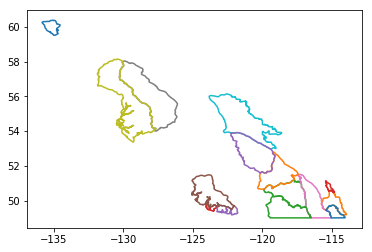

In [127]:
# plt.plot(yukon_geom[:,0], yukon_geom[:,1])
# plt.plot(south_rockies_geom[:,0], south_rockies_geom[:,1])
# plt.plot(south_columbia_geom[:,0], south_columbia_geom[:,1])
# plt.plot(south_coast1_geom[:,0], south_coast1_geom[:,1])
# plt.plot(south_coast2_geom[:,0], south_coast2_geom[:,1])
# plt.plot(sea_to_sky_geom[:,0], sea_to_sky_geom[:,1])
# plt.plot(purcells_geom[:,0], purcells_geom[:,1])
# plt.plot(northwest_inland_geom[:,0], northwest_inland_geom[:,1])
# plt.plot(northwest_coastal_geom[:,0], northwest_coastal_geom[:,1])
# plt.plot(north_rockies_geom[:,0], north_rockies_geom[:,1])
# plt.plot(lizard_range_geom[:,0], lizard_range_geom[:,1])
# plt.plot(north_columbia_geom[:,0], north_columbia_geom[:,1])
# plt.plot(kootenay_boundary_geom[:,0], kootenay_boundary_geom[:,1])
# plt.plot(kananaskis_geom[:,0], kananaskis_geom[:,1])
# plt.plot(cariboos_geom[:,0], cariboos_geom[:,1])

In [157]:
geoms = [
    cariboos_geom,
    kananaskis_geom,
    kootenay_boundary_geom,
    lizard_range_geom,
    north_columbia_geom,
    north_rockies_geom,
    northwest_coastal_geom,
    northwest_inland_geom,
    purcells_geom,
    sea_to_sky_geom,
    #south_coast1_geom,
    south_coast2_geom,
    south_columbia_geom,
    south_rockies_geom,
    yukon_geom    
]

In [155]:
region_polys = [geometry.Polygon([[p[0], p[1]] for p in geom]) for geom in geoms] 